# Pump it Up - **Hao, Qi Xu**
___

# Importar paquetes

In [1]:
# Main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

# Módulo personal de funciones
from Functions import my_funcs as my

# Cargar Datos de entrenamiento

In [127]:
X = pd.read_csv('./Data/Original/training_set.csv')
X.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe 

In [128]:
y = pd.read_csv('./Data/Original/training_labels.csv')
y.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [129]:
df = X.join(y.status_group)
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

                         basin    subvillage       region  region_code  \
0                   Lake Nyasa      Mnyusi B       Iringa           11   
1                Lake Victoria       Nyamara         Mara           20   
2                      Pangani       Majengo      Manyara           21   
3      Ruvuma / Southern Coast    Mahakamani       Mtwara           90   
4                Lake Victoria    Kyanyamisa       Kagera           18   
...                        ...           ...          ...          ...   
59395                  Pangani      Kiduruni  Kilimanjaro            3   
59396                   Rufiji      Igumbilo       Iringa           11   
59397                   Rufiji     Madungulu        Mbeya           12   
59398                   Rufiji        Mwinyi       Dodoma            1   
59399              Wami / Ruvu  Kikatanyemba     Morogoro            5   

       district_code             lga              ward  population  \
0                  5          Ludewa          Mundindi         109   
1                  2       Serengeti             Natta         280   
2                  4       Simanjiro           Ngorika         250   
3                 63        Nanyumbu          Nanyumbu          58   
4                  1         Karagwe        Nyakasimbi           0   
...              ...             ...               ...         ...   
59395              5             Hai  Masama Magharibi         125   
59396              4          Njombe            Ikondo          56   
59397              7         Mbarali           Chimala           0   
59398              4        Chamwino      Mvumi Makulu           0   
59399              2  Morogoro Rural        Ngerengere         150   

      public_meeting              recorded_by scheme_management  \
0               True  GeoData Consultants Ltd               VWC   
1                NaN  GeoData Consultants Ltd             Other   
2               True  GeoData Consultants Ltd               VWC   
3               True  GeoData Consultants Ltd               VWC   
4               True  GeoData Consultants Ltd               NaN   
...              ...                      ...               ... 

# **Preprocesamiento**

## Revisar duplicados

In [130]:
df.duplicated().sum()

0

No hay registros duplicados!

## Correción tipo de datos

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

- Los tipos de datos de la gran mayoría de variables están correctos.
- Las 2 variables booleanas `public_meeting` y `permit` están como object pero nos interesa que sea así ya que será tratado como categórica.
- A `date_recorded` no lo le vamos a cambiar a datetime ahora.

## Identificación de variables númericas y categóricas

In [132]:
df.nunique().sort_values()

recorded_by                  1
public_meeting               2
permit                       2
status_group                 3
source_class                 3
quantity_group               5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
payment                      7
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment_type                 7
water_quality                8
basin                        9
source                      10
management                  12
scheme_management           12
extraction_type_group       13
extraction_type             18
district_code               20
region                      21
region_code                 27
construction_year           55
num_private                 65
amount_tsh                  98
lga                        125
date_recorded              356
population                1049
funder                    1897
ward    

Vamos a Eliminar variables:
- `recorded_by`: un único valor "GeoData Consultants Ltd".

In [133]:
df.drop(columns=['recorded_by'], inplace=True)

In [134]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [135]:
df.select_dtypes(np.number).columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

Las siguientes variables son más bien categóricas:
- `region_code`, `district_code`.

In [136]:
num_index = df.select_dtypes(np.number).drop(columns=['region_code', 'district_code', 'id']).columns

num_index

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'population', 'construction_year'],
      dtype='object')

In [137]:
# Obtener el resto de elementos no presentes en num_index como categóricas.
cat_index = df.drop(columns='id').columns.difference(num_index)
cat_index

Index(['basin', 'date_recorded', 'district_code', 'extraction_type',
       'extraction_type_class', 'extraction_type_group', 'funder', 'installer',
       'lga', 'management', 'management_group', 'payment', 'payment_type',
       'permit', 'public_meeting', 'quality_group', 'quantity',
       'quantity_group', 'region', 'region_code', 'scheme_management',
       'scheme_name', 'source', 'source_class', 'source_type', 'status_group',
       'subvillage', 'ward', 'water_quality', 'waterpoint_type',
       'waterpoint_type_group', 'wpt_name'],
      dtype='object')

In [138]:
# Convertir de estructura de datos de Index a listas.
num_list = num_index.to_list()
cat_list = cat_index.to_list()

num_list

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'construction_year']

## Análisis de Distribución de las variables

### Numéricas

In [139]:
my.describe_custom(df[num_list])

count  nunique     mean      std     CV  q1_25    q2_50  \
latitude           59400.0  57517.0    -5.71     2.95  -0.52  -8.54    -5.02   
longitude          59400.0  57516.0    34.08     6.57   0.19  33.09    34.91   
gps_height         59400.0   2428.0   668.30   693.12   1.04   0.00   369.00   
population         59400.0   1049.0   179.91   471.48   2.62   0.00    25.00   
amount_tsh         59400.0     98.0   317.65  2997.57   9.44   0.00     0.00   
num_private        59400.0     65.0     0.47    12.24  25.81   0.00     0.00   
construction_year  59400.0     55.0  1300.65   951.62   0.73   0.00  1986.00   

                     q3_75    min        max  
latitude             -3.33 -11.65      -0.00  
longitude            37.18   0.00      40.35  
gps_height         1319.25 -90.00    2770.00  
population          215.00   0.00   30500.00  
amount_tsh           20.00   0.00  350000.00  
num_private           0.00   0.00    1776.00  
construction_year  2004.00   0.00    2013.00

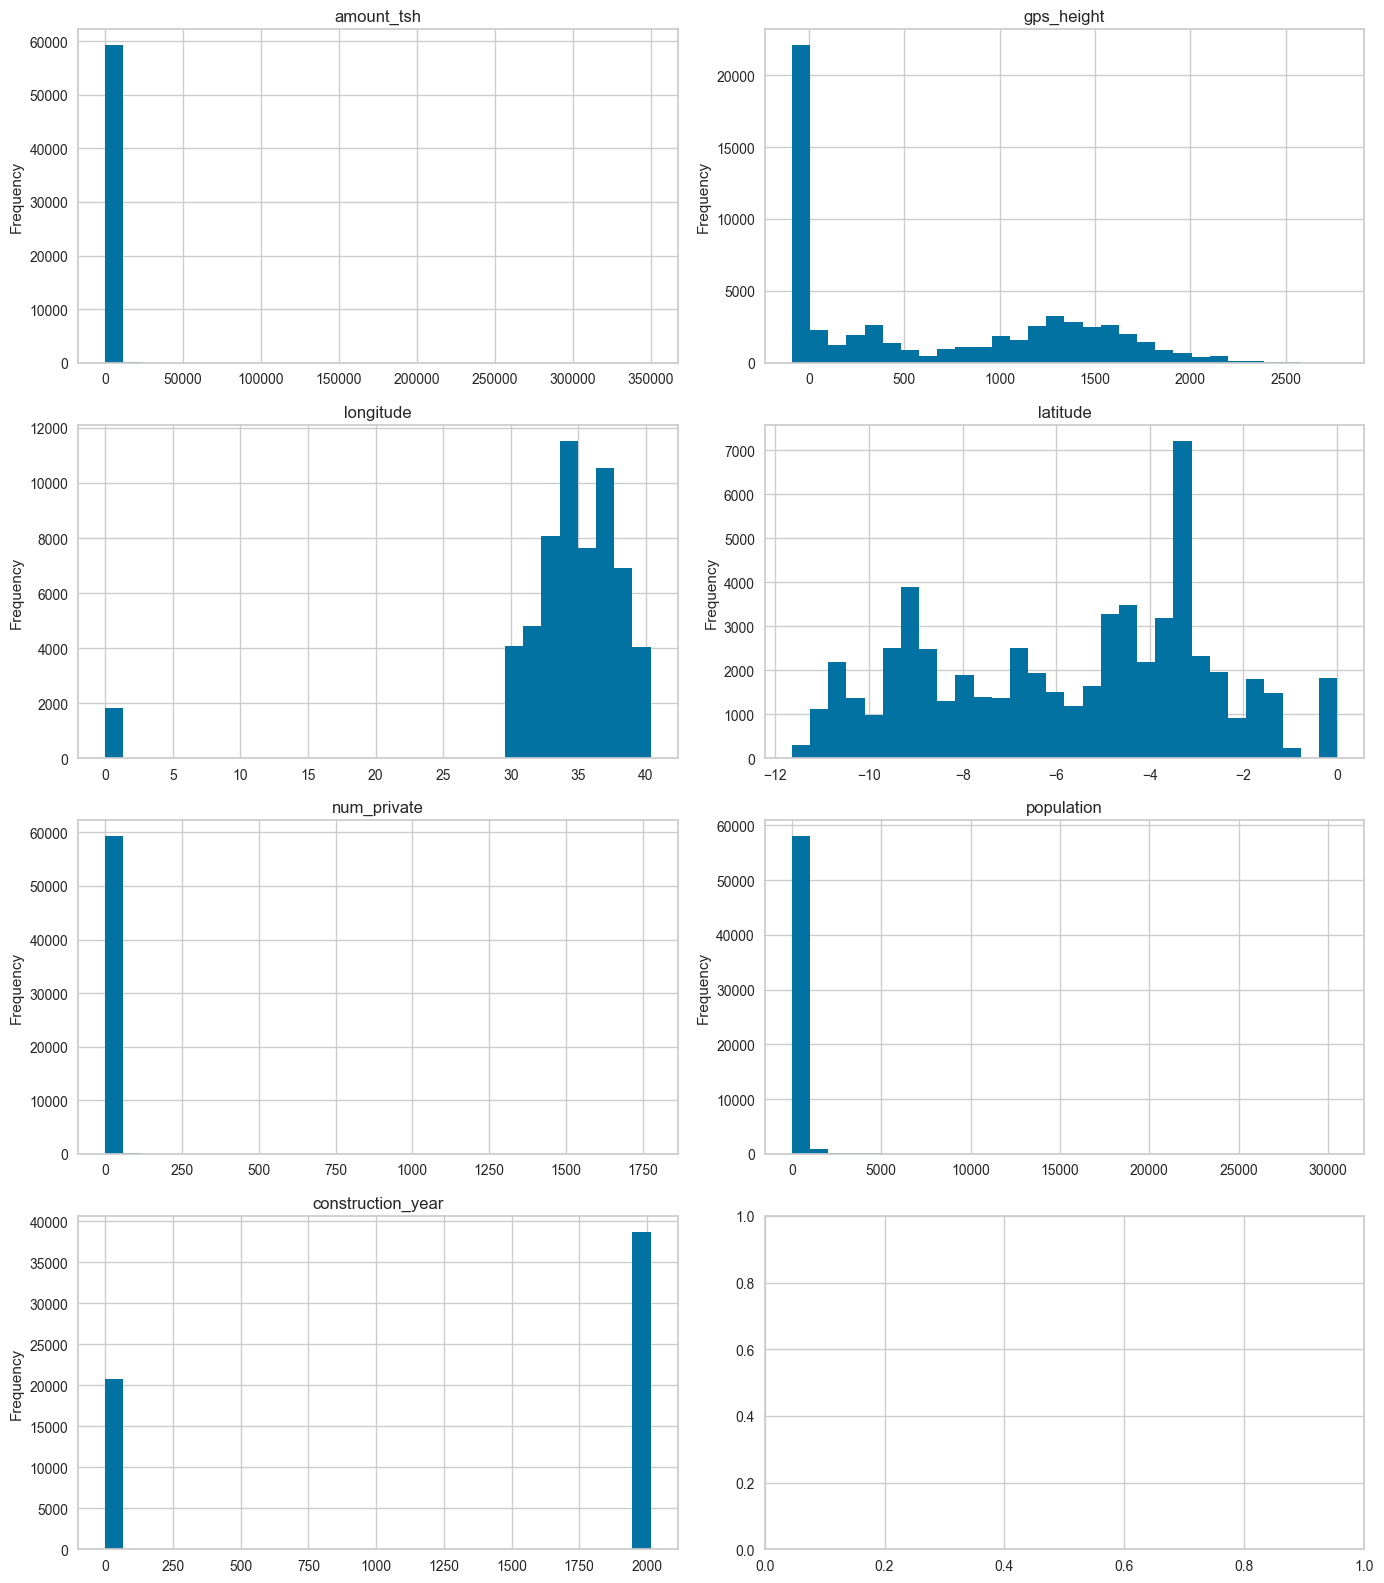

In [140]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, num in enumerate(num_list):
    df[num].plot.hist(bins=30, ax=axes[i])
    axes[i].set_title(num)

plt.tight_layout()
plt.show()

| Variable | Tipo <br> (n_unique) | Observaciones |
|:-|:-:|-|
| longitude | continua <br> (57516) | - El tramo que incluye el 0 está bastante alejado del resto. Habrá que investigar si fuese solamente 0s. **Potencial missings no declarados**. <br> - Necesario **pintar las ubicaciones** de los pozos. |
| latitude | continua <br> (57517) | - El tramo donde está el 0 es discontinua. Posible valor como missings no declarados. |
| gps_height | continua <br> (2428) | - Presencia de valores negativos de altitud. Vamos a asumir que la **altitud es relativo al nivel del mar** siendo altitudes negativos aquellos ubicados bajo el mar y valores muy altos, en las altas montañas (2700). <br> - Necesario **confirmarlo en un gráfico geográfico** con esta variable como label. <br> - Sería **interesante discretizar dicha variable** (3 tramos: bajo el mar, altura baja, y alta).|
| population | continua <br> (1049) | - **No hay personas (0)** alrededor de por lo menos el 25% de los pozos (**zonas rurales o missings no declarados?**). <br> - Hay pocos pozos con una gran densidad de población: alrededor de 30500 personas (**grandes ciudades o errores?**). <br> - Es necesario **revisar las características** de dichas subpoblaciones.|
| amount_tsh | continua <br> (98) | - **Por lo menos el 50% de los puntos de abastecimiento de agua están vacías**! O son missing no declarados? <br> - Relativamente pocos puntos con agua disponible y algunas con gran capacidad de agua. <br> - **Revisar si aquellos sin agua corresponden a registros con 0 poblaciones alrededor** y si los puntos con mayor cantidad corresponden con más poblaciones.  |
| num_private | continua <br> (65) | - **No queda muy claro lo que realmente representa dicha variable**. Asumo que no se trata si el punto de accesso sea privado o no ya que tiene 65 valores únicos. <br> - En todo caso, sería **interesante binarizarla** ya que al menos el 75% de las observaciones son 0s. |
| construction_year | continua <br> (55) | - **Por lo menos 25% de las observaciones son 0s**. <br> - Ya vamos conociendo el patrón, valor 0 es utilizado con frecuencia para representar missings en este conjunto de datos.|

### Categóricas

************** date_recorded **************
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64 

2011-03-15    0.96
2011-03-17    0.94
2013-02-03    0.92
2011-03-14    0.88
2011-03-16    0.86
              ... 
2011-09-11    0.00
2011-08-31    0.00
2011-09-21    0.00
2011-08-30    0.00
2013-12-01    0.00
Name: date_recorded, Length: 356, dtype: float64 

************** funder **************
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64 

Government Of Tanzania    16

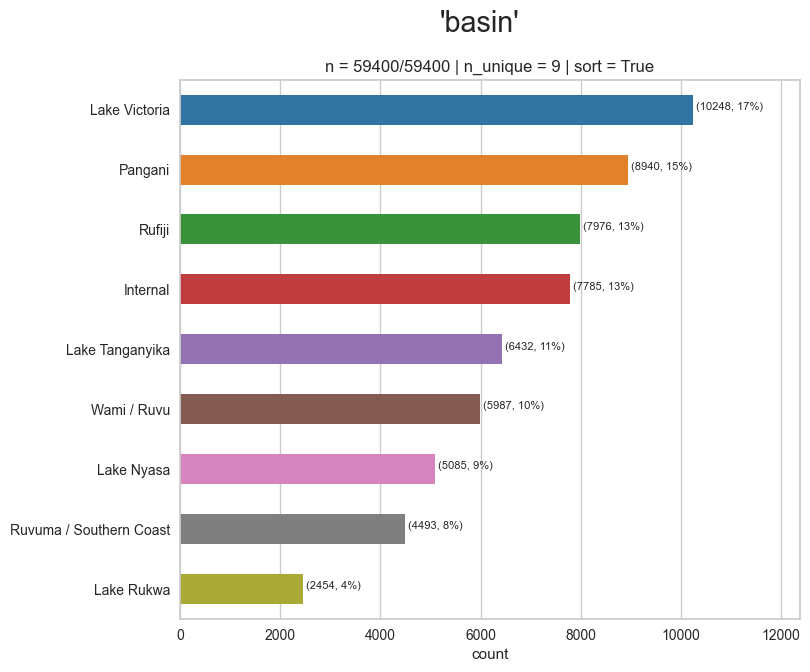

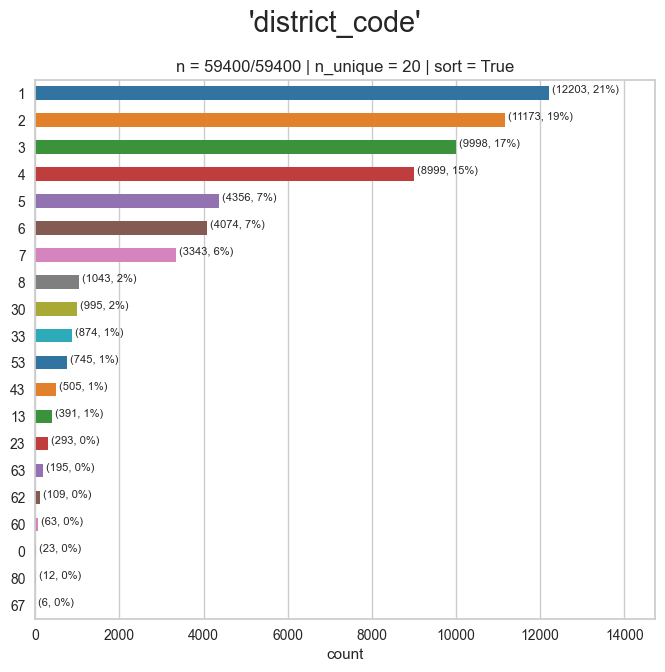

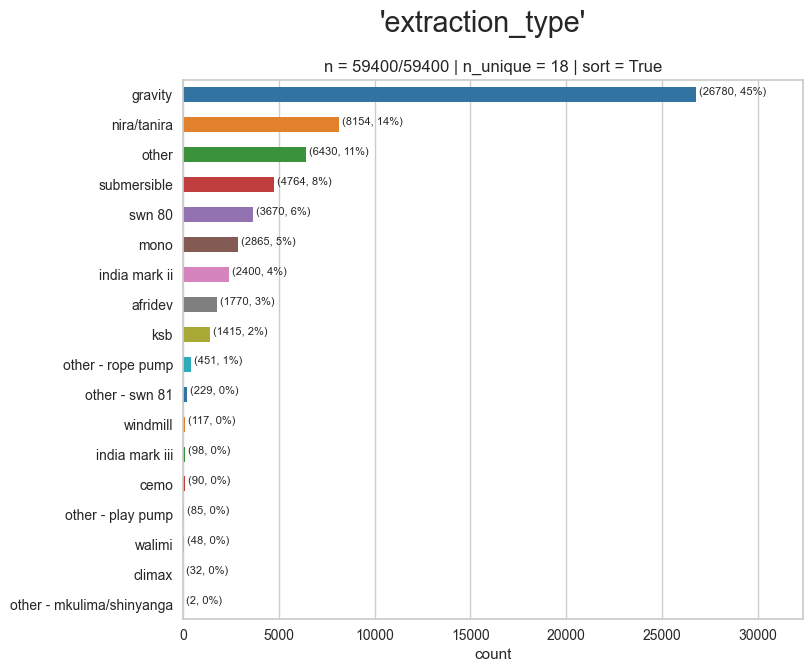

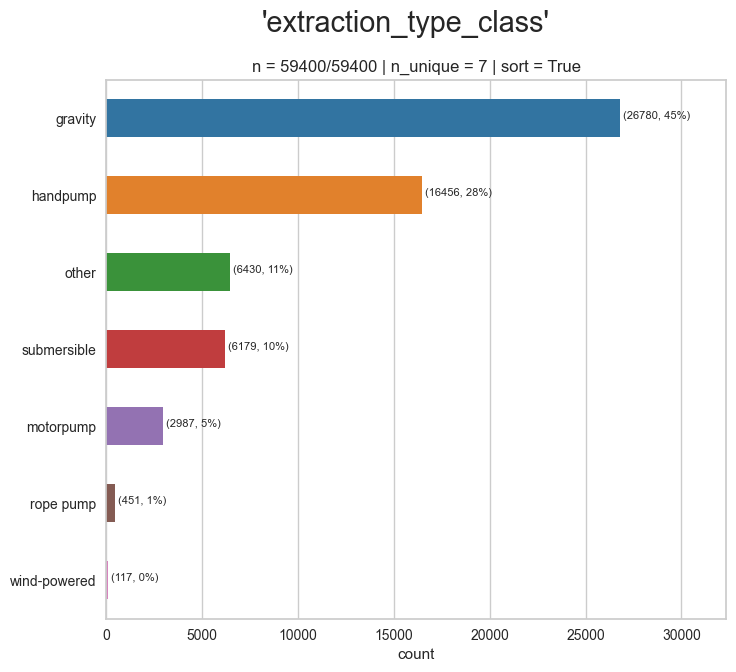

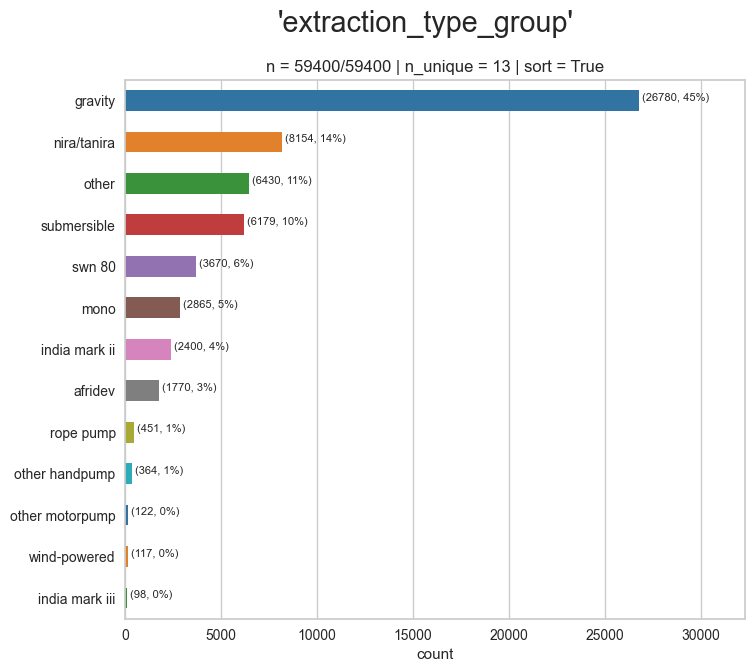

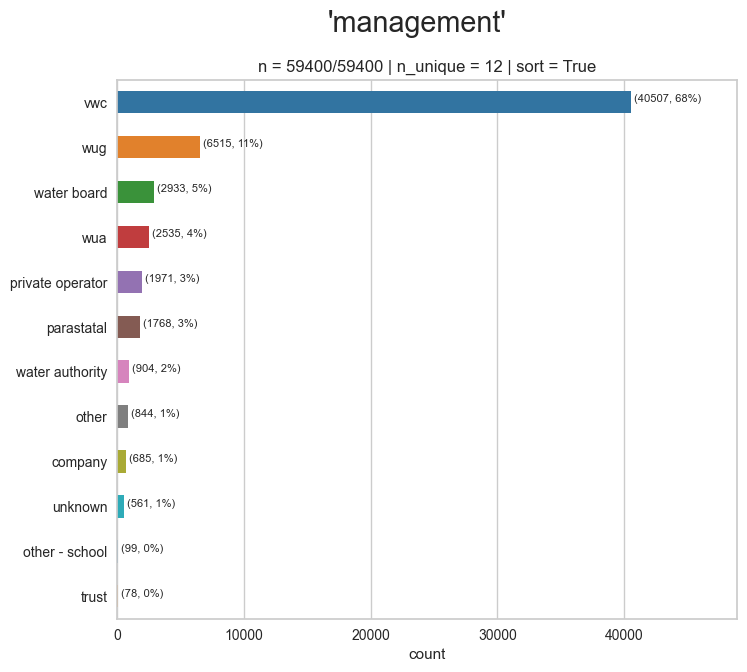

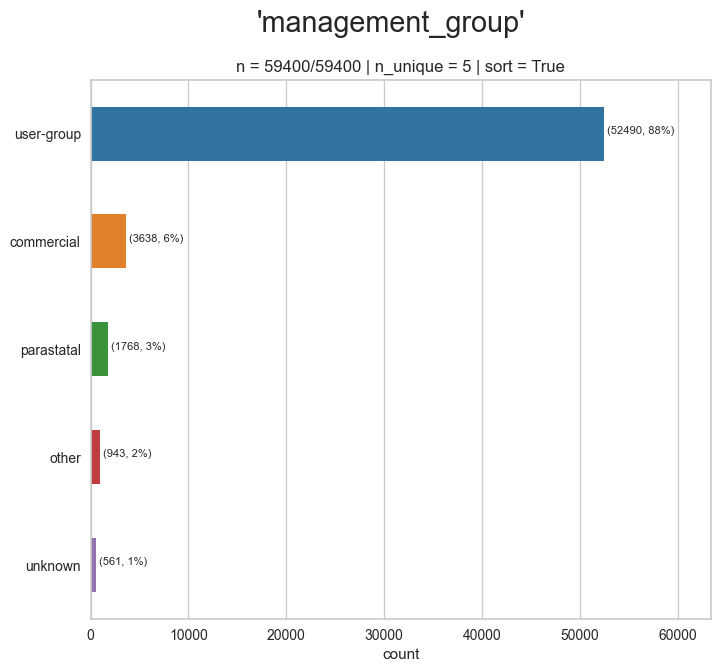

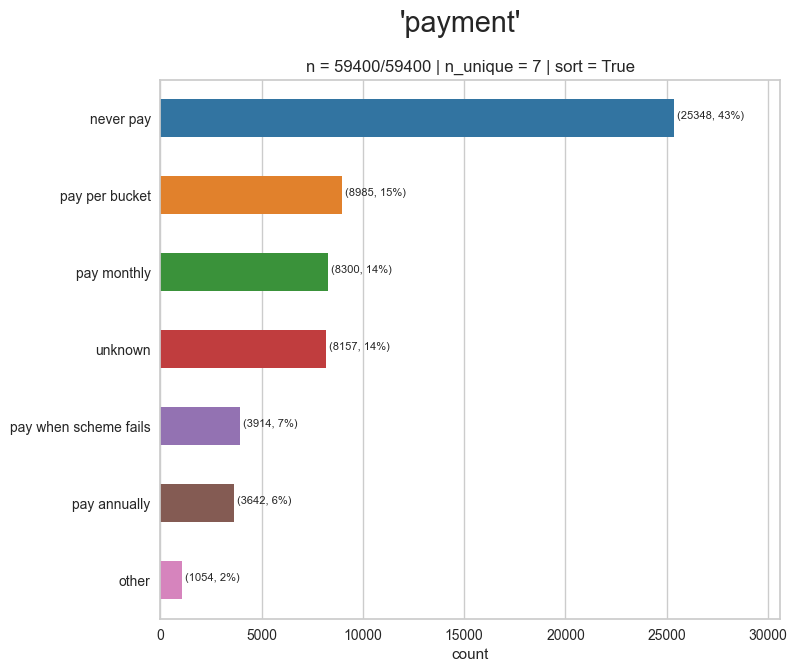

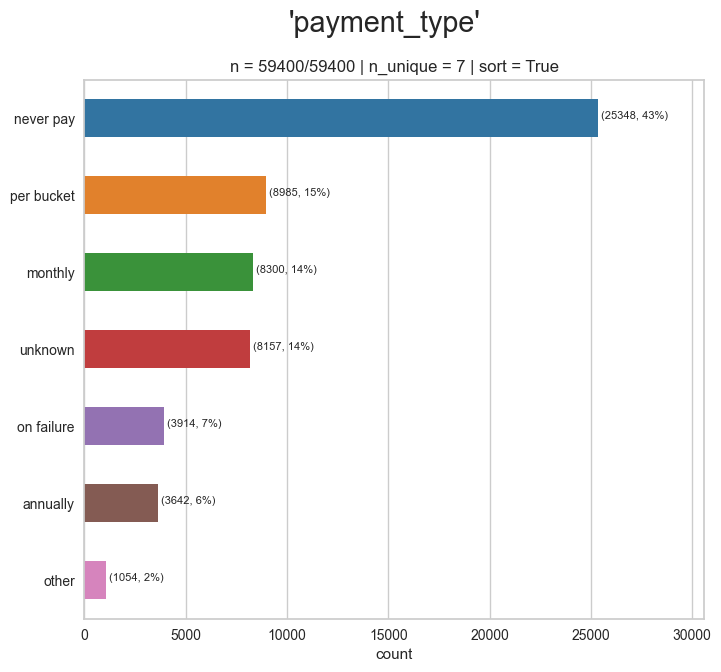

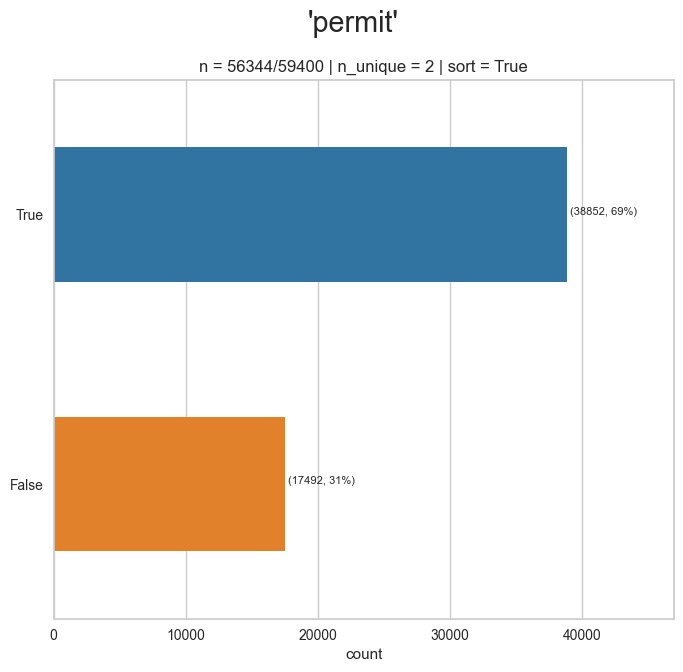

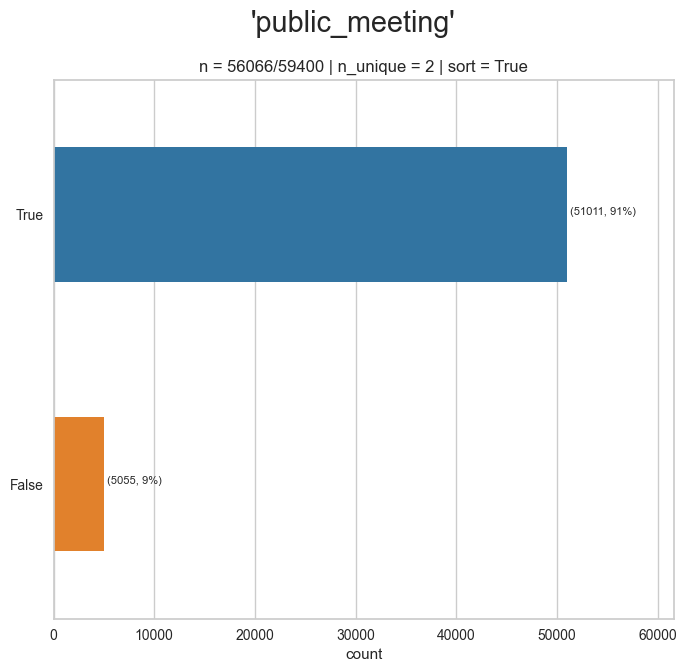

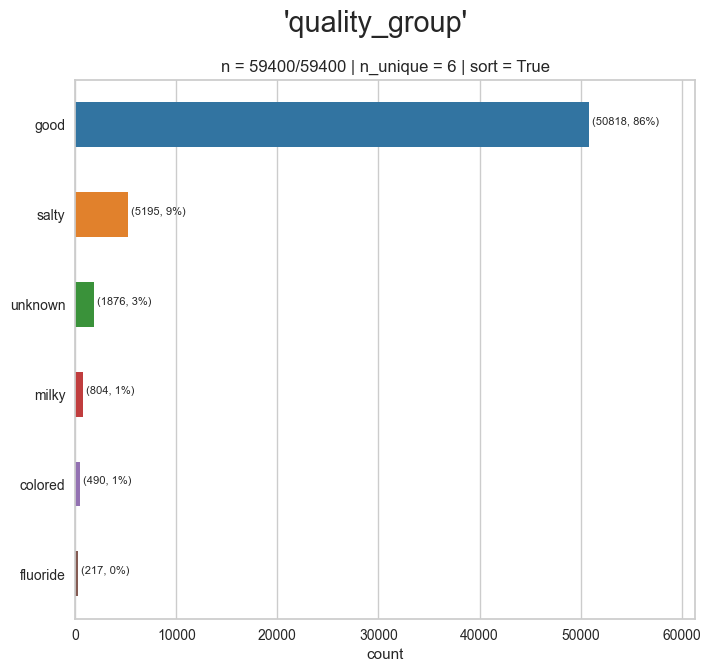

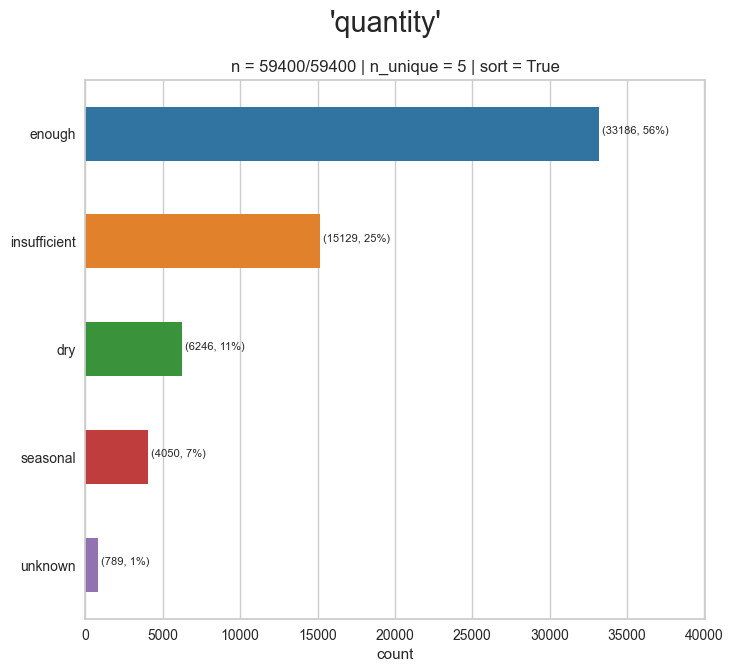

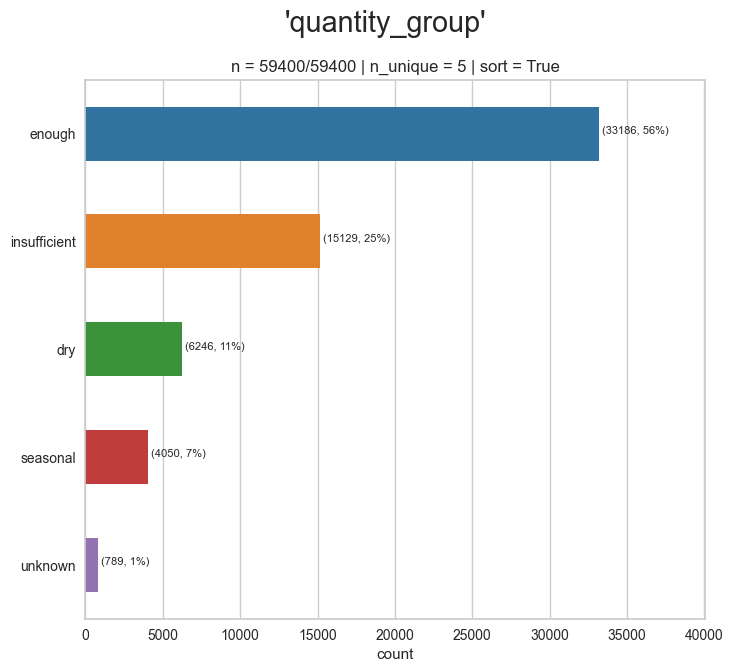

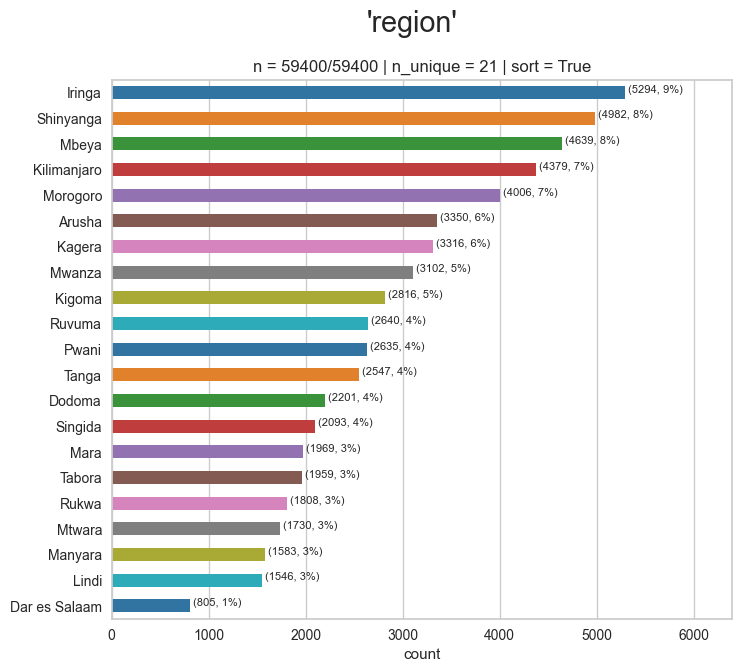

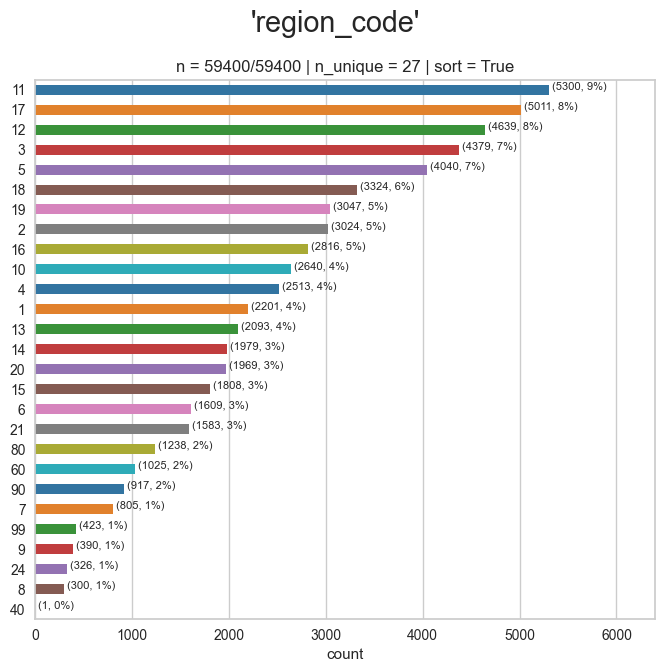

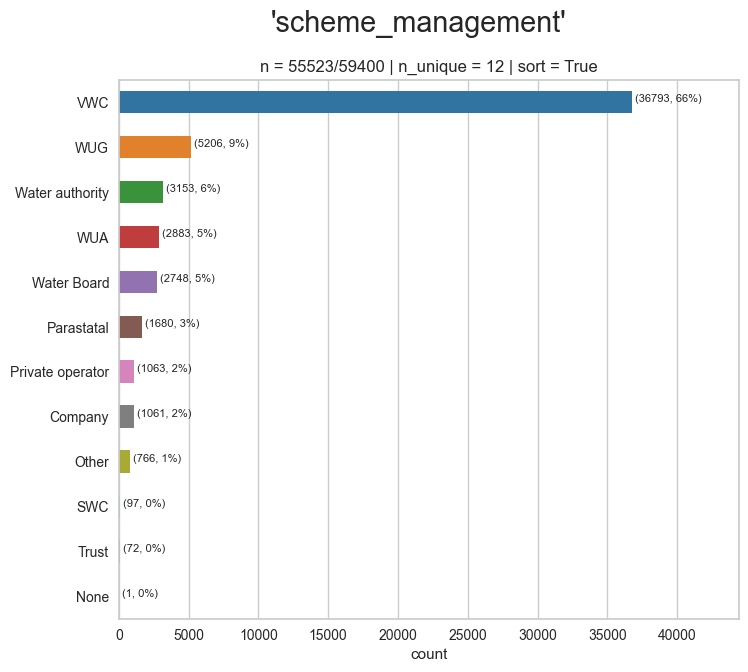

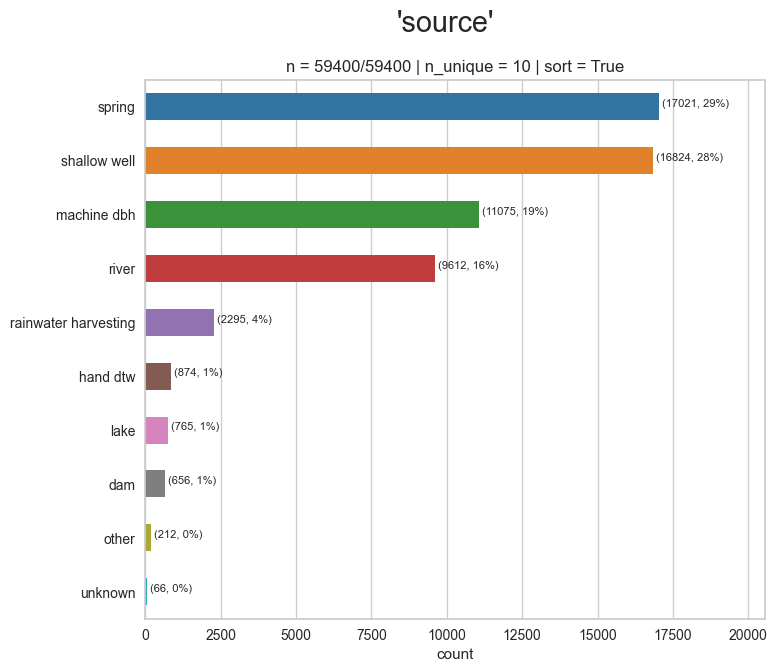

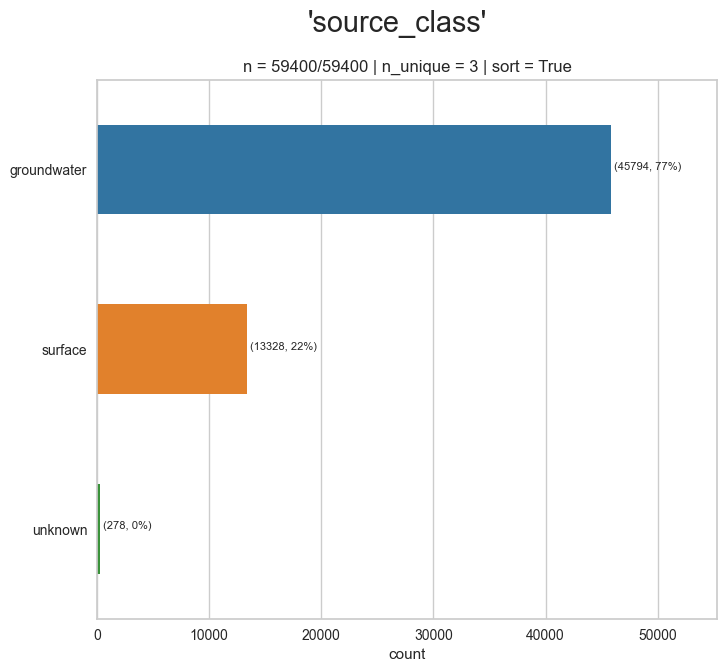

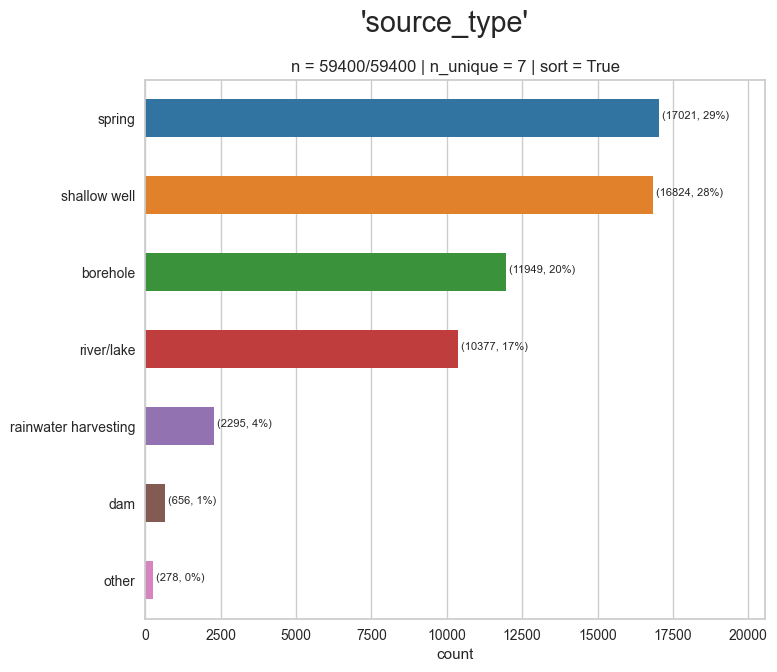

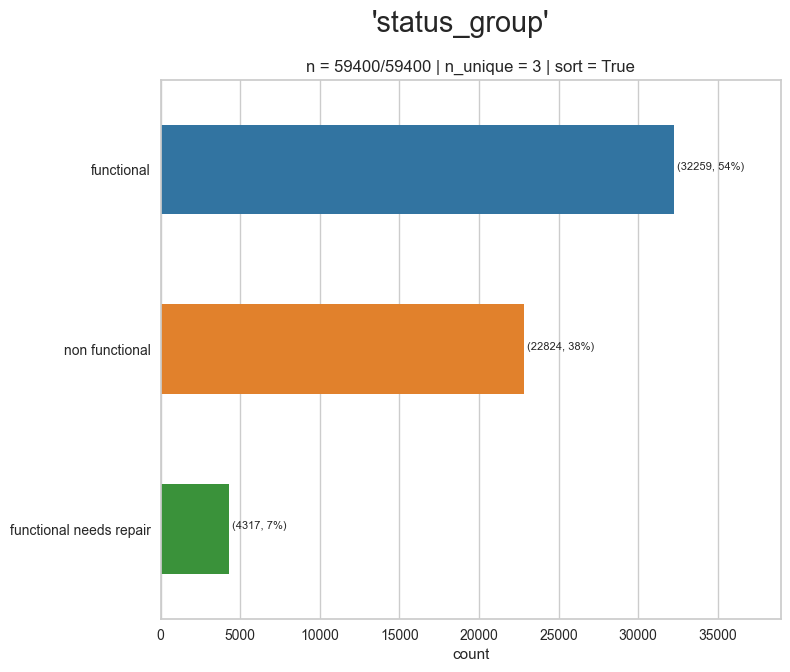

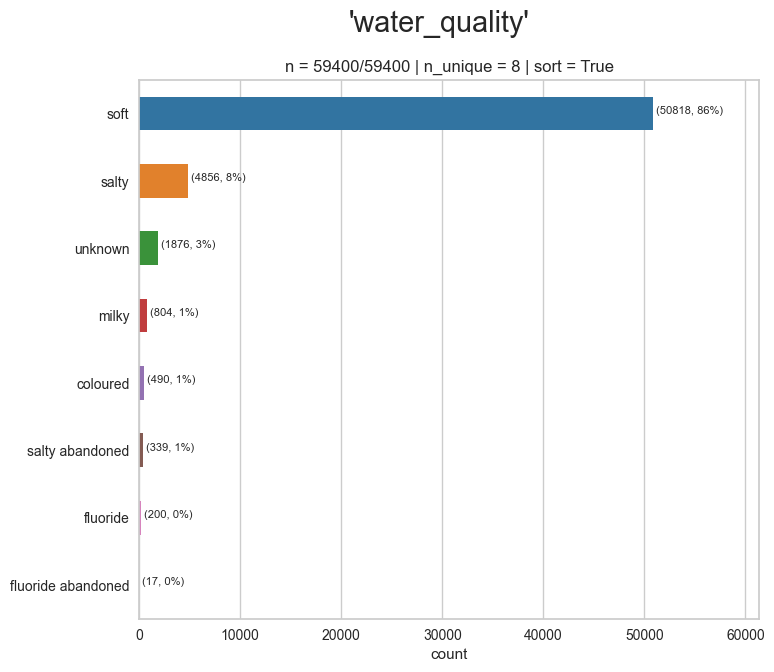

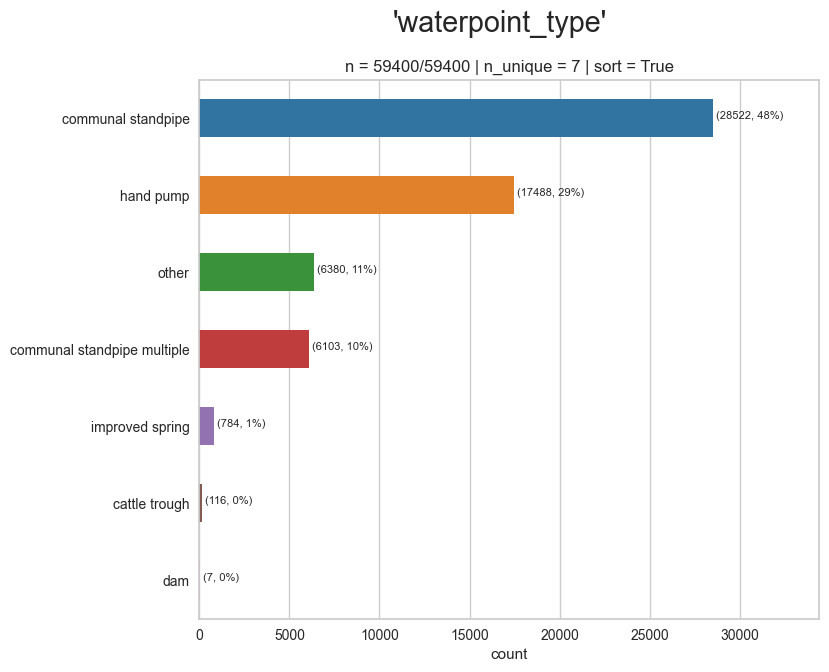

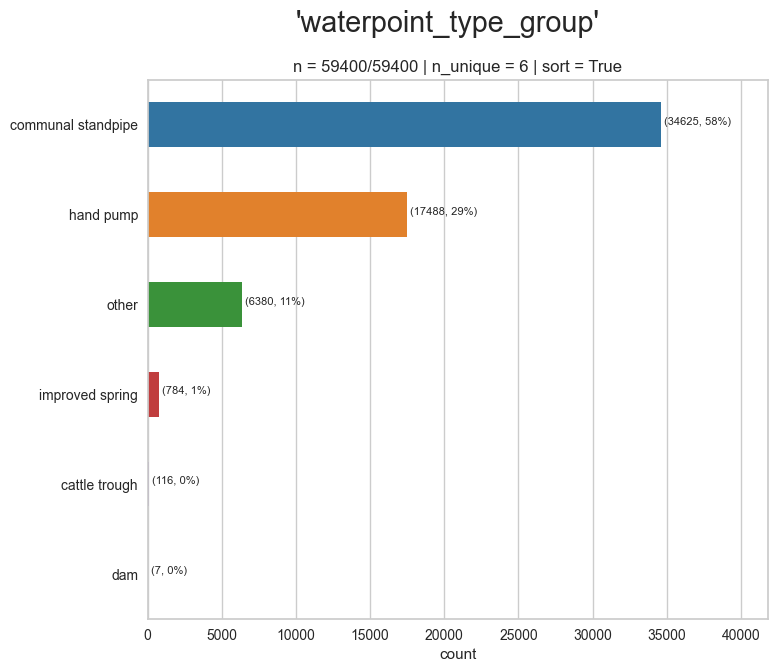

In [141]:
for cat in cat_list:
    if df[cat].nunique() >= 30:
        print(f"************** {cat} **************")
        print(df[cat].value_counts(), '\n')
        # Percentage (%)
        print(df[cat].value_counts(normalize=True).mul(100).round(2), '\n')
        
    else:
        my.barh_plot(series=df[cat], figsize=(8, 7))

| Variable | Tipo <br> (n_unique) | Top <br> (count, freq) | Observaciones |
|:-|:-:|:-:|-|
| date_recorded | categórica <br> (356) | 2011-03-15 <br> (572, 1%) | - Muchas categorías infrecuentes. <br> - Dejamos esta variable para **crear variable derivada** con año de contrucción. |
| funder | categórica <br> (1897) | Government Of Tanzania <br> (9084, 16%) | - Muchas categorías infrecuentes. |
| installer | categórica <br> (2145) | DWE <br> (572, 31%) | - Muchas categorías infrecuentes. |
| lga | categórica <br> (125) | Njombe <br> (2503, 4%) | - Muchas categorías infrecuentes. <br> - **Various related variables** (Choose a few geographical variables) |
| scheme_name | categórica <br> (2696) | K <br> (682, 2%) | - Muchas categorías infrecuentes. <br> - `Potencialmente DESCARTABLE`|
| subvillage | categórica <br> (19287) | Madukani <br> (508, 0.9%) | - Muchas categorías infrecuentes. <br> - `Potencialmente DESCARTABLE` (demasiadas categorías únicas). |
| ward | categórica <br> (2092) | Igosi <br> (307, 0.5%) | - Muchas categorías infrecuentes. |
| wpt_name | categórica <br> (37400) | none <br> (3563, 6%) | - Muchas categorías infrecuentes. <br> - `Potencialmente DESCARTABLE` por poca capacidad predictiva (asunción personal).|
| basin | categórica <br> (9) | Lake Victoria <br> (10248, 17%) | - Ninguna. |
| district_code | categórica <br> (20) | 1 <br> (12203, 21%) | - Muchas categorías infrecuentes. |
| extraction_type | categórica <br> (18) | gravity <br> (26780, 45%) | - `DESCARTADO`. |
| extraction_type_class | categórica <br> (7) | gravity <br> (26780, 45%) | - **Elegir esta variable para diferentes mecanismos de extracción de agua** (menos caegorías y más general) que los otros dos! |
| extraction_type_group | categórica <br> (13) | gravity <br> (26780, 45%) | - `DESCARTADO`. |
| management | categórica <br> (12) | vwc <br> (40507, 68%) | - `DESCARTADO`. |
| management_group | categórica <br> (5) | user-group <br> (52490, 88%) | - Elegir esta variable, más general y menos categorías. <br> - **Cruzar con y para decidir** si mantener las categorías, juntar unas y/o binarizar. |
| payment | categórica <br> (7) | never pay <br> (25348, 43%) | - `DESCARTADO`. |
| payment_type | categórica <br> (7) | never pay <br> (25348, 43%) | - **Esencialmente la misma variable que payment pero con distintos nombres de labels**. Nos quedaremos con esta por nombres más abreviados. |
| permit | categórica <br> (2) | True <br> (38852, 69%) | - Ninguna. |
| public_meeting | categórica <br> (2) | True <br> (51011, 91%) | - Ninguna. |
| quality_group | categórica <br> (6) | good <br> (50818, 86%) | - **Cruzar con y** para decidir si binarizar, agrupar, dejar las categorías. |
| quantity | categórica <br> (5) | enough <br> (33186, 56%) | - `DESCARTADO`. |
| quantity_group | categórica <br> (5) | enough <br> (33186, 56%) | - **Misma variable que quantity**. Me quedo con esta! |
| region | categórica <br> (21) | Iringa <br> (5294, 9%) | - **Elegimos esta** por tener menos categorías y más interpretable. |
| region_code | categórica <br> (27) | 11 <br> (5300, 9%) | - No exactamente la misma variable que region. `DESCARTADO`. |
| scheme_management | categórica <br> (12) | VWC <br> (36793, 66%) | - Otra variable variante del grupo de management y management_group. `DESCARTADO`. |
| source | categórica <br> (10) | spring <br> (17021, 29%) | `DESCARTADO` (muchas categorías infrequentes). |
| source_class | categórica <br> (3) | groundwater <br> (45794, 77%) | - **Cruzar con y** para decidir binarizar o dejarla. |
| source_type | categórica <br> (7) | spring <br> (17021, 29%) | - **Cruzar con y** antes de decidir entre esta variable `o source_class`. |
| water_quality | categórica <br> (8) | soft <br> (50818, 86%) | - Similar que quality_group pero con subdivisiones en categorías salty y fluoride en originales y abandonadas. <br> - **Nos quedamos con quality_group** puesto que las categorías de abandono tienen pocas muestras para dar lugar a conclusiones válidos. `DESCARTADO`. |
| waterpoint_type | categórica <br> (7) | communal standpipe <br> (28522, 48%) | - Elegimos esta variable para tipo de punto de accesso al agua. <br> - **Cruzar con y** para asistir la agrupación de categorías. |
| waterpoint_type_group | categórica <br> (6) | communal standpipe <br> (34625, 58%) | - `DESCARTADO`. |

## Correcciones de las Observaciones

### Numéricas

#### longitude & latitude

In [142]:
df['longitude'].value_counts()

0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: longitude, Length: 57516, dtype: int64

In [143]:
df['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-6.980220e+00       2
-2.476680e+00       2
-6.978263e+00       2
                 ... 
-3.287619e+00       1
-8.234989e+00       1
-3.268579e+00       1
-1.146053e+01       1
-6.747464e+00       1
Name: latitude, Length: 57517, dtype: int64

In [144]:
df[df['longitude'] == 0][num_list]

amount_tsh  gps_height  longitude      latitude  num_private  \
21            0.0           0        0.0 -2.000000e-08            0   
53            0.0           0        0.0 -2.000000e-08            0   
168           0.0           0        0.0 -2.000000e-08            0   
177           0.0           0        0.0 -2.000000e-08            0   
253           0.0           0        0.0 -2.000000e-08            0   
...           ...         ...        ...           ...          ...   
59189         0.0           0        0.0 -2.000000e-08            0   
59208         0.0           0        0.0 -2.000000e-08            0   
59295         0.0           0        0.0 -2.000000e-08            0   
59324         0.0           0        0.0 -2.000000e-08            0   
59374         0.0           0        0.0 -2.000000e-08            0   

       population  construction_year  
21              0                  0  
53              0                  0  
168             0                  0  
177             0                  0  
253             0                  0  
...           ...                ...  
59189           0                  0  
59208           0                  0  
59295           0                  0  
59324           0                  0  
59374           0                  0  

[1812 rows x 7 columns]

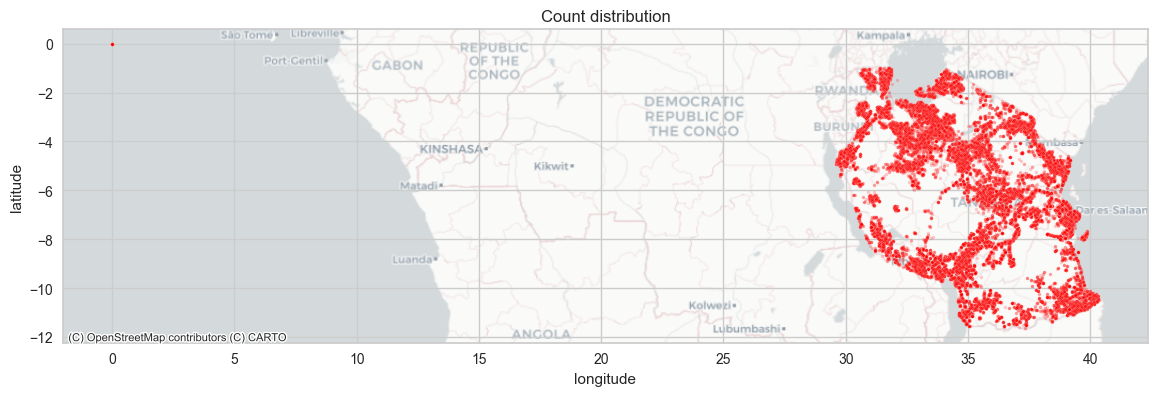

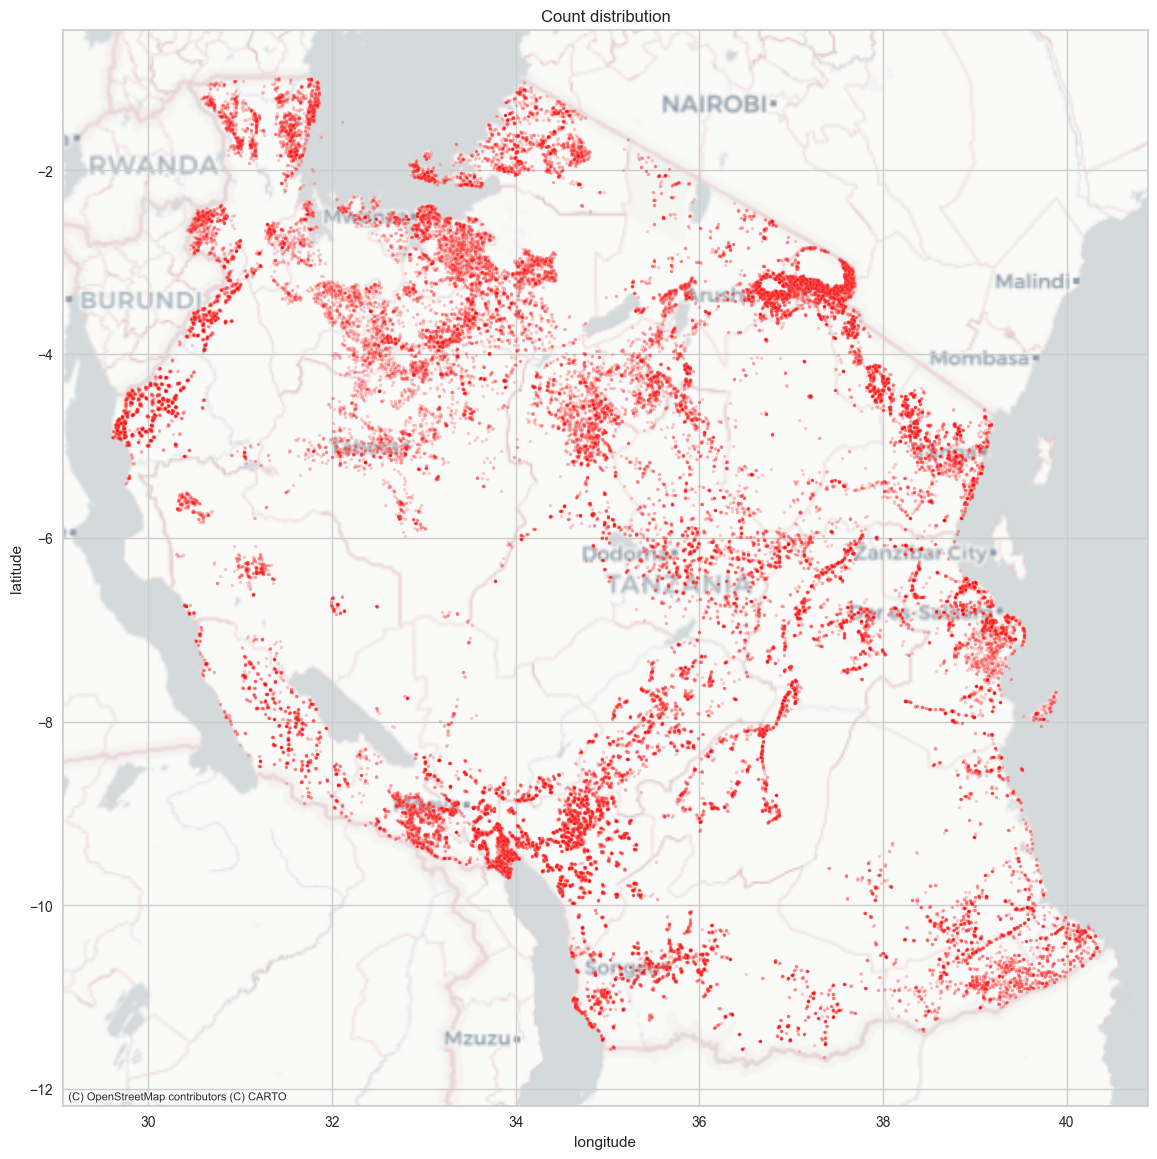

In [145]:
# Con los 1812 registros nulos

# Esta función utiliza la librería de contextly,
#el cual se conecta a la API de OpenStreetMap y pinta
#distintos gráficos según especificado de seaborn.
my.geopoints_plot(
    longitude_ser=df['longitude'],
    latitude_ser=df['latitude'],
    plot_type='scatter'
)

# Sin aquellos registros nulos
my.geopoints_plot(
    longitude_ser=df[df.longitude != 0]['longitude'],
    latitude_ser=df[df.longitude != 0]['latitude'],
    plot_type='scatter'
)

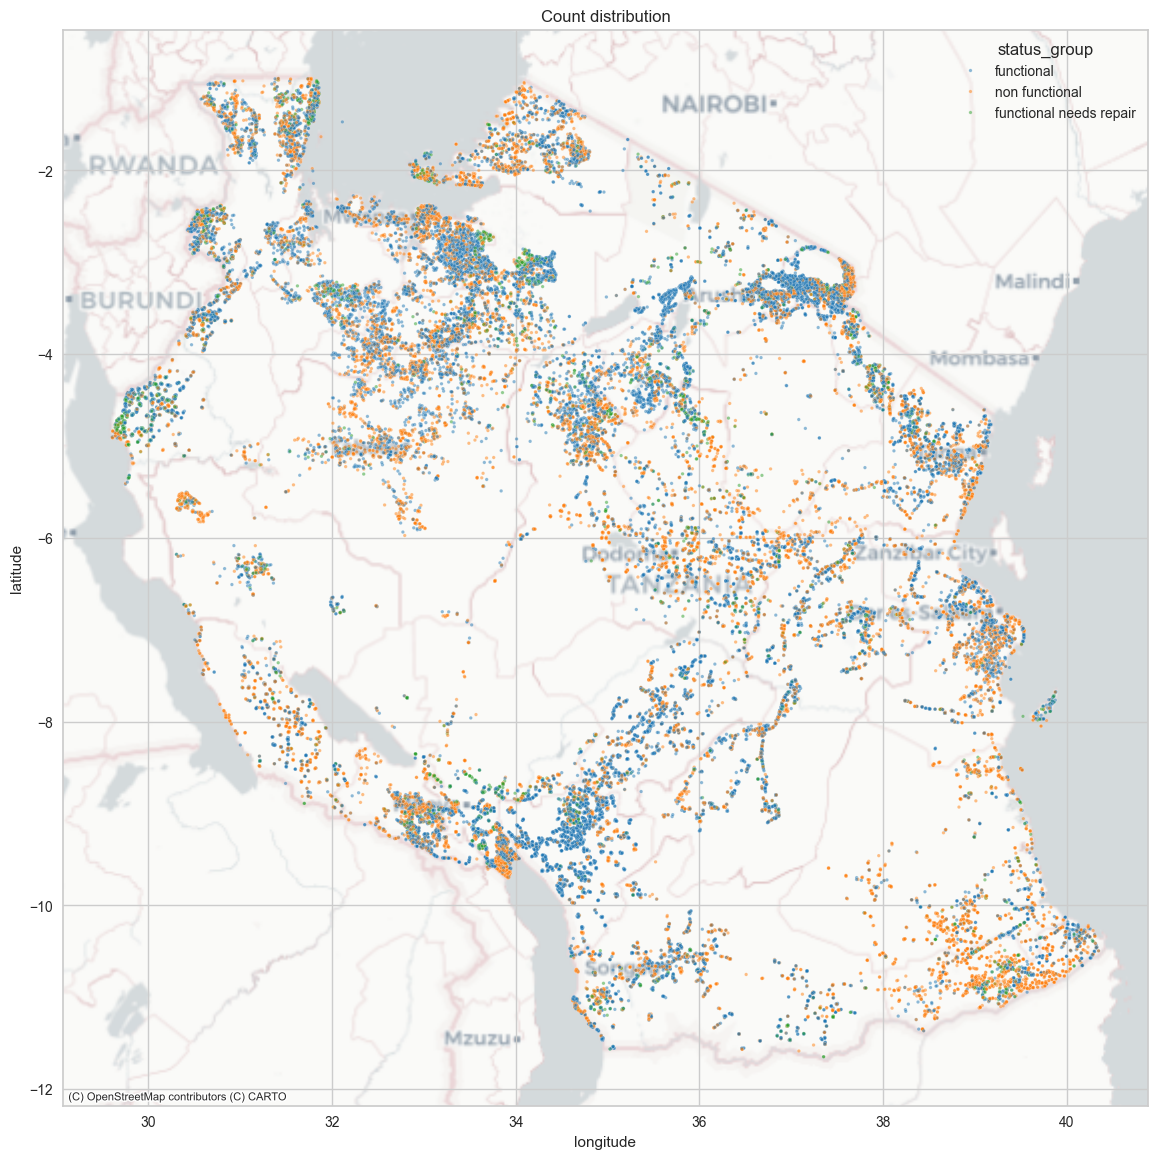

In [146]:
# La distribución de target labels geográficamente:
my.geopoints_plot(
    longitude_ser=df[df.longitude != 0]['longitude'],
    latitude_ser=df[df.longitude != 0]['latitude'],
    plot_type='scatter',
    hue=df['status_group'],
    alpha=0.5,
    palette='tab10'
)

In [147]:
# Pasar missing no declarados a missing:
df.loc[df['longitude'] == 0, ['latitude', 'longitude']] = np.nan

In [148]:
df['longitude'].value_counts(dropna=False)

NaN          1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: longitude, Length: 57516, dtype: int64

In [149]:
df['latitude'].value_counts(dropna=False)

 NaN          1812
-6.985842        2
-6.980220        2
-2.476680        2
-6.978263        2
              ... 
-3.287619        1
-8.234989        1
-3.268579        1
-11.460531       1
-6.747464        1
Name: latitude, Length: 57517, dtype: int64

Observaciones:
- Hay **1812 registros con valores $\approx$ 0 tanto en longitude como latitude**.
- Una investigación más profunda releva que en todas las variables numéricas (a excepción de `region_code` y `distric_code`), los valores son 0s en aquellos registros, indicando que el **valor 0 es un valor nulo no declarado**.
- Los gráficos de las coordenadas geográficas confirman el hecho: l**as coordenadas (0,0) caen fuera de Tanzania, es más, se ubican en el océano**. Una vez filtradas esas coordinadas, se puede observar una representación nítida de la distribución geográfica de los puntos de agua.
- Pasamos los valores de dichos registros en las columnas `longitude` y `latitude` a missing.
- **La distribución del estado de las bombas de agua están muy solapadas geográficamente**. Decision boundaries lineales no parecen poder separar las etiquetas de la y muy bien. Por ello, se esperan más de modelos no lineales. Habrá que mirarlo más adelante!

#### gps_height

In [150]:
df['gps_height'].value_counts(normalize=True)

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
 1290    0.000875
           ...   
 2378    0.000017
-54      0.000017
 2057    0.000017
 2332    0.000017
 2366    0.000017
Name: gps_height, Length: 2428, dtype: float64

In [151]:
df[(df['gps_height'] >= -5) & (df['gps_height'] <= 5)]['gps_height'].value_counts(normalize=True)

 0    0.984774
-2    0.001927
-5    0.001831
-3    0.001831
-4    0.001735
 1    0.001638
 5    0.001590
 2    0.001349
 4    0.001156
 3    0.001108
-1    0.001060
Name: gps_height, dtype: float64

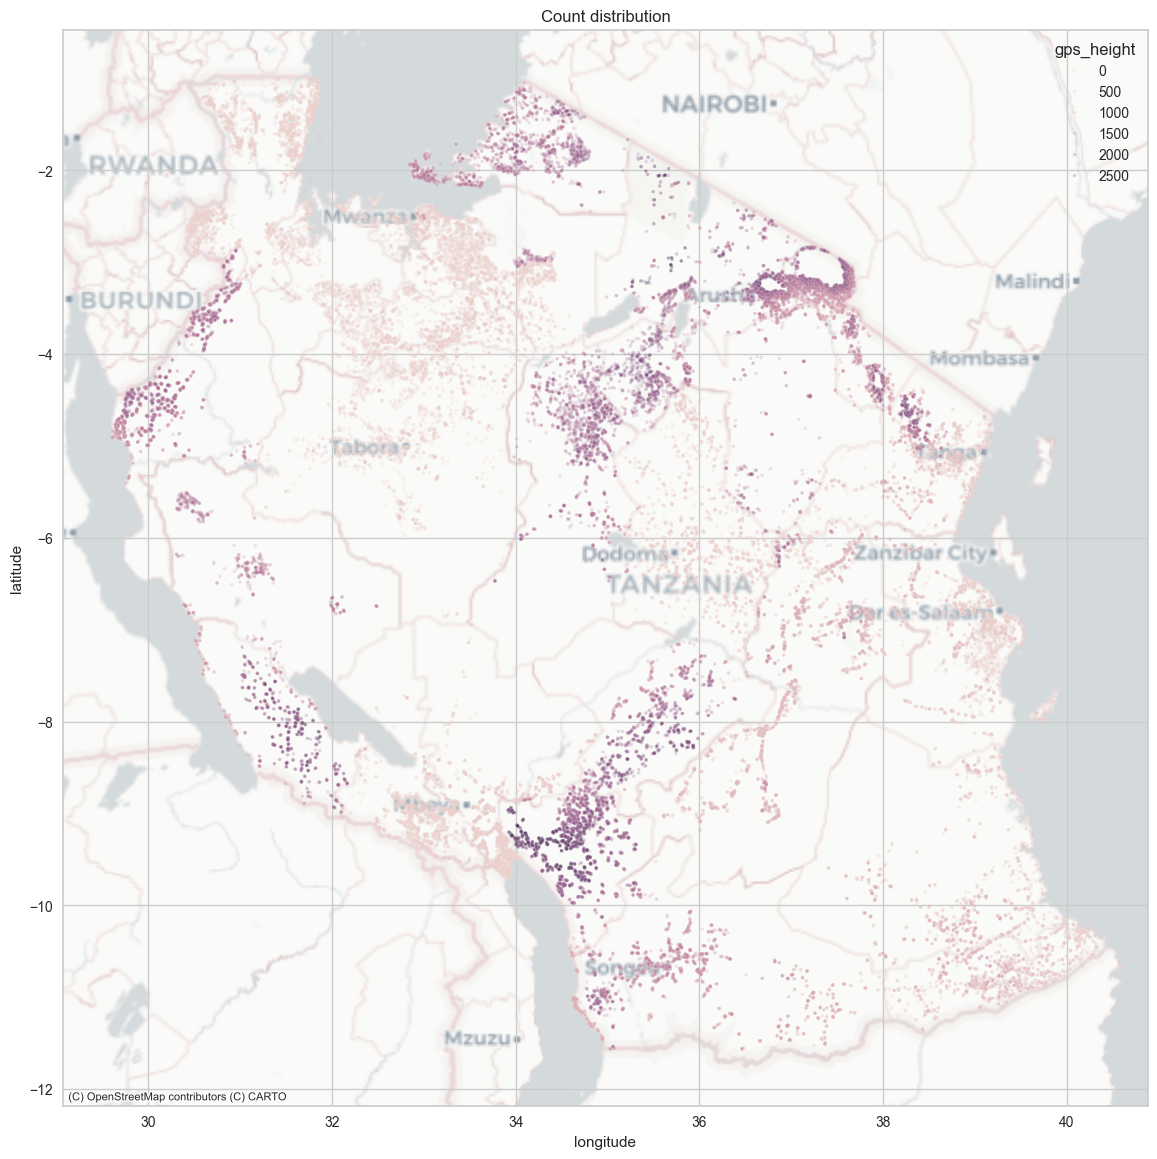

In [152]:
my.geopoints_plot(
    longitude_ser=df['longitude'],
    latitude_ser=df['latitude'],
    plot_type='scatter',
    hue=df['gps_height'],
)

Observaciones:
- Observando los datos vemos una **gran cantidad de puntos de agua a altura 0** (más de un tercio). Dicha frecuencia no es habitual en ninguna otra altura.
- **Además la gran frequencia solo es único en el valor 0** (no es el caso en valores cercanos +- 5 unidades), un valor que se usa con en muchas numéricas en este conjunto como indicador de missing.
- Voy a **dejar dicha variable como está** puesto que carezco del conocimiento geográfico cartográfico de dicha zona. No vamos a pasar dichos valores a nulos e imputarlas ya que **representan el 34% del total de observaciones**. En su lugar, **crearemos una variable tramificada** que tenga como categoría independiente estos 0s.

#### population

In [153]:
df['population'].value_counts(normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
6330    0.000017
5030    0.000017
656     0.000017
948     0.000017
788     0.000017
Name: population, Length: 1049, dtype: float64

Observaciones:
- Al igual que la variable `gps_height`, **presenta más de un tercio de ceros (36%)**.
- Hace pensar que son **missing no declarados** por la gran frecuencia en un valor único. No obstante, puede ser que muchos puntos de aguas estén **ubicadas en lugares inhóspitos** o que sean **puntos de aguas no funcionales** y por ello no hay habitantes alrededor.
- **Crearemos su versión tramificada** también como en gps_height en el apartado de feature engineering.

#### amount_tsh

In [154]:
df['amount_tsh'].value_counts(normalize=True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [155]:
((df.amount_tsh == 0) & (df.population == 0)).sum()

20356

In [156]:
(df['population'] == 0).sum()

21381

In [157]:
(20356 / 21381) * 100

95.20602404003554

In [158]:
df[(df.amount_tsh == 0) & (df.population == 0)]['status_group'].value_counts(normalize=True)

functional                 0.513018
non functional             0.400422
functional needs repair    0.086559
Name: status_group, dtype: float64

Observaciones:
- Al parecer el **95% de los puntos donde no hay nadie corresponden con aquellos sin disponibilidad de agua**! No conocemos la causalidad entre estas dos variables ni de cuándo fueron recogidos estos datos.
- No obstante, si en dicho punto no hay agua es muy probable que no haya nadie alrededor.
- **Aún sin disponibilidad de agua, la mitad de esas bombas de agua son funcionales**!.

#### num_private

In [159]:
df['num_private'].value_counts(normalize=True)

0       0.987256
6       0.001364
1       0.001229
5       0.000774
8       0.000774
          ...   
42      0.000017
23      0.000017
136     0.000017
698     0.000017
1402    0.000017
Name: num_private, Length: 65, dtype: float64

Observaciones:
- Vamos a **binarizar esta variable en el apartado de feature engineering** puesto que el valor 0 representa casi el 99% de todas observaciones. 

#### construction_year

In [160]:
df['construction_year'].value_counts(normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

Observaciones:
- Vamos a utilizar esta variable y `date_recorded` para **crear una variable de antigüedad de las bombas de agua**.
- Presenta más de un tercio de 0s (nulos no declarados). Para abordar este problema **crearemos una versión tramificada de la variable derivada** para contener los 0s en una categoría aparte.

### Categóricas

In [161]:
# Función para agrupar categorías infrecuentes:
def group_infreq_labels(
    cat_series: pd.Series,
    threshold=0.05,
    label='Rare',
):
    # Create a copy.
    cat_series = cat_series.copy()

    # Get frequencies for each label.
    cat_freq = cat_series.value_counts(normalize=True)
    
    # Get a list of infrequent labels in cat variable.
    infreq_labels = [cat_freq.index[i] for i, freq in enumerate(cat_freq) if freq < threshold]
    
    # Group infrequent labels.
    cat_series =  pd.Series(np.where(cat_series.isin(infreq_labels), label, cat_series), name=cat_series.name)
    
    return cat_series

In [162]:
# Función para ver conteos y frecuencias de vars categóricas:
def show_freq_cat(
    cat: str,
    n_rows_display = 5
):
    print(df[cat].value_counts().head(n_rows_display))
    print()
    print(df[cat].value_counts(normalize=True).head(n_rows_display))

#### funder

In [163]:
show_freq_cat(
    cat='funder',
    n_rows_display=15
)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Name: funder, dtype: int64

Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
Kkkt                      0.023079
World Vision              0.022344
Unicef                    0.018955
Tasaf                     0.015727
District Council          0.015117
Dhv                       0.014866
Private Individual        0.014812
Dwsp                      0.014543
0                         0.013933
Norad            

In [164]:
# Agrupar categorías infrecuentes:
df['funder_reduced'] = group_infreq_labels(
    cat_series=df['funder'],
    threshold=0.018,  # Agrupar por debajo de Unicef
)

df['funder_reduced'].value_counts(normalize=True)

Rare                      0.628566
Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
Kkkt                      0.023079
World Vision              0.022344
Unicef                    0.018955
Name: funder_reduced, dtype: float64

Observaciones:
- **Encontamos 0s** (missing no declarados). Se agrupará con el resto en "Rare".
- Voy a **crear dicha variable con los top 8 más frecuentes** (Government Of Tanzania a Unicef) y agrupar el resto.
- Sería interesante crear dicha variable con la frecuencia de las respectivas categorías como valor (**categorical frequency enconding**).

#### installer

In [165]:
show_freq_cat(
    cat='installer',
    n_rows_display=15
)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
Name: installer, dtype: int64

DWE                   0.312171
Government            0.032738
RWE                   0.021634
Commu                 0.019015
DANIDA                0.018836
KKKT                  0.016109
Hesawa                0.015069
0                     0.013938
TCRS                  0.012683
Central government    0.011158
CES                   0.010943
Community             0.009920
DANID                 0.009902
District Council      0.009884
HESAWA                0.009669
Name: installer, dtype: float64


In [166]:
# Agrupar categorías infrecuentes:
df['installer_reduced'] = group_infreq_labels(
    cat_series=df['installer'],
    threshold=0.014, # Agrupar por debajo de Hesawa
)

df['installer_reduced'].value_counts(normalize=True)

Rare          0.564427
DWE           0.312171
Government    0.032738
RWE           0.021634
Commu         0.019015
DANIDA        0.018836
KKKT          0.016109
Hesawa        0.015069
Name: installer_reduced, dtype: float64

Observaciones:
- **Elegimos los top 7 categorías** por frecuencia de DWE a Hesawa y agrupamos el resto en "Rare".

#### lga

In [167]:
show_freq_cat(
    cat='lga',
    n_rows_display=15
)

Njombe           2503
Arusha Rural     1252
Moshi Rural      1251
Bariadi          1177
Rungwe           1106
Kilosa           1094
Kasulu           1047
Mbozi            1034
Meru             1009
Bagamoyo          997
Singida Rural     995
Kilombero         959
Same              877
Kibondo           874
Kyela             859
Name: lga, dtype: int64

Njombe           0.042138
Arusha Rural     0.021077
Moshi Rural      0.021061
Bariadi          0.019815
Rungwe           0.018620
Kilosa           0.018418
Kasulu           0.017626
Mbozi            0.017407
Meru             0.016987
Bagamoyo         0.016785
Singida Rural    0.016751
Kilombero        0.016145
Same             0.014764
Kibondo          0.014714
Kyela            0.014461
Name: lga, dtype: float64


Observaciones:
- En este caso las **frequencias son muy similares en todas las categorías**.
- La transformaremos más tarde con **categorical frequency encoding**.

#### subvillage

In [168]:
show_freq_cat(
    cat='subvillage',
    n_rows_display=15
)

Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
Sokoni        232
M             187
Muungano      172
Mbuyuni       164
Mlimani       152
Songambele    147
Msikitini     134
Miembeni      134
1             132
Kibaoni       114
Name: subvillage, dtype: int64

Madukani      0.008606
Shuleni       0.008572
Majengo       0.008504
Kati          0.006319
Mtakuja       0.004438
Sokoni        0.003930
M             0.003168
Muungano      0.002914
Mbuyuni       0.002778
Mlimani       0.002575
Songambele    0.002490
Msikitini     0.002270
Miembeni      0.002270
1             0.002236
Kibaoni       0.001931
Name: subvillage, dtype: float64


Observaciones:
- En este caso las **frequencias son muy similares en todas las categorías**.
- La transformaremos más tarde con **categorical frequency encoding**.

#### ward

In [169]:
show_freq_cat(
    cat='ward',
    n_rows_display=15
)

Igosi           307
Imalinyi        252
Siha Kati       232
Mdandu          231
Nduruma         217
Mishamo         203
Kitunda         203
Msindo          201
Chalinze        196
Maji ya Chai    190
Usuka           187
Ngarenanyuki    172
Chanika         171
Vikindu         162
Mtwango         153
Name: ward, dtype: int64

Igosi           0.005168
Imalinyi        0.004242
Siha Kati       0.003906
Mdandu          0.003889
Nduruma         0.003653
Mishamo         0.003418
Kitunda         0.003418
Msindo          0.003384
Chalinze        0.003300
Maji ya Chai    0.003199
Usuka           0.003148
Ngarenanyuki    0.002896
Chanika         0.002879
Vikindu         0.002727
Mtwango         0.002576
Name: ward, dtype: float64


Observaciones:
- En este caso las **frequencias son muy similares en todas las categorías**.
- La transformaremos más tarde con **categorical frequency encoding**.

#### district_code

In [170]:
show_freq_cat(
    cat='district_code',
    n_rows_display=20
)

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

1     0.205438
2     0.188098
3     0.168316
4     0.151498
5     0.073333
6     0.068586
7     0.056279
8     0.017559
30    0.016751
33    0.014714
53    0.012542
43    0.008502
13    0.006582
23    0.004933
63    0.003283
62    0.001835
60    0.001061
0     0.000387
80    0.000202
67    0.000101
Name: district_code, dtype: float64


In [171]:
# Agrupar categorías infrecuentes:
df['district_code_reduced'] = group_infreq_labels(
    cat_series=df['district_code'],
    threshold=0.014, # Agrupar por debajo de 33
)

df['district_code_reduced'].value_counts(normalize=True)

1       0.205438
2       0.188098
3       0.168316
4       0.151498
5       0.073333
6       0.068586
7       0.056279
Rare    0.039428
8       0.017559
30      0.016751
33      0.014714
Name: district_code_reduced, dtype: float64

Observaciones:
- Cogemos **los top 10 categorías** por frecuencia de 1 a 33.

#### management_group

In [172]:
show_freq_cat(
    cat='management_group',
    n_rows_display=20
)

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64


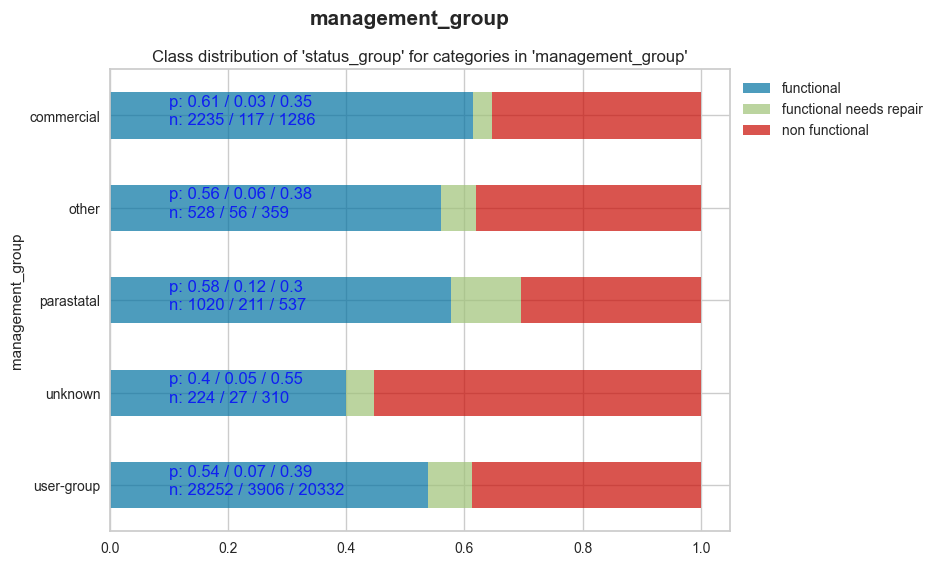

In [173]:
my.class_balance_barhplot(
    x=df['management_group'],
    y=df['status_group']
);

Observaciones:
- **unkown es la categoría que más se diferencia del resto**. La presencia de dicha categoría aporta bastante poder predictivo a esta variable. **561 observaciones absolutas son decentes** para sacar conclusiones válidas aunque sean muy bajas en comparación con las otras.
- Por si acaso, **más tarde crearemos la versión binarizada** de esta variable.

#### quality_group

In [174]:
show_freq_cat(
    cat='quality_group',
    n_rows_display=20
)

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: quality_group, dtype: float64


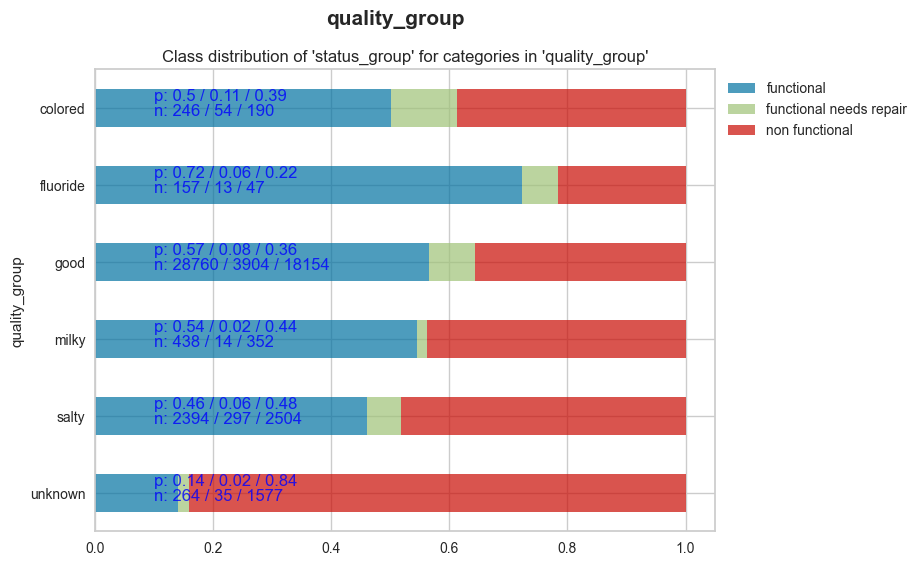

In [175]:
my.class_balance_barhplot(
    x=df['quality_group'],
    y=df['status_group']
);

Observaciones:
- Cerca del **83% de las bombas de agua con calidad desconocida no son funcionales**!
- Esta variable tiene **gran capacidad discriminatoria frente a la objetivo**.
- Mantenemos esta variable y **crearemos una binarizada** más tarde. 

#### source_class & source_type

In [176]:
show_freq_cat(
    cat='source_class',
    n_rows_display=20
)

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64


In [177]:
show_freq_cat(
    cat='source_type',
    n_rows_display=20
)

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

spring                  0.286549
shallow well            0.283232
borehole                0.201162
river/lake              0.174697
rainwater harvesting    0.038636
dam                     0.011044
other                   0.004680
Name: source_type, dtype: float64


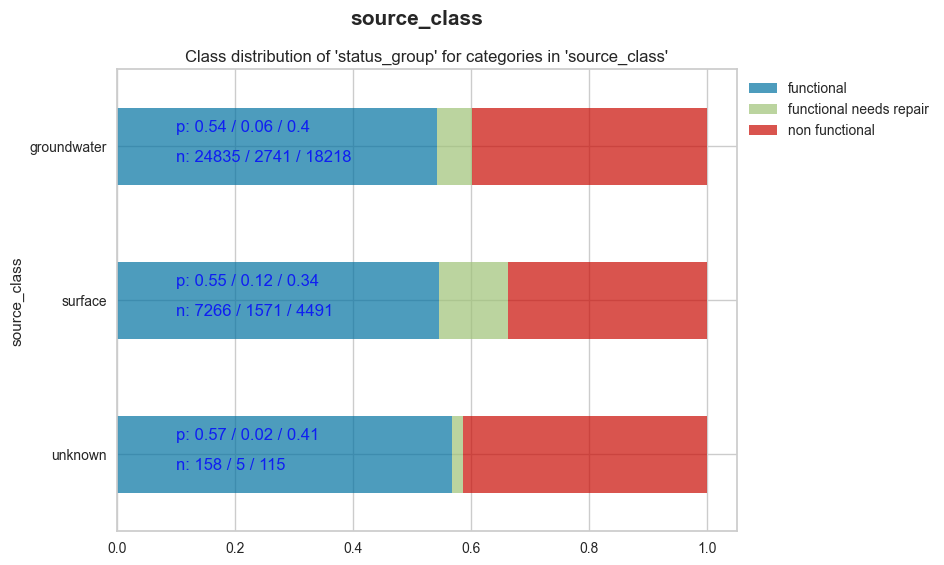

In [178]:
my.class_balance_barhplot(
    x=df['source_class'],
    y=df['status_group']
);

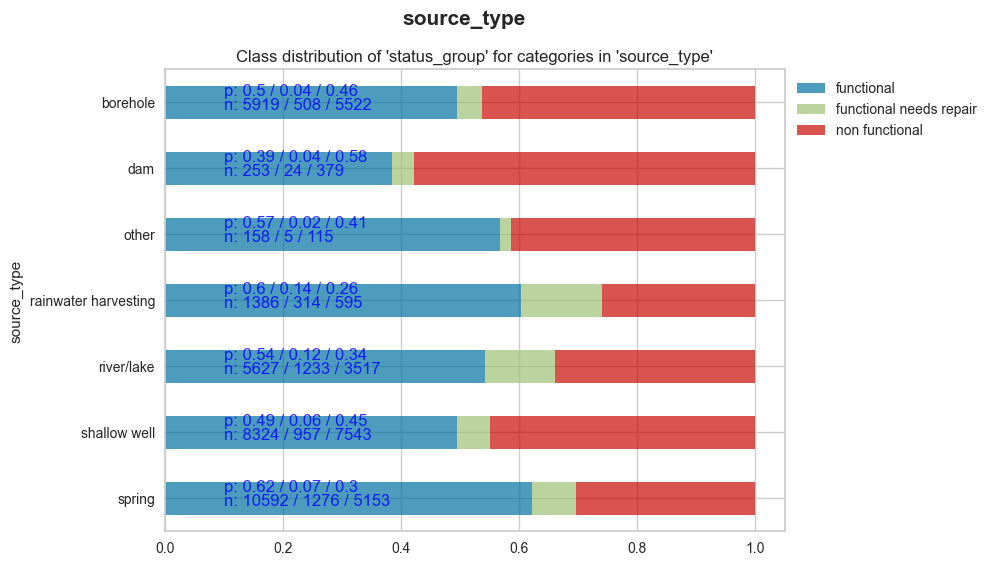

In [179]:
my.class_balance_barhplot(
    x=df['source_type'],
    y=df['status_group']
);

Observaciones:
- **La variable con más granularidad presenta más variación** en la distribución de etiquetas del objetivo a lo largo de las distintas categoría que la general source_class, el cual preseneta poca variación.
- Por ello, **optaré por** `source_type` y seguramente descartemos source_class.

#### waterpoint_type

In [180]:
show_freq_cat(
    cat='waterpoint_type',
    n_rows_display=20
)

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                            0.000118
Name: waterpoint_type, dtype: float64


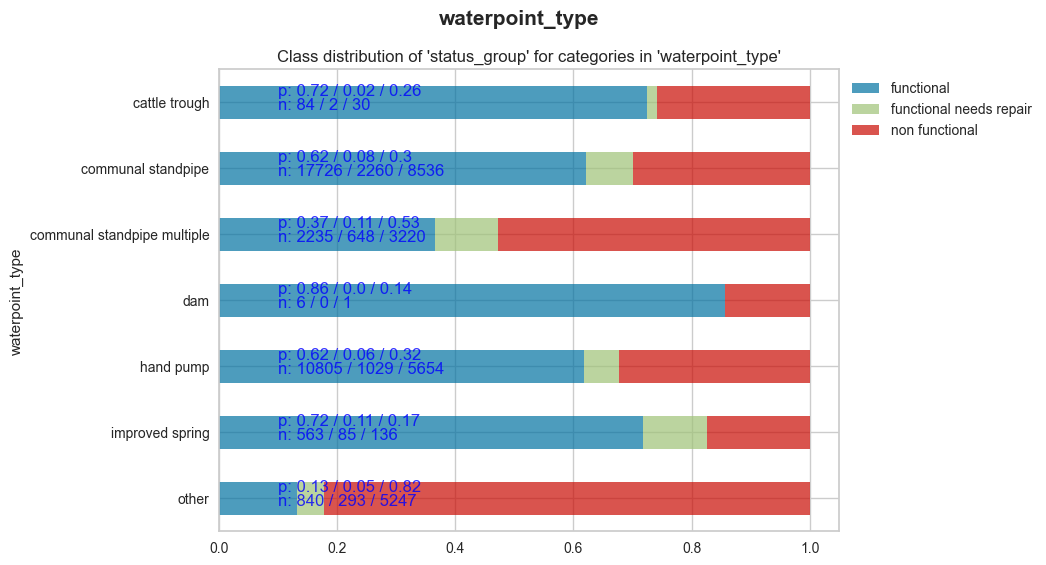

In [181]:
my.class_balance_barhplot(
    x=df['waterpoint_type'],
    y=df['status_group']
);

In [182]:
df['waterpoint_type'].replace(to_replace=['dam', 'cattle trough'], value='other', inplace=True)
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6503
communal standpipe multiple     6103
improved spring                  784
Name: waterpoint_type, dtype: int64

Observaciones:
- Las **categorías dam y cattle trough tienen muy pocas muestras** para mantenerse como categorías independientes. Vamos a **agrupar dichas categorías con other**. Son pocas muestras, por ello se espera que no afecte tanto la relación de la categoría other con la objetivo.

## Tratamiento de Atípicos

In [183]:
# Visualizar pctg de valores atípicos por debajo o arriba.
#Ninguna distribución es normal (kolmogorov test).
df[num_list].apply(lambda x: my.manage_outliers(series=x, mode='check', non_normal_crit='IQR', multiplier=3))

'amount_tsh':         non-normal (Kolmogo | +-3 IQR)
'gps_height':         non-normal (Kolmogo | +-3 IQR)
'longitude':          non-normal (Kolmogo | +-3 IQR)
'latitude':           non-normal (Kolmogo | +-3 IQR)
'num_private':        non-normal (Kolmogo | +-3 IQR)
'population':         non-normal (Kolmogo | +-3 IQR)
'construction_year':  non-normal (Kolmogo | +-3 IQR)


amount_tsh  gps_height  longitude  latitude  num_private  \
lower (%)        0.00         0.0        0.0       0.0         0.00   
upper (%)       18.72         0.0        0.0       0.0         1.27   
All (%)         18.72         0.0        0.0       0.0         1.27   

           population  construction_year  
lower (%)         0.0                0.0  
upper (%)         3.3                0.0  
All (%)           3.3                0.0

In [184]:
df[num_list].apply(lambda x: my.manage_outliers(series=x, mode='return', non_normal_crit='IQR', multiplier=3))


---------------- amount_tsh ----------------
100.0        816
150.0         21
200.0       1220
220.0          1
250.0        569
            ... 
138000.0       1
170000.0       1
200000.0       1
250000.0       1
350000.0       1
Name: amount_tsh, Length: 74, dtype: int64

---------------- gps_height ----------------
Series([], Name: gps_height, dtype: int64)

---------------- longitude ----------------
Series([], Name: longitude, dtype: int64)

---------------- latitude ----------------
Series([], Name: latitude, dtype: int64)

---------------- num_private ----------------
1       73
2       23
3       27
4       20
5       46
        ..
672      1
698      1
755      1
1402     1
1776     1
Name: num_private, Length: 64, dtype: int64

---------------- population ----------------
862      1
863      4
864      1
865      2
866      1
        ..
9865     1
10000    3
11463    1
15300    1
30500    1
Name: population, Length: 341, dtype: int64

---------------- construction_year ----

amount_tsh           None
gps_height           None
longitude            None
latitude             None
num_private          None
population           None
construction_year    None
dtype: object

Observaciones:
- Observamos valores atípicos muy altos en `amount_tsh` (18.72%), `num_private` (1.27%), `population` (3.3%) como se podía intuir al visualizar las distribuciones de dichas variables numéricas.
- Al no poder confirmar si se tratan de valores válidos (yo creo que sí los son), los dejaremos sin tratar. No obstante, **se crearán variables tramificadas/binarias para dichas numéricas** para tratar de reducir el efecto de atípicos.
- Evitaremos utilizar modelos lineales de clasificación y vamos a **utilizar modelos basados en árboles**, los cuales son más robustos a la presencia de valores atípicos. 

## Tratamiento de Missings

In [185]:
# Conteo de nulos por variable
df.isna().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer_reduced         3655
installer                 3655
funder                    3635
funder_reduced            3635
public_meeting            3334
permit                    3056
longitude                 1812
latitude                  1812
subvillage                 371
quantity                     0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
source_class                 0
quantity_group               0
source                       0
source_type                  0
management                   0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
management_group             0
id                           0
extraction_type_class        0
region_code                  0
date_recorded                0
gps_height                   0
wpt_name                     0
num_private                  0
basin   

In [186]:
# frecuencia de nulos por variable
df.isna().mul(100).mean().round(2).sort_values(ascending=False)

scheme_name              47.42
scheme_management         6.53
installer_reduced         6.15
installer                 6.15
funder                    6.12
funder_reduced            6.12
public_meeting            5.61
permit                    5.14
longitude                 3.05
latitude                  3.05
subvillage                0.62
quantity                  0.00
payment                   0.00
payment_type              0.00
water_quality             0.00
quality_group             0.00
source_class              0.00
quantity_group            0.00
source                    0.00
source_type               0.00
management                0.00
waterpoint_type           0.00
waterpoint_type_group     0.00
status_group              0.00
management_group          0.00
id                        0.00
extraction_type_class     0.00
region_code               0.00
date_recorded             0.00
gps_height                0.00
wpt_name                  0.00
num_private               0.00
basin   

### Método de imputación

#### scheme_name

- Porcentaje de nulos casi en casi la mita de observaciones totales: **47.42%**.
- No tiene pinta de ser una variable importante para predecir la target; **pasamos a eliminarla**.

#### scheme_management

In [187]:
df['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [188]:
# Pasamos None a nulos:
df['scheme_management'].replace('None', np.nan, inplace=True)
df['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

- Vamos a **imputar por la moda**: VWC.

#### installer

In [189]:
df['installer'].value_counts(dropna=False, normalize=True)

DWE                0.292963
NaN                0.061532
Government         0.030724
RWE                0.020303
Commu              0.017845
                     ...   
Wizara  ya maji    0.000017
TWESS              0.000017
Nasan workers      0.000017
R                  0.000017
SELEPTA            0.000017
Name: installer, Length: 2146, dtype: float64

- Vamos a **imputar por la moda**: DWE.

#### funder

In [190]:
df['funder'].value_counts(dropna=False, normalize=True)

Government Of Tanzania    0.152929
NaN                       0.061195
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
                            ...   
Rarymond Ekura            0.000017
Justine Marwa             0.000017
Municipal Council         0.000017
Afdp                      0.000017
Samlo                     0.000017
Name: funder, Length: 1898, dtype: float64

- Vamos a **imputar por la moda**: Government Of Tanzania.

#### public_meeting

In [191]:
df['public_meeting'].value_counts(dropna=False, normalize=True)

True     0.858771
False    0.085101
NaN      0.056128
Name: public_meeting, dtype: float64

In [192]:
df_temp = df.copy()

cat = 'public_meeting'
# Cambiar nulos a Otros
df_temp[cat].fillna('Desconocido', inplace=True)

# Cruzar categórica con target categórica:
print(pd.crosstab(
    index=df_temp['status_group'],
    columns=df_temp[cat],
    normalize='columns'
).round(decimals=2))

public_meeting           False  True  Desconocido
status_group                                     
functional                0.43  0.56         0.50
functional needs repair   0.09  0.07         0.05
non functional            0.48  0.37         0.45


- Vamos a **imputar por la moda**: True.
- Los **nulos no parecen diferenciarse mucho** de las otras dos.

#### permit

In [193]:
df['permit'].value_counts(dropna=False, normalize=True)

True     0.654074
False    0.294478
NaN      0.051448
Name: permit, dtype: float64

In [194]:
cat = 'permit'
# Cambiar nulos a Otros
df_temp[cat].fillna('Desconocido', inplace=True)

# Cruzar categórica con target categórica:
print(pd.crosstab(
    index=df_temp['status_group'],
    columns=df_temp[cat],
    normalize='columns'
).round(decimals=2))

permit                   False  True  Desconocido
status_group                                     
functional                0.52  0.55         0.55
functional needs repair   0.08  0.07         0.10
non functional            0.41  0.38         0.35


- Vamos a **imputar por la moda**: True.
- Los nulos no se diferencian mucho del resto. De hecho, **la distribución de la target en la categoría Desconocido es similar a la de True**. 

#### longitude & latitude                

In [195]:
df.loc[df.latitude.isnull()][['latitude', 'longitude']]

latitude  longitude
21          NaN        NaN
53          NaN        NaN
168         NaN        NaN
177         NaN        NaN
253         NaN        NaN
...         ...        ...
59189       NaN        NaN
59208       NaN        NaN
59295       NaN        NaN
59324       NaN        NaN
59374       NaN        NaN

[1812 rows x 2 columns]

In [196]:
print(df.loc[df.latitude.isnull()]['basin'].value_counts())
print()
print(df.loc[df.latitude.isnull()]['region'].value_counts())

Lake Victoria      1713
Lake Tanganyika      99
Name: basin, dtype: int64

Shinyanga    1005
Mwanza        807
Name: region, dtype: int64


In [197]:
# Observamos las estadísticas descriptivas de las latitudes y logitudes por cuencas/depresiones:
df.groupby('basin')[['latitude', 'longitude']].describe().round(2).T

basin            Internal  Lake Nyasa  Lake Rukwa  Lake Tanganyika  \
latitude  count   7785.00     5085.00     2454.00          6333.00   
          mean      -4.16       -9.70       -8.28            -4.60   
          std        0.85        0.58        0.90             1.25   
          min       -6.78      -11.56       -9.27            -8.67   
          25%       -4.67       -9.84       -8.97            -4.96   
          50%       -4.16       -9.50       -8.63            -4.51   
          75%       -3.51       -9.31       -7.75            -3.65   
          max       -1.98       -8.98       -6.18            -2.63   
longitude count   7785.00     5085.00     2454.00          6333.00   
          mean      34.95       34.25       32.38            31.21   
          std        1.10        0.68        0.80             1.09   
          min       32.76       32.80       30.71            29.61   
          25%       34.06       33.80       31.66            30.22   
          50%       34.95       34.05       32.72            30.98   
          75%       35.72       34.72       33.06            32.25   
          max       37.63       35.91       33.57            33.92   

basin            Lake Victoria  Pangani   Rufiji  Ruvuma / Southern Coast  \
latitude  count        8535.00  8940.00  7976.00                  4493.00   
          mean           -2.24    -3.93    -8.40                   -10.49   
          std             0.69     0.78     0.82                     0.59   
          min            -3.93    -5.93   -10.64                   -11.65   
          25%            -2.79    -4.63    -8.96                   -10.85   
          50%            -2.15    -3.48    -8.53                   -10.63   
          75%            -1.67    -3.30    -7.84                   -10.25   
          max            -1.00    -3.06    -5.54                    -8.50   
longitude count        8535.00  8940.00  7976.00                  4493.00   
          mean           32.76    37.62    35.84                    38.32   
          std             1.26     0.69     1.44                     1.55   
          min            30.43    36.42    33.53                    34.89   
          25%            31.59    37.05    34.75                    37.24   
          50%            33.03    37.54    35.60                    38.94   
          75%            33.78    38.20    36.68                    39.45   
          max            35.51    39.17    39.88                    40.35   

basin            Wami / Ruvu  
latitude  count      5987.00  
          mean         -6.58  
          std           0.43  
          min          -7.53  
          25%          -6.92  
          50%          -6.64  
          75%          -6.24  
          max          -5.15  
longitude count      5987.00  
          mean         37.89  
          std           1.06  
          min          35.68  
          25%          37.07  
          50%          37.79  
          75%          38.90  
          max          39.54

In [198]:
# Observamos las estadísticas descriptivas de las latitudes y logitudes por regiones:
df.groupby('region')[['latitude', 'longitude']].describe().round(2).T

region            Arusha  Dar es Salaam   Dodoma   Iringa   Kagera   Kigoma  \
latitude  count  3350.00         805.00  2201.00  5294.00  3316.00  2816.00   
          mean     -3.25          -6.91    -5.93    -8.91    -1.96    -4.30   
          std       0.30           0.10     0.68     0.70     0.64     0.58   
          min      -3.77          -7.16    -7.30   -10.52    -3.30    -5.42   
          25%      -3.39          -6.97    -6.36    -9.34    -2.59    -4.75   
          50%      -3.33          -6.91    -6.10    -9.08    -1.74    -4.49   
          75%      -3.23          -6.88    -5.56    -8.45    -1.41    -3.71   
          max      -1.82          -6.58    -4.34    -7.13    -1.00    -2.86   
longitude count  3350.00         805.00  2201.00  5294.00  3316.00  2816.00   
          mean     36.55          39.22    36.04    34.90    31.23    30.21   
          std       0.46           0.13     0.39     0.51     0.43     0.41   
          min      34.99          39.04    35.15    33.91    30.43    29.61   
          25%      36.53          39.12    35.79    34.57    30.84    29.82   
          50%      36.71          39.17    35.97    34.78    31.36    30.14   
          75%      36.85          39.34    36.36    35.17    31.60    30.59   
          max      37.40          39.54    36.92    36.52    32.11    31.20   

region           Kilimanjaro    Lindi  Manyara     Mara    Mbeya  Morogoro  \
latitude  count      4379.00  1546.00  1583.00  1969.00  4639.00   4006.00   
          mean         -3.52    -9.78    -4.29    -1.74    -9.10     -7.41   
          std           0.43     0.65     0.52     0.27     0.35      0.93   
          min          -4.61   -10.64    -5.95    -2.44    -9.70     -9.19   
          25%          -3.70   -10.25    -4.44    -1.94    -9.35     -8.14   
          50%          -3.31   -10.03    -4.22    -1.77    -9.15     -7.26   
          75%          -3.23    -9.54    -3.99    -1.58    -8.87     -6.75   
          max          -2.96    -8.28    -3.48    -1.04    -7.09     -5.82   
longitude count      4379.00  1546.00  1583.00  1969.00  4639.00   4006.00   
          mean         37.51    39.00    35.93    34.15    33.53     37.05   
          std           0.28     0.51     0.70     0.39     0.49      0.55   
          min          36.92    37.40    34.87    33.21    32.14     35.37   
          25%          37.28    38.77    35.44    33.89    33.12     36.69   
          50%          37.52    39.01    35.65    34.14    33.64     37.00   
          75%          37.66    39.41    36.49    34.47    33.86     37.53   
          max          38.11    39.96    37.88    35.22    34.88     38.48   

region            Mtwara   Mwanza    Pwani    Rukwa   Ruvuma  Shinyanga  \
latitude  count  1730.00  2295.00  2635.00  1808.00  2640.00    3977.00   
          mean    -10.68    -2.62    -7.01    -7.36   -10.77      -3.50   
          std       0.24     0.33     0.56     0.95     0.38       0.33   
          min     -11.37    -3.42    -8.48    -8.99   -11.65      -4.38   
          25%     -10.86    -2.85    -7.41    -8.11   -11.04      -3.77   
          50%     -10.71    -2.63    -6.94    -7.59   -10.75      -3.50   
          75%     -10.50    -2.48    -6.56    -6.42   -10.55      -3.23   
          max     -10.13    -1.71    -5.99    -5.50    -9.53      -2.82   
longitude count  1730.00  2295.00  2635.00  1808.00  2640.00    3977.00   
          mean     39.40    33.09    38.88    31.28    35.73      33.24   
          std       0.55     0.33     0.38     0.50     0.80       0.77   
          min      38.01    32.05    37.92    30.31    34.60      31.45   
          25%      39.01    32.94    38.67    31.04    35.06      32.54   
          50%      39.37    33.08    38.90    31.29    35.60      33.44   
          75%      39.87    33.35    39.13    31.64    36.08      33.86   
          max      40.35    33.76    39.88    32.49    37.96      34.76   

region           Singida   Tabora    Tanga  
latitude

- `latitude` y `longitude` tienen nulos (anteriormente 0s) en las mismos registros (1812)!
- **Vamos a imputarlos por las medias de dichas variables agrupadas por alguna variable geográfica**. Se han probado con basin y region, fijándose sobre todo en las desviacion estándar de estas dos variable geográficas en las categorías de interés (cuanto menor mejor):
    - `basin` (std latitude, std longitude):
        - Lake Victoria(0.69, 1.26),
        - Lake Tanganyika(1.25, 1.09)
    - `region` (std latitude, std longitude):
        - Shinyanga(0.33, 0.77),
        - Mwanza(0.33, 0.33)
- **Se opta por region por tener menor desviación estándar** en ambas categorías. 

#### subvillage

In [199]:
df['subvillage'].value_counts(dropna=False, normalize=True)

Madukani        0.008552
Shuleni         0.008519
Majengo         0.008451
Kati            0.006279
NaN             0.006246
                  ...   
Kipompo         0.000017
Chanyamilima    0.000017
Ikalime         0.000017
Kemagaka        0.000017
Kikatanyemba    0.000017
Name: subvillage, Length: 19288, dtype: float64

In [200]:
df['subvillage'].nunique()

19287

- Vamos a **imputar los nulos a Desconocido**, otra categoría independiente ya que no hay niguna categoría con mucha más frecuencia que otra y es complicado comparar la distribución de la target co tantas categorías únicas (19287).

### Imputación de nulos

#### Eliminar scheme_name

In [201]:
df.drop(columns='scheme_name', inplace=True)
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'funder_reduced', 'installer_reduced', 'district_code_reduced'],
      dtype='object')

#### Imputar latitude & longitude

In [202]:
latitude_by_region = df.groupby('region')['latitude'].mean()

df.loc[df.latitude.isnull(), 'latitude'] = df.loc[df.latitude.isnull()].apply(lambda row: latitude_by_region[row['region']], axis=1)

In [203]:
df['latitude'].value_counts()

-3.495696     1005
-2.620502      807
-2.506590        2
-6.981326        2
-6.958716        2
              ... 
-3.287619        1
-8.234989        1
-3.268579        1
-11.460531       1
-6.747464        1
Name: latitude, Length: 57518, dtype: int64

In [204]:
longitude_by_region = df.groupby('region')['longitude'].mean()

df.loc[df.longitude.isnull(), 'longitude'] = df.loc[df.longitude.isnull()].apply(lambda row: longitude_by_region[row['region']], axis=1)

In [205]:
df['longitude'].value_counts()

33.240121    1005
33.091564     807
37.375717       2
38.340501       2
39.086183       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: longitude, Length: 57517, dtype: int64

#### Imputar subvillage a Desconocido

In [206]:
df['subvillage'].fillna('Desconocido', inplace=True)

#### Imputar versiones reducidas

In [207]:
# Tras agrupar categorías infrecuentesa 'Rare', ésta se converierte en la
#categoría más frecuente. Debería haberlos agrupados después de imputar nulos; metí la pata :(
df['installer_reduced'].fillna('DWE', inplace=True)
df['funder_reduced'].fillna('Government Of Tanzania', inplace=True)

#### Imputar resto categóricas por la moda

In [208]:
vars_moda = [
    'scheme_management',
    'installer',
    'funder',
    'public_meeting',
    'permit'
]

In [209]:
from sklearn.impute import SimpleImputer

# Definir los imputadores:
imputer_moda = SimpleImputer(strategy="most_frequent")

In [210]:
# Imputar nulos:
cat_mode_imputed = pd.DataFrame(imputer_moda.fit_transform(df[vars_moda]),
                               columns=imputer_moda.get_feature_names_out())

# Reemplazar categóricas con sus versiones imputadas
df[vars_moda] = cat_mode_imputed

df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

# **Feature Engineering**

## Antigüedad de las bombas

In [211]:
# Obtener year_recorded de date_recorded:
df['year_recorded'] = df['date_recorded'].apply(lambda row: row.split('-')[0]).astype('int')
df['year_recorded'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64

- Pasar a **9999 los valores de year_recorded donde construction_year sea 0** (missing)
para que al restar estas dos variables resulte en 9999 y los pueda identificar fácilmente.
- **No se ha optado por convertirlo en ceros también** porque puede haber bombas construidas e inspeccionadas en el mismo año; antigüedad de 0!
- Después de haber obtenido la variable antigüedad pasamos a **tramificar dicha variable** por la gran presencia de missing no declarados en `construction_year`.

In [212]:
df.loc[df.construction_year == 0, ['year_recorded']] = 9999
df['year_recorded'].value_counts()

2013    22061
9999    20709
2011    15331
2012     1282
2004       17
Name: year_recorded, dtype: int64

In [213]:
# Crear una variable que representa la antigüedad de la bomba
#hasta la última inspección (recorded):
df['antiguedad_years'] = df['year_recorded'] - df['construction_year']
df['antiguedad_years']

0          12
1           3
2           4
3          27
4        9999
         ... 
59395      14
59396      15
59397    9999
59398    9999
59399       9
Name: antiguedad_years, Length: 59400, dtype: int64

In [214]:
# Menos mal que consideramos este caso!
df[df.antiguedad_years == 0][['year_recorded', 'construction_year', 'antiguedad_years']]

year_recorded  construction_year  antiguedad_years
10              2011               2011                 0
42              2011               2011                 0
402             2011               2011                 0
591             2011               2011                 0
593             2013               2013                 0
...              ...                ...               ...
58984           2012               2012                 0
59031           2011               2011                 0
59060           2011               2011                 0
59277           2011               2011                 0
59306           2013               2013                 0

[588 rows x 3 columns]

In [215]:
df[df.antiguedad_years < 0][['year_recorded', 'construction_year', 'antiguedad_years']]

year_recorded  construction_year  antiguedad_years
8729            2004               2008                -4
10441           2004               2006                -2
13366           2004               2011                -7
23373           2004               2009                -5
27501           2004               2009                -5
32619           2004               2005                -1
33942           2004               2007                -3
39559           2004               2009                -5
48555           2004               2008                -4

In [216]:
# Vamos a pasar estos 9 observaciones con antigüedad negativo a 9999 (missings):
df.loc[df.antiguedad_years < 0, 'antiguedad_years'] = 9999
df.antiguedad_years.value_counts().sort_index()

0         588
1        2303
2        2129
3        2740
4        1890
5        1980
6        1381
7        1404
8        1160
9         814
10        868
11       1352
12        559
13       1869
14       1160
15        993
16        826
17        636
18        754
19        766
20        541
21        578
22        323
23        905
24        261
25        583
26        589
27        762
28        709
29        564
30        359
31        709
32        174
33       1120
34        184
35        647
36        325
37        600
38        351
39        601
40        233
41        488
42         90
43        356
44         47
45         66
46         48
47         14
48         41
49         25
50         84
51         31
52         11
53         91
9999    20718
Name: antiguedad_years, dtype: int64

In [217]:
# Por último, vamos a tramificarla de 10 años en 10 (0-53):
condition_list = [
    (df.antiguedad_years == 9999),  # 9999 indicador de missing (no podemos operar con str y int)!
    (df.antiguedad_years >= 0) & (df.antiguedad_years <= 9),
    (df.antiguedad_years >= 10) & (df.antiguedad_years <= 19),
    (df.antiguedad_years >= 20) & (df.antiguedad_years <= 29),
    (df.antiguedad_years >= 30) & (df.antiguedad_years <= 40),
    (df.antiguedad_years >= 41) & (df.antiguedad_years <= 53),
]

choice_list = [
    'Desconocido',
    '0-9',
    '10-19',
    '20-29',
    '30-40',
    '41-53'
]

df['antiguedad_years_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default='Error')
# Convertirla a categórica para mantener el orden de las categorías:
df['antiguedad_years_disc'] = pd.Categorical(df['antiguedad_years_disc'], categories=choice_list, ordered=True)
df['antiguedad_years_disc'].value_counts(sort=False, dropna=False)

Desconocido    20718
0-9            16389
10-19           9783
20-29           5815
30-40           5303
41-53           1392
Name: antiguedad_years_disc, dtype: int64

In [218]:
df[['antiguedad_years', 'year_recorded', 'construction_year']]

antiguedad_years  year_recorded  construction_year
0                    12           2011               1999
1                     3           2013               2010
2                     4           2013               2009
3                    27           2013               1986
4                  9999           9999                  0
...                 ...            ...                ...
59395                14           2013               1999
59396                15           2011               1996
59397              9999           9999                  0
59398              9999           9999                  0
59399                 9           2011               2002

[59400 rows x 3 columns]

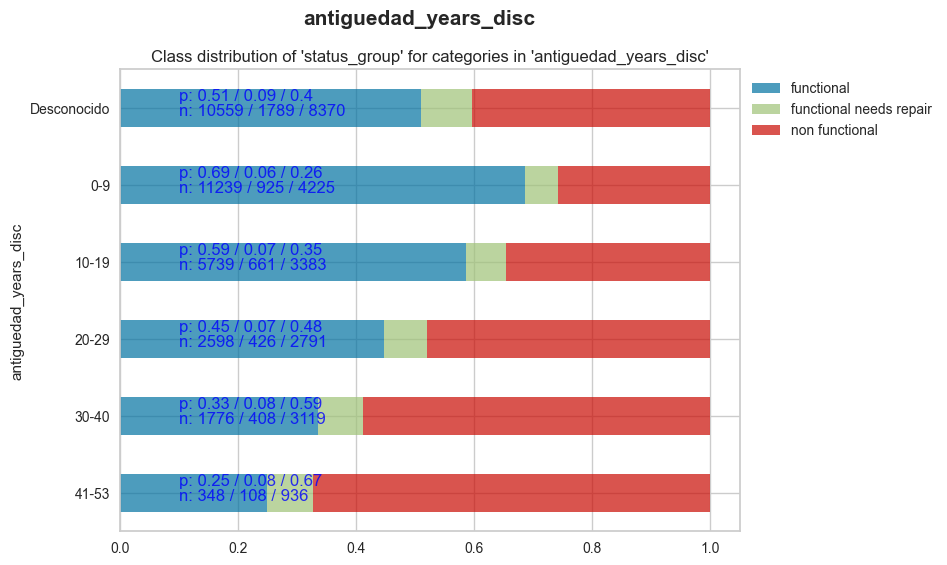

In [219]:
my.class_balance_barhplot(
    x=df['antiguedad_years_disc'],
    y=df['status_group']
);

Observaciones:
- La versión discretizada de la antigüedad de las bombas discrimina muy bien frente a la objetivo. **A mayor antigüedad de las bombas, más proporción de bobmas no funcionales**!
- El aumento gradual de bombas a mayor antigüedad señala **gran asociación con la y en su forma continua**. No obstante, la gran cantidad de nulos no declarados impide tratarla de esa manera ya que implicaría perder información de más de un tercio de observaciones.

## Tramificar gps_height

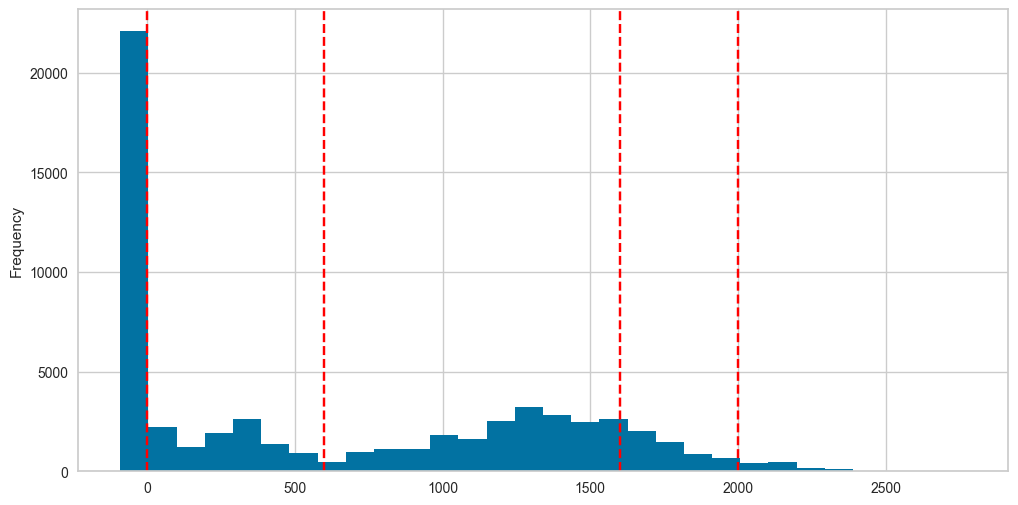

In [220]:
_, ax = plt.subplots(figsize=(12,6))

df['gps_height'].plot.hist(bins=30, ax=ax)
ax.axvline(0, color='red', ls='--')
ax.axvline(600, color='red', ls='--')
ax.axvline(1600, color='red', ls='--')
ax.axvline(2000, color='red', ls='--')
plt.show()

In [221]:
condition_list = [
    (df.gps_height < 0),  
    (df.gps_height == 0), 
    (df.gps_height > 0) & (df.gps_height <= 600),
    (df.gps_height >= 601) & (df.gps_height <= 1600),
    (df.gps_height >= 1601) & (df.gps_height <= 2000),
    (df.gps_height > 2000)
]

choice_list = [
    '<0',
    '0',
    '1-600',
    '601-1600',
    '1601-2000',
    '2000+'
]

df['gps_height_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default=-999)
# Convertirla a categórica para mantener el orden de las categorías:
df['gps_height_disc'] = pd.Categorical(df['gps_height_disc'], categories=choice_list, ordered=True)
df['gps_height_disc'].value_counts(sort=False, dropna=False)

<0            1496
0            20438
1-600        10520
601-1600     20020
1601-2000     5704
2000+         1222
Name: gps_height_disc, dtype: int64

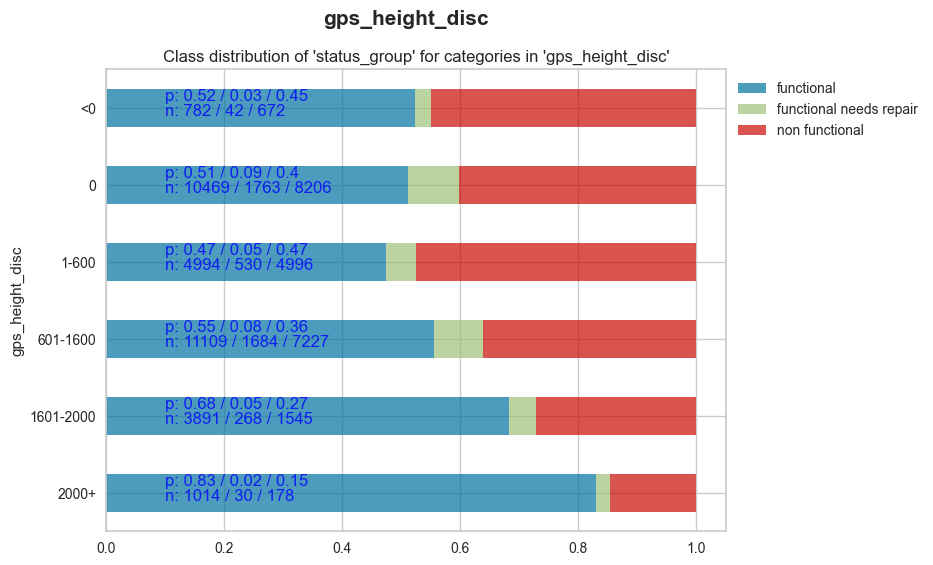

In [222]:
my.class_balance_barhplot(
    x=df['gps_height_disc'],
    y=df['status_group']
);

Observaciones:
- Se ha tramificado la variable `gps_height` en 6 tramos:
    - **<0**: bombas situadas bajo nivel del mar?
    - **0**: bombas situadas a altura 0 (no sabemos si son válidos o missing no declarados). Por ello, le dedicamos una categoría independiente.
    - **el resto de tramos**: bombas situadas a cada vez más altura.
- Al cruzar la versión tramificada de gps_height con la objetiva se revela una asociación interesante: **las bombas a mayor altura son relativamente más funcionales que los que se encuentran alturas bajas**.
- ¿Mayor demanda y competición de recursos de agua a baja altura? ¿Condiciones climáticas? ¿Mejor mantenimiento?

## Binarizar/tramificar amount_tsh

In [223]:
df['amount_tsh'].value_counts().sort_index().index

Float64Index([     0.0,      0.2,     0.25,      1.0,      2.0,      5.0,
                   6.0,      7.0,      9.0,     10.0,     12.0,     15.0,
                  20.0,     25.0,     26.0,     30.0,     33.0,     35.0,
                  40.0,     50.0,     53.0,     59.0,     60.0,     70.0,
                 100.0,    150.0,    200.0,    220.0,    250.0,    300.0,
                 306.0,    350.0,    400.0,    450.0,    500.0,    520.0,
                 550.0,    590.0,    600.0,    700.0,    750.0,    800.0,
                 900.0,   1000.0,   1200.0,   1300.0,   1400.0,   1500.0,
                2000.0,   2200.0,   2400.0,   2500.0,   2800.0,   3000.0,
                3500.0,   3600.0,   4000.0,   4500.0,   4700.0,   5000.0,
                5400.0,   5500.0,   6000.0,   6300.0,   6500.0,   7000.0,
                7200.0,   7500.0,   8000.0,   8500.0,   9000.0,  10000.0,
               11000.0,  12000.0,  13000.0,  14000.0,  15000.0,  16000.0,
               16300.0,  18000.0,  200

In [224]:
df['amount_tsh'].value_counts(normalize=True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [225]:
df['water_disponible'] = np.where(df.amount_tsh == 0, 0, 1)
df['water_disponible'].value_counts(normalize=True)

0    0.700993
1    0.299007
Name: water_disponible, dtype: float64

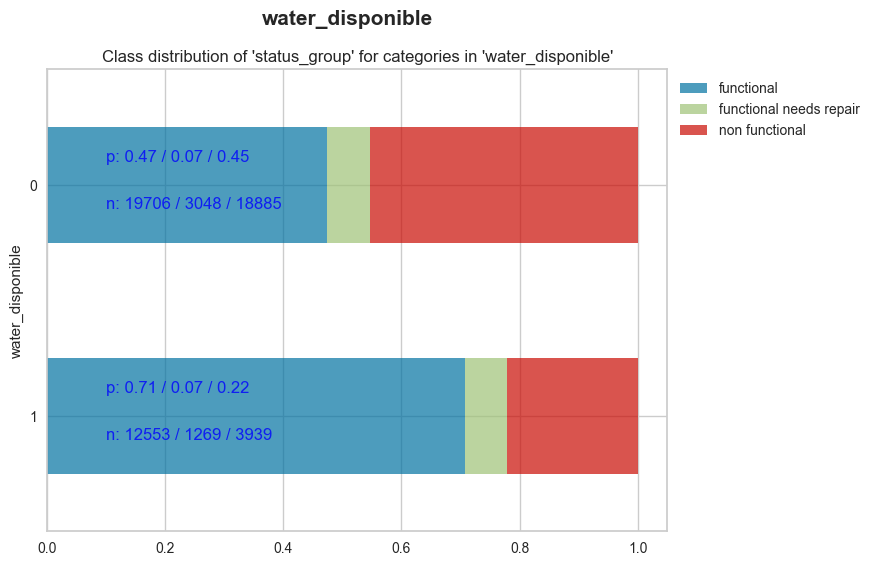

In [226]:
my.class_balance_barhplot(
    x=df['water_disponible'],
    y=df['status_group']
);

In [227]:
condition_list = [
    (df.amount_tsh == 0), 
    (df.amount_tsh > 0) & (df.amount_tsh <= 100),
    (df.amount_tsh >= 101) & (df.amount_tsh <= 500),
    (df.amount_tsh >= 501) & (df.amount_tsh <= 2500),
    (df.amount_tsh > 2500)
]

choice_list = [
    '0',
    '1-100',
    '101-500',
    '501-2500',
    '2500+'
]

df['amount_tsh_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default='Error')
# Convertirla a categórica para mantener el orden de las categorías:
df['amount_tsh_disc'] = pd.Categorical(df['amount_tsh_disc'], categories=choice_list, ordered=True)
df['amount_tsh_disc'].value_counts(sort=False, dropna=False)

0           41639
1-100        7456
101-500      5558
501-2500     3251
2500+        1496
Name: amount_tsh_disc, dtype: int64

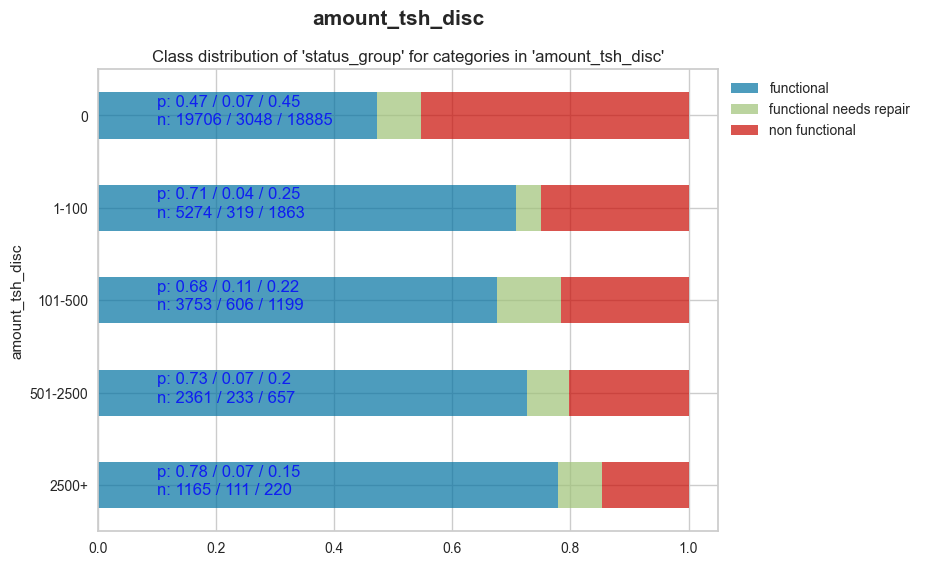

In [228]:
my.class_balance_barhplot(
    x=df['amount_tsh_disc'],
    y=df['status_group']
);

Observaciones:
- Aquí **se han creado una binarizada y otra tramificada** de la variable `amount_tsh`.
- En cuanto a asociación, **la binarizada tiene pinta de discriminar mejor que la tramificada** puesto que los tramos de la última no se diferencian mucho del resto a excepción del tramo 0!
- Al parecer en puntos sin agua, hay más proporción de bombas de agua no funcionales.

## Tramificar population

In [229]:
df['population'].value_counts(normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
6330    0.000017
5030    0.000017
656     0.000017
948     0.000017
788     0.000017
Name: population, Length: 1049, dtype: float64

In [230]:
df['population'].value_counts().sort_index().index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
             8500,  8600,  8848,  9000,  9500,  9865, 10000, 11463, 15300,
            30500],
           dtype='int64', length=1049)

In [231]:
condition_list = [
    (df.population == 0), 
    (df.population >= 1) & (df.population <= 100),
    (df.population >= 101) & (df.population <= 1000),
    (df.population > 1000)
]

choice_list = [
    '0',
    '1-100',
    '101-1000',
    '1000+'
]

df['population_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default='Error')
# Convertirla a categórica para mantener el orden de las categorías:
df['population_disc'] = pd.Categorical(df['population_disc'], categories=choice_list, ordered=True)
df['population_disc'].value_counts(sort=False, dropna=False)

0           21381
1-100       15917
101-1000    20690
1000+        1412
Name: population_disc, dtype: int64

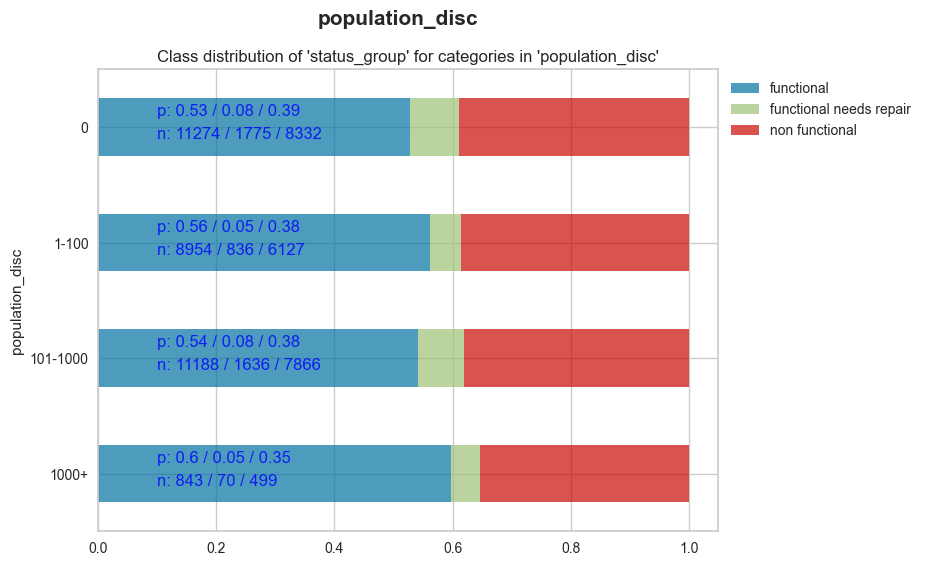

In [232]:
my.class_balance_barhplot(
    x=df['population_disc'],
    y=df['status_group']
);

Observaciones:
- Se ha creado **la variable discretizada con dichos tramos después de cuantas rondas de prueba y error**. Estos tramos fueron los que más se diferencian entre ellos al cruzar con la y dentro de las alternativas que se probaron.

## Agua disponible per cápita

In [233]:
# Pasamos 0s en population a missing (np.nan) para identificar
#para tratar divisiones por zeros. Después imputaremos estos nulos por zeros!
df['water_percapita'] = df['amount_tsh'] / df['population'].replace(0, np.nan)
df['water_percapita'].value_counts(dropna=False, normalize=True)

NaN           0.359949
0.000000      0.358300
0.200000      0.007239
50.000000     0.007088
3.333333      0.006667
                ...   
146.666667    0.000017
0.185874      0.000017
20.408163     0.000017
0.785340      0.000017
83.928571     0.000017
Name: water_percapita, Length: 1915, dtype: float64

In [234]:
# Imputar esos nulos (divisiones por zeros) a 0s!
df['water_percapita'].fillna(0, inplace=True)
df['water_percapita'].value_counts(dropna=False, normalize=True)

0.000000     0.718249
0.200000     0.007239
50.000000    0.007088
3.333333     0.006667
20.000000    0.006397
               ...   
0.165000     0.000017
1.096491     0.000017
0.956938     0.000017
21.276596    0.000017
83.928571    0.000017
Name: water_percapita, Length: 1914, dtype: float64

Observaciones:
- `water_percapita` es una variable que represente la cantidad de agua disponible en relación con la población alrededor del pozo.
- Si la cantidad de agua disponible por persona es baja en comparación con la población, esto podría indicar una **presión mayor sobre la fuente de agua y aumentar el riesgo de que la bomba falle**.
- No se espera mucho de dicha variable por la cantidad de ceros que contiene $\approx$ 72%!

## Binarizar Categóricas

In [235]:
df['management_group'].value_counts(normalize=True)

user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64

In [236]:
df['user_group_management'] = np.where(df['management_group'] == 'user-group', 1, 0)
df['user_group_management'].value_counts(normalize=True)

1    0.88367
0    0.11633
Name: user_group_management, dtype: float64

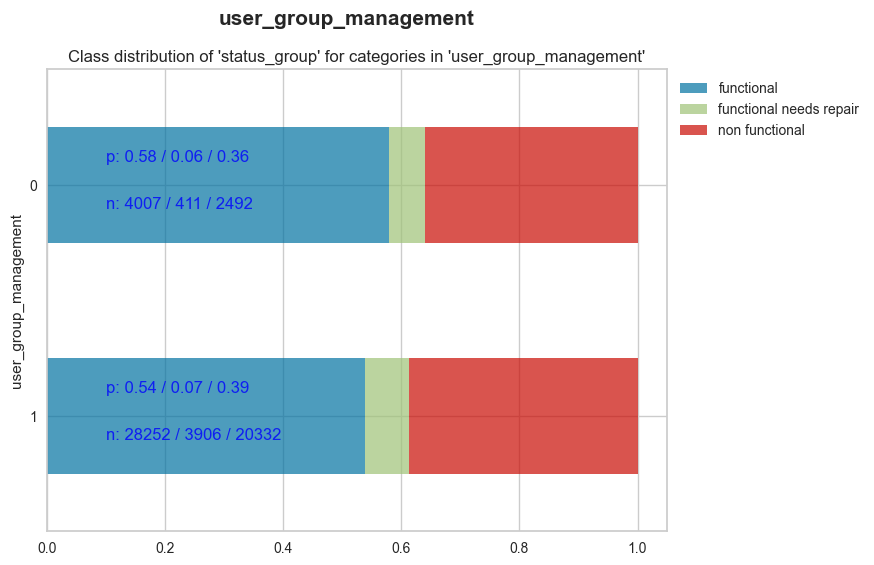

In [237]:
my.class_balance_barhplot(
    x=df['user_group_management'],
    y=df['status_group']
);

In [238]:
df['quality_group'].value_counts(normalize=True)

good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: quality_group, dtype: float64

In [239]:
df['good_water_quality'] = np.where(df['quality_group'] == 'good', 1, 0)
df['good_water_quality'].value_counts(normalize=True)

1    0.855522
0    0.144478
Name: good_water_quality, dtype: float64

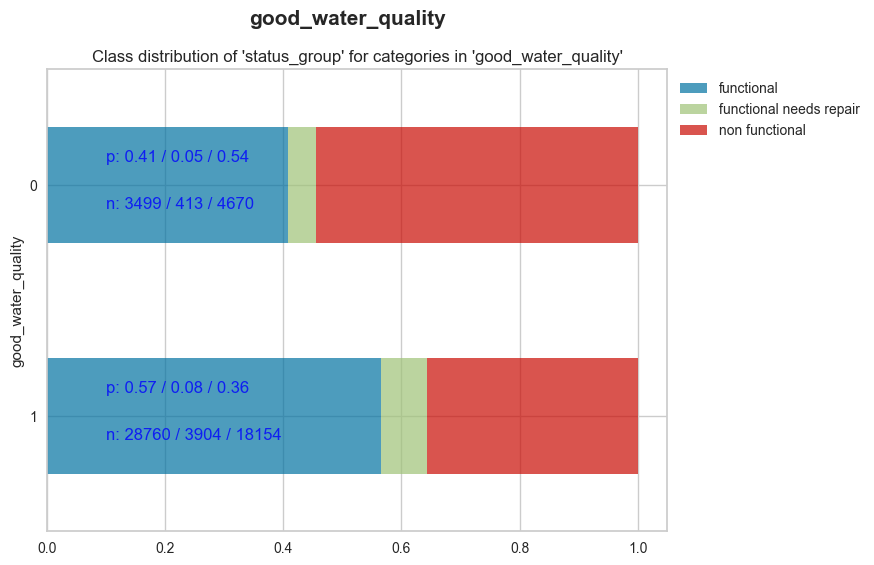

In [240]:
my.class_balance_barhplot(
    x=df['good_water_quality'],
    y=df['status_group']
);

Observaciones:
- La **versión binarizada de management_group deja mucho que desear** en cuanto a su poder predictivo frente a la y.
- En su lugar, la binarizada de quality_group si que pinta mejor: **las bombas de agua en puntos con agua de buena calidad son menos propensas a dejar de funcionar**.

## Frequency Categorical Enconding

In [241]:
# Vamos a crear categóricas con las frecuencias de sus etiquetas como valores en:
# funder, installer, subvillage, region. Todas son categóricas con alta cardinalidad!
cats_to_freq = ['funder', 'installer', 'subvillage', 'region', 'ward', 'lga', 'wpt_name']
for cat in cats_to_freq:
    dict_freqs = df[cat].value_counts(normalize=True).to_dict()
    df[f"{cat}_freq"] = df[cat].map(dict_freqs)

In [242]:
df[['funder_freq', 'installer_freq', 'subvillage_freq', 'region_freq']]

funder_freq  installer_freq  subvillage_freq  region_freq
0         0.004630        0.001582         0.000101     0.089125
1         0.000892        0.000657         0.000084     0.033148
2         0.000135        0.006869         0.008451     0.026650
3         0.017795        0.003737         0.000286     0.029125
4         0.000017        0.002273         0.000034     0.055825
...            ...             ...              ...          ...
59395     0.010269        0.010269         0.000067     0.073721
59396     0.000387        0.000253         0.000236     0.089125
59397     0.214125        0.354495         0.000034     0.078098
59398     0.000051        0.000084         0.000404     0.037054
59399     0.022710        0.002037         0.000017     0.067441

[59400 rows x 4 columns]

# **EDA**

## Eliminar variables

In [243]:
print('Número de columnas:' ,len(df.columns))

df.columns

Número de columnas: 59


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'funder_reduced', 'installer_reduced', 'district_code_reduced',
       'year_recorded', 'antiguedad_years', 'antiguedad_years_disc',
       'gps_height_disc', 'water_disponible', 'amount_tsh_disc',
       'population_disc', 'water_percapita', 'user_group_management',
       'good_water_quality', 'funder_freq', 'installer_freq',
       'subvill

In [244]:
cols_to_delete = [
    'id', 'date_recorded', 'construction_year', 'year_recorded',
    'funder', 'installer', 'subvillage', 'ward', 'lga', 'wpt_name',
    'extraction_type', 'extraction_type_group',
    'management', 'payment', 'quantity', 'region_code', 'region',
    'scheme_management', 'source', 'source_class',
    'water_quality', 'waterpoint_type_group',
]

# Eliminamos estas variables por criterios explicados
#en apartados anteriores!
len(cols_to_delete)

22

In [245]:
df.drop(columns=cols_to_delete, inplace=True)
len(df.columns)

37

## Asociación de Xs con y

### General

In [246]:
y = df['status_group']
X = df.drop(columns='status_group')

X.shape, y.shape

((59400, 36), (59400,))

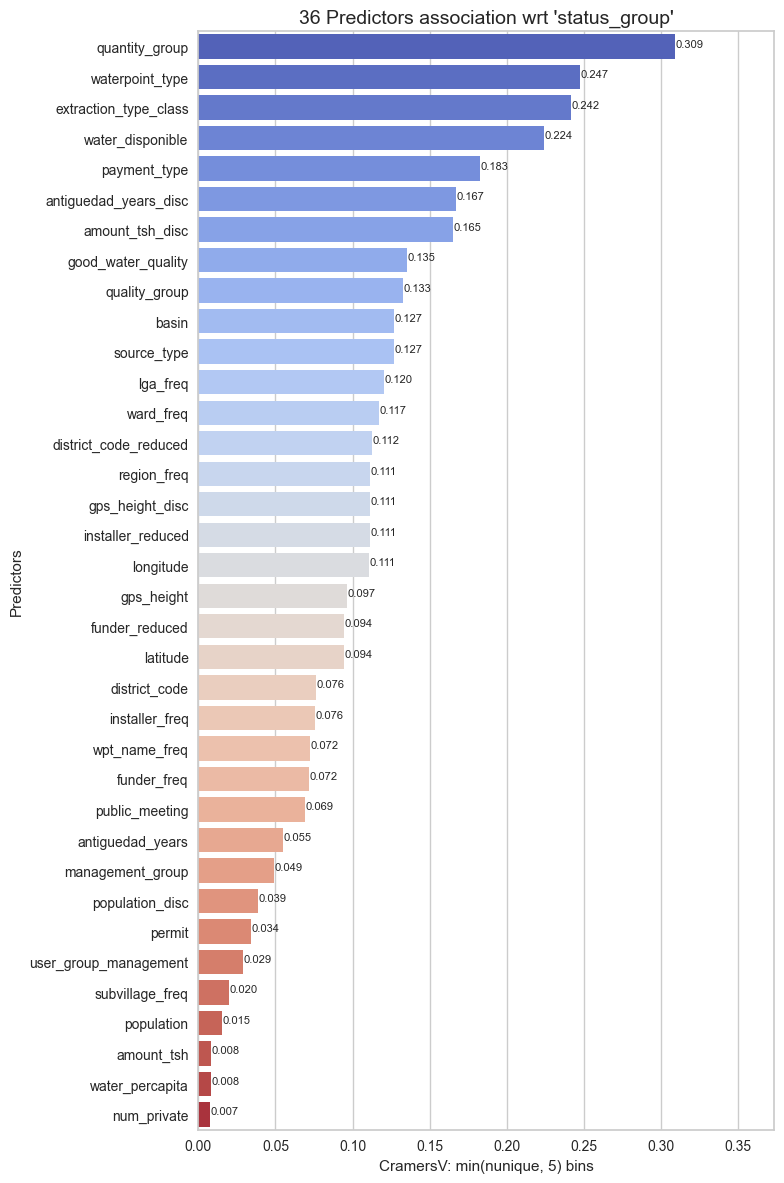

In [247]:
df_crammer_wdf = X.apply(lambda x: my.get_cramersV(x=x, y=y))
my.association_barplot(df_crammer_wdf, y=y, figsize=(8, 12))

### Numéricas

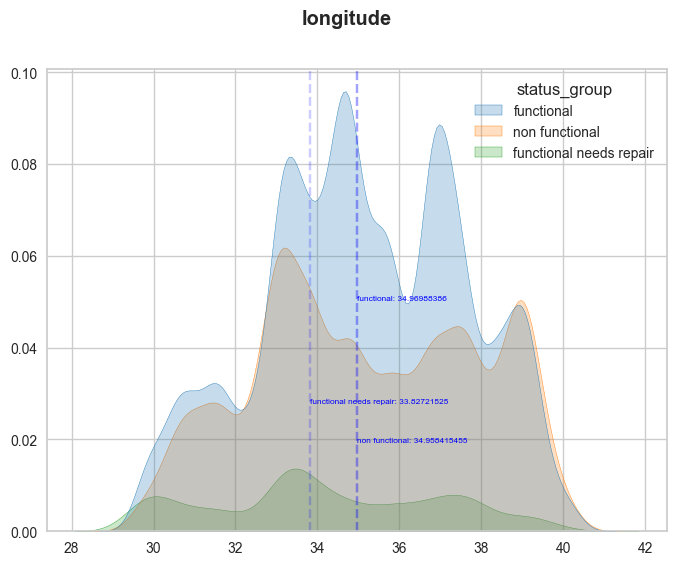

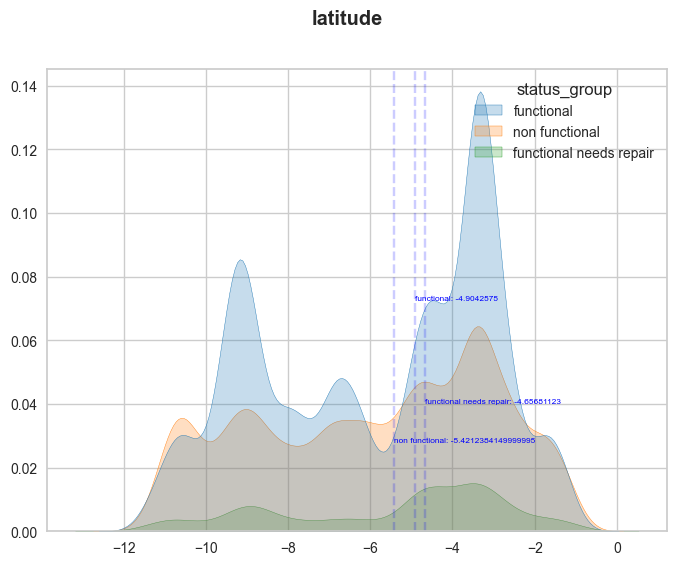

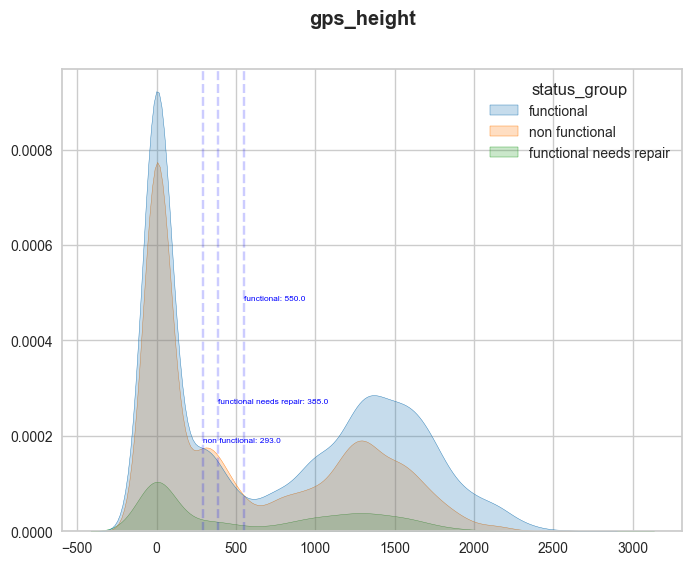

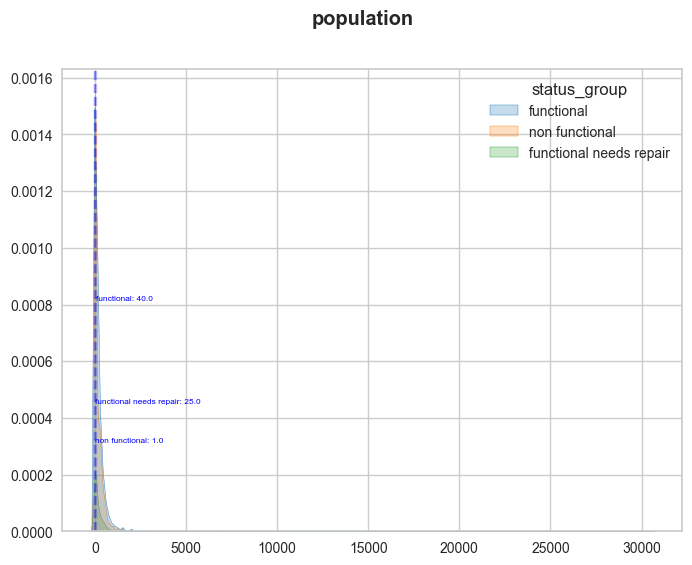

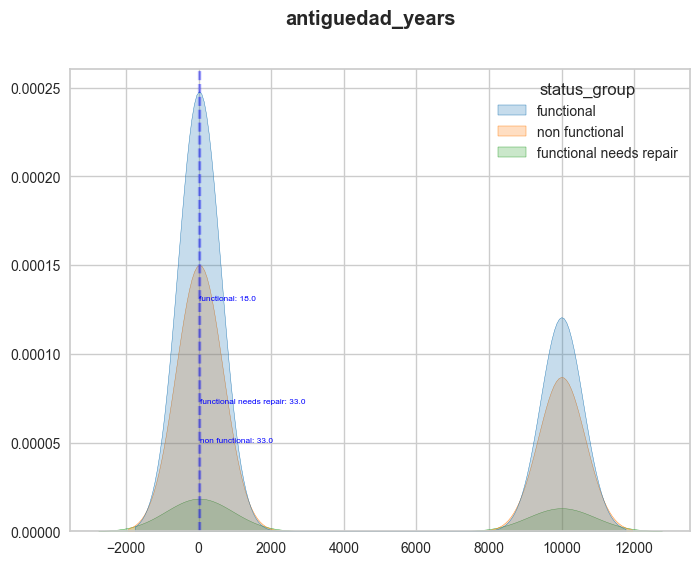

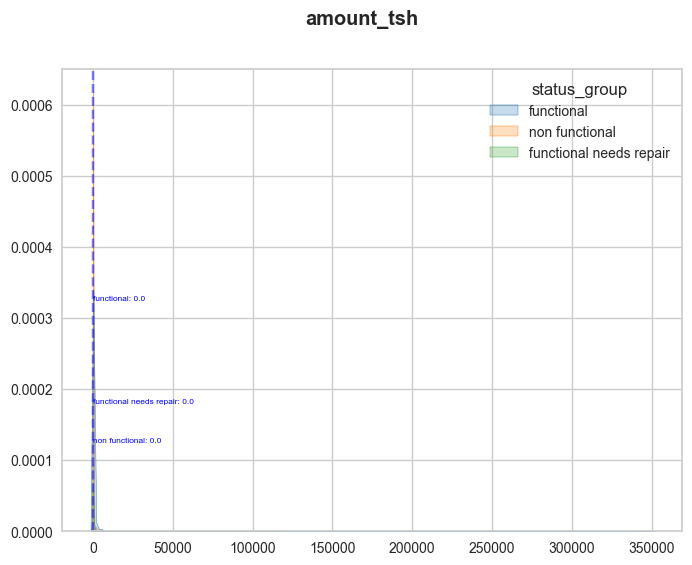

In [248]:
num_list = ['longitude', 'latitude', 'gps_height', 'population', 'antiguedad_years', 'amount_tsh']
for num in num_list:
    my.kdeplot_by_class(
        df=df,
        x_num=num,
        y_cat='status_group'
    )

### Categóricas

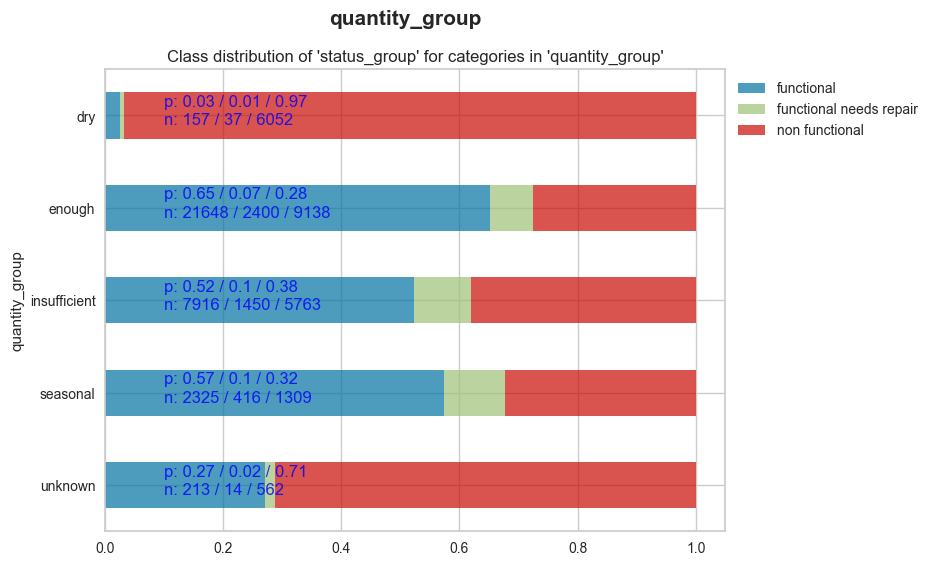

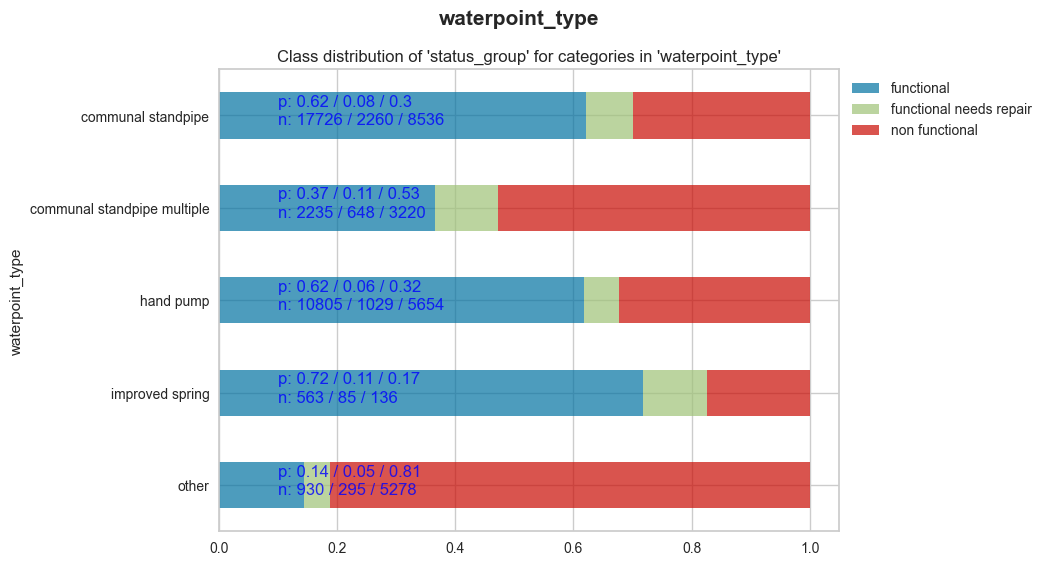

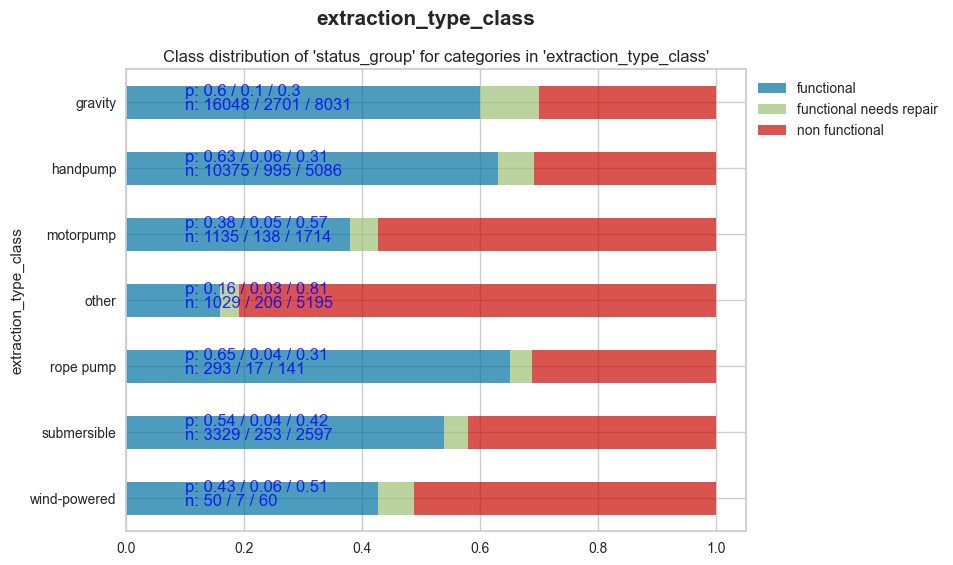

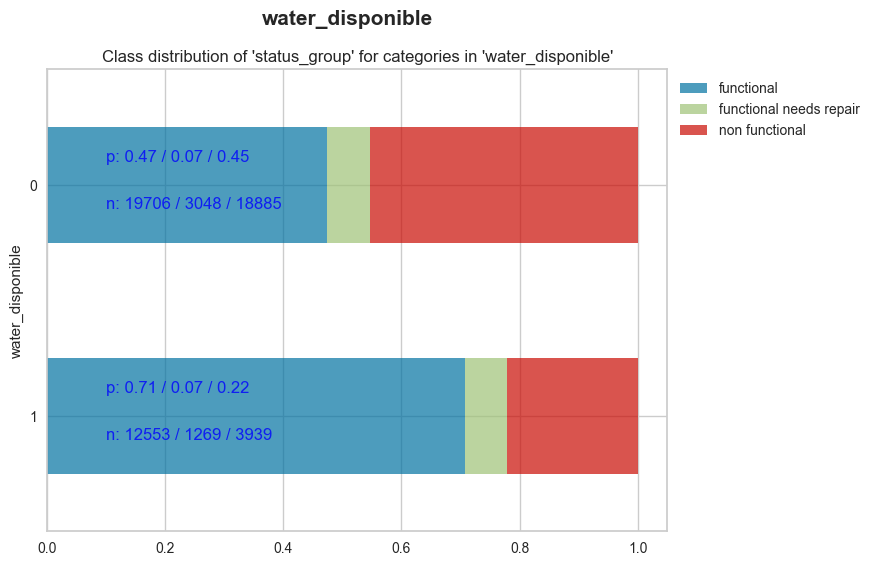

In [249]:
best_cats = ['quantity_group', 'waterpoint_type', 'extraction_type_class', 'water_disponible']
for cat in best_cats:
    my.class_balance_barhplot(
        x=df[cat],
        y=df['status_group']
    )

Observations:
- Las **más predictivas a nivel univariante basado en la métrica de Cramer's V**: `quantity_group`, `waterpoint_type`, `extraction_type_class`, `water_disponible`. Esta métrica permite calcular la asociación entre predictoras tanto categóricas como numéricas con la objetivo categórica a través de la tabla de contingencia entre la predictora y la objetivo. Si la predictora es numérica la función personal `get_cramersV` la discretiza con pd.cut a 5 bins. Dicha métrica es capaz de captar cierta no linealidad en entre predictoras y la target.
- En cuanto a las predictoras numéricas, **la distribución de las etiquetas de la objetivo frente a las continuas están muy solapadas**, lo cual indicar su poca capacidad discriminatoria.

# **Categorical Encoding**

## Categorical target

In [250]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [251]:
df['status_group'].replace(
    ['functional', 'non functional', 'functional needs repair'],
    [0, 1, 2],
    inplace=True
)

df['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

## Categorical Features

### Transformar booleans a dummies

In [252]:
df['permit'] = np.where(df['permit'] == True, 1, 0)
df['permit'].value_counts(dropna=False)

1    41908
0    17492
Name: permit, dtype: int64

In [253]:
df['public_meeting'] = np.where(df['public_meeting'] == True, 1, 0)
df['public_meeting'].value_counts(dropna=False)

1    54345
0     5055
Name: public_meeting, dtype: int64

### One-Hot encoding

In [254]:
vars_ohe = [
    'installer_reduced', 'basin', 'extraction_type_class', 'management_group',
    'payment_type', 'quality_group', 'amount_tsh_disc', 'quantity_group',
    'gps_height_disc', 'antiguedad_years_disc', 'source_type', 'waterpoint_type', 'district_code_reduced',
    'population_disc', 'funder_reduced'
]

X_cat_ohe = df[vars_ohe]

cols_rest = df.columns.difference(df[vars_ohe].columns)
X_rest = df[cols_rest]

X_cat_ohe.shape, X_rest.shape

((59400, 15), (59400, 22))

In [255]:
cols_rest

Index(['amount_tsh', 'antiguedad_years', 'district_code', 'funder_freq',
       'good_water_quality', 'gps_height', 'installer_freq', 'latitude',
       'lga_freq', 'longitude', 'num_private', 'permit', 'population',
       'public_meeting', 'region_freq', 'status_group', 'subvillage_freq',
       'user_group_management', 'ward_freq', 'water_disponible',
       'water_percapita', 'wpt_name_freq'],
      dtype='object')

In [256]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop=None, sparse_output=False)
X_cat_ohe = pd.DataFrame(ohe.fit_transform(df[vars_ohe]),
                         columns=ohe.get_feature_names_out())

# Feature matrix preprocesado
X_prep = pd.concat([X_rest, X_cat_ohe], axis=1)
X_prep

amount_tsh  antiguedad_years  district_code  funder_freq  \
0          6000.0                12              5     0.004630   
1             0.0                 3              2     0.000892   
2            25.0                 4              4     0.000135   
3             0.0                27             63     0.017795   
4             0.0              9999              1     0.000017   
...           ...               ...            ...          ...   
59395        10.0                14              5     0.010269   
59396      4700.0                15              4     0.000387   
59397         0.0              9999              7     0.214125   
59398         0.0              9999              4     0.000051   
59399         0.0                 9              2     0.022710   

       good_water_quality  gps_height  installer_freq   latitude  lga_freq  \
0                       1        1390        0.001582  -9.856322  0.009495   
1                       1        1399        0.000657  -2.147466  0.012054   
2                       1         686        0.006869  -3.821329  0.005185   
3                       1         263        0.003737 -11.155298  0.002660   
4                       1           0        0.002273  -1.825359  0.012980   
...                   ...         ...             ...        ...       ...   
59395                   1        1210        0.010269  -3.253847  0.010522   
59396                   1        1212        0.000253  -9.070629  0.042138   
59397                   0           0        0.354495  -8.750434  0.010539   
59398                   1           0        0.000084  -6.378573  0.005842   
59399                   0         191        0.002037  -6.747464  0.008771   

       longitude  num_private  permit  population  public_meeting  \
0      34.938093            0       0         109               1   
1      34.698766            0       1         280               1   
2      37.460664            0       1         250               1   
3      38.486161            0       1          58               1   
4      31.130847            0       1           0               1   
...          ...          ...     ...         ...             ...   
59395  37.169807            0       1         125               1   
59396  35.249991            0       1          56               1   
59397  34.017087            0       0           0               1   
59398  35.861315            0       1           0               1   
59399  38.104048            0       1         150               1   

       region_freq  status_group  subvillage_freq  user_group_management  \
0         0.089125             0         0.000101                      1   
1         0.033148             0         0.000084                      1   
2         0.026650             0         0.008451                      1   
3         0.029125             1         0.000286                      1   
4         0.055825             0         0.000034                      0   
...            ...           ...              ...                    ...   
59395     0.073721             0         0.000067                      1   
59396     0.089125             0         0.000236                      1   
59397     0.078098             0         0.000034                      1   
59398     0.037054             0         0.000404                      1   
59399     0.067441             0         0.000017                      1   

       ward_freq  water_disponible  water_percapita  wpt_name_freq  \
0       0.000606                 1        55.045872       0.059983   
1       0.001195                 0         0.000000       0.013973   
2       0.000168                 1         0.100000       0.000051   
3       0.000539                 0         0.000000       0.000017   
4       0.000219                 0         0.000000       0.029428   
...          ...               ...              ...            ...   
59395   0.001953                 

# **Modelización**

## Pycaret

In [257]:
from pycaret.classification import *

In [258]:
multiclass_setup = setup(
    data=X_prep,
    target='status_group',
    preprocess=False
)

In [362]:
best_model = multiclass_setup.compare_models()

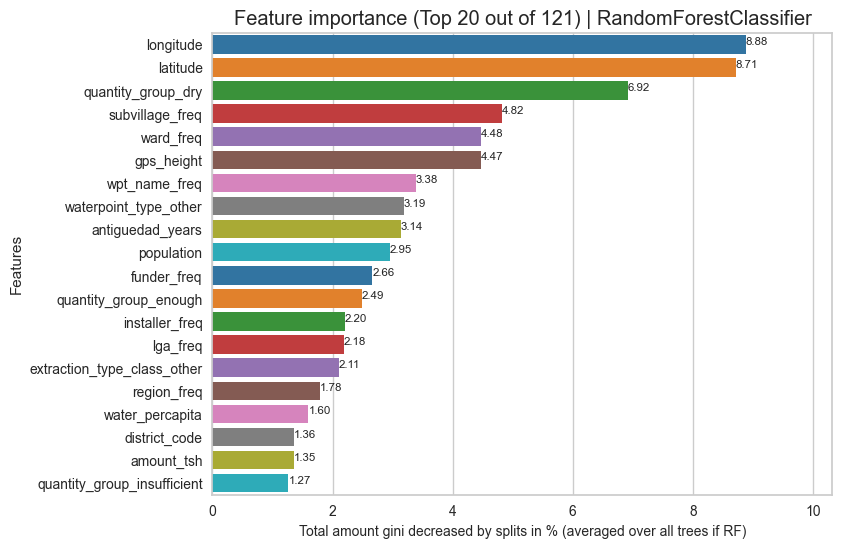

In [363]:
my.feature_importance_plot(
    tree_predictor=best_model,
    n_rows=20
)

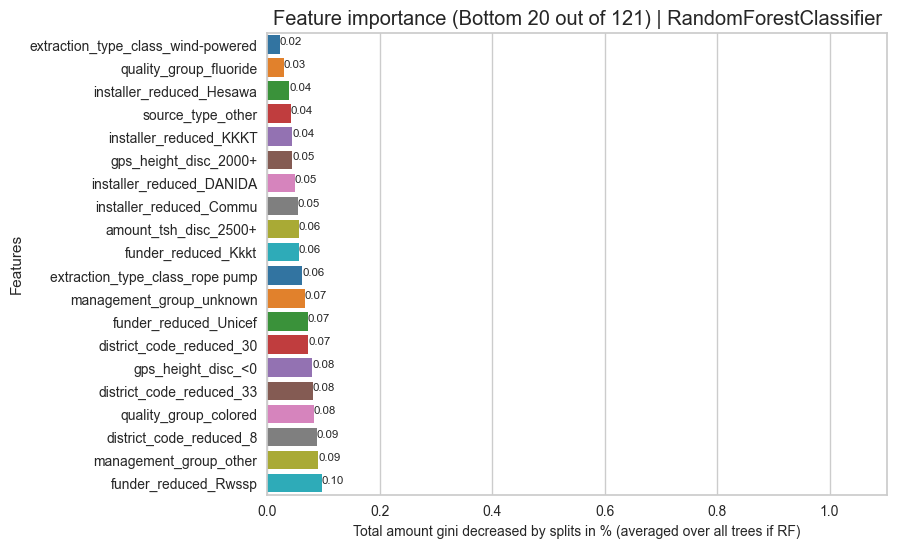

In [365]:
my.feature_importance_plot(
    tree_predictor=best_model,
    n_rows=20,
    bottom=True
)

Observaciones:
- Se ha utilizado **pycaret para una visión inicial general** de qué modelos son los que mejor predicen las etiquetas de nuestra y dado el conjunto de datos y preprocesado. No es de extrañar que los mejores modelos son los de ensemble basado en árboles. Además, **el preprocesado se realizó para acomodar modelos basados en árboles** y no tanto para modelos lineales: no se trató los valores atípicos de algunas predictoras numéricas, no se crearon variables de interacción ni se ha realizado una preselección de variables.
- Los mejores modelos son: **RandomForest, Extra Trees Classifier, seguido de LightGBM**. Vamos a trabajar con rf y lightgbm solamente (desconocimiento personal de Extra Trees Classifier).
- El gráfico de la importancia de predictoras muestra que las más importantes son, sorprendentemente, las variables de coordenadas geográficas: `latitude` y `longitude`, seguido de `quantity_group`.
- Al parecer fue un **acierto aplicar frequency categorical encoding** para categóricas de alta cardinalidad.
- Las predictoras menos importantes son `installer`, `disctric_code`. Además, **las versiones discretizadas de las numéricas no aportan mucho valor predictivo**. No es de extrañar puesto que éstas fueron creadas utilizando tramos manuales, en cambio, random forest elige las mejores tramificaciones de las numéricas frente a la y por la métrica especificada. Al parecer, **los valores sospechosos de missing no declarados (0s) no aportan mucho poder predictivo como categoría independiente**.

## Separación de y e X

In [3]:
y = X_prep['status_group']
X = X_prep.drop(columns='status_group')

X.shape, y.shape

((59400, 121), (59400,))

## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47520, 121), (11880, 121), (47520,), (11880,))

In [5]:
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

0    0.543077
1    0.384238
2    0.072685
Name: status_group, dtype: float64

0    0.543098
1    0.384259
2    0.072643
Name: status_group, dtype: float64


## Entrenamiento

In [19]:
from sklearn.model_selection import RandomizedSearchCV

### Hiperparametrización

#### Random Forest

In [56]:
# NOTE: Alto costo computacional!!!

rfc = RandomForestClassifier(
    n_estimators=300,
    random_state=0,
    n_jobs=-1
)

param_grid_rfc = {
    'max_features': [0.2, 0.3, 'sqrt', 'log2'],
    'max_depth': [None, 50, 80, 100],
    'min_samples_split': list(np.arange(2, 20)),
}

rd_search_rfc = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_grid_rfc,
    n_iter=50,  # sample 50 combinations!
    scoring='accuracy',
    n_jobs=-1,
    refit=True,
    cv=5,
    verbose=2,
)

# Después de 30 minutos...
rd_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                                    random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 50, 80, 100],
                                        'max_features': [0.2, 0.3, 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19]},
                   scoring='accuracy', verbose=2)

In [57]:
df_rd_search_rfc = pd.DataFrame(data=rd_search_rfc.cv_results_)[['param_max_features', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score', 'rank_test_score']]
df_rd_search_rfc = df_rd_search_rfc.sort_values('rank_test_score')
df_rd_search_rfc

param_max_features param_max_depth param_min_samples_split  \
15                0.2              80                       7   
44                0.3              80                      10   
22                0.3            None                       9   
0                sqrt              80                       7   
34                0.3            None                      13   
47                0.2            None                      12   
33                0.2              50                      12   
6                 0.2            None                       4   
19               log2            None                       5   
11               sqrt             100                       3   
26               sqrt             100                       9   
31                0.3             100                      14   
16                0.3              50                      14   
23                0.3            None                      14   
29                0.3             100                      15   
32                0.2              50                      14   
28                0.2            None                      13   
25               log2              50                       6   
5                 0.2            None                       3   
45                0.2             100                       3   
1                 0.2              80                       3   
35               log2             100                       6   
8                log2            None                       6   
27               sqrt            None                      11   
24               sqrt              80                      11   
40               log2              50                       8   
4                sqrt            None                      12   
13                0.3             100                      16   
18               log2             100                       9   
21                0.3              80                      18   
49               log2            None                      10   
37                0.3              50                       3   
30                0.3            None                       3   
10               log2            None                       3   
20                0.2             100                      17   
14                0.3              50                      19   
12               log2              50                      12   
42               sqrt              80                      13   
36                0.2              80                      18   
48                0.2             100                      19   
41                0.2            None                      19   
38               log2              50                       2   
9                sqrt              80                      15   
2                sqrt             100                      17   
7                sqrt            None                      17   
3                log2              80                      13   
17               log2             100                      13   
46               log2              50                      13   
39               log2              80                      15   
43               log2             100                      18   

    mean_test_score  std_test_score  rank_test_score  
15         0.807113        0.001463                1  
44         0.807092        0.001927                2  
22         0.806755        0.001459                3  
0          0.806713        0.001225                4  
34         0.806671        0.002281                5  
47         0.806650        0.002636                6  
33         0.806650        0.002636                6  
6          0.806587        0.001364                8  
19         0.806566        0.001668                9  
11         0.806460        0.001511               10  
26         0.806418        0.002013               11  
31         0.806187        

In [ ]:
# Mejores parámetros en la primera iteración usando random search (50 combinaciones):
# rd_search_rfc.best_estimator_.get_params()

In [ ]:
# Guardamos los parámetros del mejor rf en la primera iteración
#ya que se perderá al correr RandomSearch otra vez:
rd_search_rfc_params1 = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 0.2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 28,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Mejores parámetros en la segunda iteración usando random search (50 combinaciones):
# rfc_randsearch = rd_search_rfc.best_estimator_
# rfc_randsearch.get_params()

In [ ]:
rd_search_rfc_params2 = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 0.2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Observaciones:
- Se ha elegido **accuracy como métrica objetivo** porque es la métrica a evaluar en la competición y también por la naturaleza multiclase de la target (AUC simple no es posible).
- Se han realizado **dos iteraciones de búsquedas de mejores parámetros del modelo Random Forest para nuestro conjunto de datos de entrenamiento (todas las variables 122) mediante Random Search**. El param_grid_rfc refleja la última configuración de parámetros (actualizado con información de los resultados de la primera iteración, del cual se extrajeron 50 combinaciones (**computacionalmente intenso 30 minutos...**).
- El modelo RF con el mejor conjunto de parámetros encontrado (ver df_rd_search_rfc) da un resultado en **accuracy promedio de 0.807113**. 

# **Selección de Variables**

## Mutual information

In [6]:
from sklearn.feature_selection import mutual_info_classif

#Calculamos
mutual_selector = mutual_info_classif(X_train,y_train)

In [7]:
df_mutual = pd.DataFrame({
    'variable': X_train.columns,
    'MI_score': mutual_selector
})

df_mutual = df_mutual.sort_values('MI_score', ascending=False).reset_index(drop=True)
df_mutual

variable  MI_score
0          quantity_group_dry  0.095953
1                    lga_freq  0.089531
2                   longitude  0.067836
3                    latitude  0.066029
4              installer_freq  0.062427
..                        ...       ...
116  installer_reduced_DANIDA  0.000000
117             basin_Pangani  0.000000
118       basin_Lake Victoria  0.000000
119  district_code_reduced_30  0.000000
120       quality_group_milky  0.000000

[121 rows x 2 columns]

In [8]:
df_mutual['MI_ranking'] = df_mutual['MI_score'].rank(ascending=False)
df_mutual

variable  MI_score  MI_ranking
0          quantity_group_dry  0.095953         1.0
1                    lga_freq  0.089531         2.0
2                   longitude  0.067836         3.0
3                    latitude  0.066029         4.0
4              installer_freq  0.062427         5.0
..                        ...       ...         ...
116  installer_reduced_DANIDA  0.000000       110.5
117             basin_Pangani  0.000000       110.5
118       basin_Lake Victoria  0.000000       110.5
119  district_code_reduced_30  0.000000       110.5
120       quality_group_milky  0.000000       110.5

[121 rows x 3 columns]

## Permutation importance

In [9]:
from sklearn.inspection import permutation_importance
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(
    objective='multiclass',
    n_jobs=-1,
    verbose=-1
)

# No classes found. Need to call fit beforehand.
# Es necesario meter el modelo entrenado para que indentifique las clases de la y!
lgbmc.fit(X_train, y_train)

permutation_selector = permutation_importance(
    estimator=lgbmc,
    X=X_train,
    y=y_train,
    scoring='accuracy',
    n_repeats=5,
    n_jobs=-1,
)

In [10]:
df_permutation = pd.DataFrame({
    'variable': X_train.columns,
    'PI_score': permutation_selector.importances_mean
})
df_permutation = df_permutation.sort_values('PI_score', ascending=False).reset_index(drop=True)

df_permutation['PI_ranking'] = df_permutation['PI_score'].rank(ascending=False)
df_permutation

variable  PI_score  PI_ranking
0             quantity_group_dry  0.094116         1.0
1                      longitude  0.021578         2.0
2    extraction_type_class_other  0.018468         3.0
3                       latitude  0.018384         4.0
4               antiguedad_years  0.017104         5.0
..                           ...       ...         ...
116        basin_Lake Tanganyika -0.000004       117.0
117            basin_Wami / Ruvu -0.000008       118.0
118            gps_height_disc_0 -0.000063       119.0
119        installer_reduced_RWE -0.000088       120.5
120  management_group_parastatal -0.000088       120.5

[121 rows x 3 columns]

In [11]:
df_select = pd.merge(
    left=df_mutual,
    right=df_permutation,
    how='inner',
    on='variable',
)

df_select['avg_ranking'] = (df_select['MI_ranking'] + df_select['PI_ranking']) / 2
df_select = df_select.sort_values('avg_ranking')
df_select

variable  MI_score  MI_ranking  PI_score  PI_ranking  \
0             quantity_group_dry  0.095953         1.0  0.094116         1.0   
2                      longitude  0.067836         3.0  0.021578         2.0   
3                       latitude  0.066029         4.0  0.018384         4.0   
1                       lga_freq  0.089531         2.0  0.014983         7.0   
6    extraction_type_class_other  0.050923         7.0  0.018468         3.0   
..                           ...       ...         ...       ...         ...   
99        installer_reduced_KKKT  0.000000       110.5  0.000000       108.5   
101     management_group_unknown  0.000000       110.5  0.000000       108.5   
114            basin_Wami / Ruvu  0.000000       110.5 -0.000008       118.0   
106            gps_height_disc_0  0.000000       110.5 -0.000063       119.0   
103  management_group_parastatal  0.000000       110.5 -0.000088       120.5   

     avg_ranking  
0           1.00  
2           2.50  
3           4.00  
1           4.50  
6           5.00  
..           ...  
99        109.50  
101       109.50  
114       114.25  
106       114.75  
103       115.50  

[121 rows x 6 columns]

## Selección de varias subsets de variables

In [12]:
# Creamos listas de mejores predictoras: mejores 20, 30, 40, etc.:
first_20_feat = list(df_select['variable'].iloc[:20])
first_30_feat = list(df_select['variable'].iloc[:30])
first_40_feat = list(df_select['variable'].iloc[:40])
first_50_feat = list(df_select['variable'].iloc[:50])
first_60_feat = list(df_select['variable'].iloc[:60])
first_70_feat = list(df_select['variable'].iloc[:70])
first_80_feat = list(df_select['variable'].iloc[:80])

In [80]:
best_feat_list = [
    first_20_feat, first_30_feat, first_40_feat,
    first_50_feat, first_60_feat, first_70_feat,
    first_80_feat, X_train.columns.tolist()
]

for feat_list in best_feat_list:
    print(X_train[feat_list].shape)

(47520, 20)
(47520, 30)
(47520, 40)
(47520, 50)
(47520, 60)
(47520, 70)
(47520, 80)
(47520, 121)


In [78]:
from sklearn.model_selection import cross_val_score

# Con el modelo rf parametrizado: rfc_randsearch.
for feat_list in best_feat_list:
    rfc_scores = cross_val_score(
        estimator=rfc_randsearch,
        X=X_train[feat_list],
        y=y_train,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
    )
    
    print(f"Random Forest Classifer (best params) cv mean score ({len(feat_list)}): {np.mean(rfc_scores):.4f} ({np.std(rfc_scores):.4f})")
    rfc_randsearch.fit(X_train[feat_list], y_train)
    print(f"Random Forest Classifer (best params) test score: {rfc_randsearch.score(X_test[feat_list], y_test):.4f}\n")

Random Forest Classifer (best params) cv mean score (20): 0.8016 (0.0032)
Random Forest Classifer (best params) test score: 0.8106

Random Forest Classifer (best params) cv mean score (30): 0.8041 (0.0009)
Random Forest Classifer (best params) test score: 0.8145

Random Forest Classifer (best params) cv mean score (40): 0.8057 (0.0017)
Random Forest Classifer (best params) test score: 0.8140

Random Forest Classifer (best params) cv mean score (50): 0.8064 (0.0013)
Random Forest Classifer (best params) test score: 0.8158

Random Forest Classifer (best params) cv mean score (60): 0.8063 (0.0018)
Random Forest Classifer (best params) test score: 0.8161

Random Forest Classifer (best params) cv mean score (70): 0.8073 (0.0012)
Random Forest Classifer (best params) test score: 0.8178

Random Forest Classifer (best params) cv mean score (80): 0.8066 (0.0020)
Random Forest Classifer (best params) test score: 0.8170

Random Forest Classifer (best params) cv mean score (121): 0.8071 (0.0015)
R

In [79]:
vars_final = X_train_best70.columns
vars_final

Index(['quantity_group_dry', 'longitude', 'latitude', 'lga_freq',
       'extraction_type_class_other', 'waterpoint_type_other',
       'installer_freq', 'ward_freq', 'funder_freq', 'antiguedad_years',
       'quantity_group_enough', 'region_freq', 'amount_tsh', 'population',
       'gps_height', 'payment_type_never pay', 'district_code',
       'extraction_type_class_gravity', 'water_percapita',
       'waterpoint_type_communal standpipe multiple', 'wpt_name_freq',
       'quality_group_unknown', 'payment_type_monthly',
       'waterpoint_type_communal standpipe', 'source_type_spring',
       'installer_reduced_Government', 'permit',
       'extraction_type_class_handpump', 'source_type_borehole',
       'basin_Lake Nyasa', 'public_meeting', 'waterpoint_type_hand pump',
       'payment_type_per bucket', 'subvillage_freq',
       'antiguedad_years_disc_20-29', 'user_group_management',
       'quantity_group_unknown', 'source_type_river/lake',
       'basin_Ruvuma / Southern Coast', 'so

Observaciones:
- El algoritmo Random Forest selecciona aleatoriamente un subconjunto de variables en cada nodo de decisión, lo que le permite explorar más profundamente el espacio de características y generar árboles diversos. **Aunque los árboles internamente eligen las mejores variables en cada nodo de decisión, es posible que muchas variables poco predictivas añadan ruido al modelo**.
- Se ha realizado una preselección de variables combinando dos métodos: **Mutual Information y Permutation Importance**. Ambas capturar efectos no lineales también entre las predictoras y la variable objetivo y generan métricas para cada variable, así podemos elegir manualmente quñe variable incluir en las configuraciones finales. Se ha elegido lightbgm como estimador en Permutation Importance por su rápido velocidad de entrenamiento frente a otros algoritmos de ensemble.
- La elección final de variables se ha realizado en base al **promedio de los rankings de los dos métodos**.
- Finalmente, **por medio de validación cruzada se han probado distintas configuraciones en cuanto a número de las predictoras más importantes**. Se observa que a medida se va añadiendo más predictoras en orden de relevancia basado en el raking promedio, el accuracy de los modelos van mejorando con rendimientos decrecientes.
- **Me quedo con las 70 más predictivas** basándome en el mejor accuracy en random forest tanto en validation como test sets.

# **Funciones de Preprocesado**

## Definir Función de Limpieza

In [2]:
# Todos los cambios antes de la imputación de nulos!
def cleaning_bef_imp(X):
    # Evitar sobreescribir en los df originales!
    df = X.copy()

    # Eliminar recorded_by
    df.drop(columns=['recorded_by'], inplace=True)
    
    # Pasar missings no declarados a nan latitude y longitude.
    df.loc[df['longitude'] == 0, ['latitude', 'longitude']] = np.nan

    # Versiones reducidas de categóricas con alta cardinalidad.
    # Elegimos el umbral de esta manera para evitar inconsistencia
    #en los conjuntos de X_train and X_test:
    freq_thresh_unicef = df.funder.value_counts(normalize=True).loc['Unicef']
    df['funder_reduced'] = group_infreq_labels(
        cat_series=df['funder'],
        threshold=freq_thresh_unicef
    )
    freq_thresh_hesawa = df.installer.value_counts(normalize=True).loc['Hesawa']
    df['installer_reduced'] = group_infreq_labels(
        cat_series=df['installer'],
        threshold=freq_thresh_hesawa
    )
    freq_thresh_33 = df.district_code.value_counts(normalize=True).loc[33]
    df['district_code_reduced'] = group_infreq_labels(
        cat_series=df['district_code'],
        threshold=freq_thresh_33
    )

    # Agrupar categorías:
    df['waterpoint_type'].replace(to_replace=['dam', 'cattle trough'], value='other', inplace=True)
    
    # Pasamos None a nulos en scheme_management.
    df['scheme_management'].replace('None', np.nan, inplace=True)

    return df

# Aquí definimos las funciones secundarias utilizadas en la principal:
def group_infreq_labels(
    cat_series: pd.Series,
    threshold=0.05,
    label='Rare',
):
    # Create a copy.
    cat_series = cat_series.copy()

    # Get frequencies for each label.
    cat_freq = cat_series.value_counts(normalize=True)
    
    # Get a list of infrequent labels in cat variable.
    infreq_labels = [cat_freq.index[i] for i, freq in enumerate(cat_freq) if freq < threshold]
    
    # Group infrequent labels.
    cat_series =  pd.Series(np.where(cat_series.isin(infreq_labels), label, cat_series), name=cat_series.name)
    
    return cat_series

## Definir Función de Imputación de nulos

In [3]:
# Los valores de imputación del conjunto de entrenamiento
#es utilizado en X_test para evitar data leakage!
def impute_missings(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()

    # Eliminar scheme_name:
    X_train.drop(columns='scheme_name', inplace=True)
    X_test.drop(columns='scheme_name', inplace=True)

    # Imputar latitude and longitude:
    latitude_by_region_train = X_train.groupby('region')['latitude'].mean()
    X_train.loc[X_train.latitude.isnull(), 'latitude'] = X_train.loc[X_train.latitude.isnull()].apply(lambda row: latitude_by_region_train[row['region']], axis=1)
    X_test.loc[X_test.latitude.isnull(), 'latitude'] = X_test.loc[X_test.latitude.isnull()].apply(lambda row: latitude_by_region_train[row['region']], axis=1)

    longitude_by_region_train = X_train.groupby('region')['longitude'].mean()
    X_train.loc[X_train.longitude.isnull(), 'longitude'] = X_train.loc[X_train.longitude.isnull()].apply(lambda row: longitude_by_region_train[row['region']], axis=1)
    X_test.loc[X_test.longitude.isnull(), 'longitude'] = X_test.loc[X_test.longitude.isnull()].apply(lambda row: longitude_by_region_train[row['region']], axis=1)

    # Imputar subvillage:
    X_train['subvillage'].fillna('Desconocido', inplace=True)
    X_test['subvillage'].fillna('Desconocido', inplace=True)

    # Imputar versiones reducidas:
    X_train['installer_reduced'].fillna('DWE', inplace=True)
    X_test['installer_reduced'].fillna('DWE', inplace=True)

    X_train['funder_reduced'].fillna('Government Of Tanzania', inplace=True)
    X_test['funder_reduced'].fillna('Government Of Tanzania', inplace=True)

    # Imputar por moda:
    vars_moda = ['scheme_management', 'installer', 'funder', 'public_meeting', 'permit']
    for cat in vars_moda:
        X_train[cat].fillna(X_train[cat].mode()[0], inplace=True)
        X_test[cat].fillna(X_train[cat].mode()[0], inplace=True)

    # Frequency categorical encoding:
    cats_to_freq = ['funder', 'installer', 'subvillage', 'region', 'ward', 'lga', 'wpt_name']
    for cat in cats_to_freq:
        dict_freqs_train = X_train[cat].value_counts(normalize=True).to_dict()
        X_train[f"{cat}_freq"] = X_train[cat].map(dict_freqs_train)
        X_test[f"{cat}_freq"] = X_test[cat].map(dict_freqs_train)

    return (X_train, X_test)

## Definir Función de Feature Engineering

In [5]:
def get_derived_features(X):
    # copia:
    df = X.copy()
    
    # year_recorded:
    df['year_recorded'] = df['date_recorded'].apply(lambda row: row.split('-')[0]).astype('int')
    df.loc[df.construction_year == 0, ['year_recorded']] = 9999
    
    # antiguedad_years:
    df['antiguedad_years'] = df['year_recorded'] - df['construction_year']
    
    # antiguedad_years_disc:
    df.loc[df.antiguedad_years < 0, 'antiguedad_years'] = 9999
    condition_list = [
    (df.antiguedad_years == 9999),
    (df.antiguedad_years >= 0) & (df.antiguedad_years <= 9),
    (df.antiguedad_years >= 10) & (df.antiguedad_years <= 19),
    (df.antiguedad_years >= 20) & (df.antiguedad_years <= 29),
    (df.antiguedad_years >= 30) & (df.antiguedad_years <= 40),
    (df.antiguedad_years >= 41) & (df.antiguedad_years <= 53),
    ]
    choice_list = ['Desconocido', '0-9', '10-19', '20-29', '30-40', '41-53']
    df['antiguedad_years_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default='Error')
    df['antiguedad_years_disc'] = pd.Categorical(df['antiguedad_years_disc'], categories=choice_list, ordered=True)

    # gps_height_disc:
    condition_list = [
    (df.gps_height < 0),  
    (df.gps_height == 0), 
    (df.gps_height > 0) & (df.gps_height <= 600),
    (df.gps_height >= 601) & (df.gps_height <= 1600),
    (df.gps_height >= 1601) & (df.gps_height <= 2000),
    (df.gps_height > 2000)
    ]
    choice_list = ['<0', '0', '1-600', '601-1600', '1601-2000', '2000+']
    df['gps_height_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default=-999)
    df['gps_height_disc'] = pd.Categorical(df['gps_height_disc'], categories=choice_list, ordered=True)

    # water_disponible:
    df['water_disponible'] = np.where(df.amount_tsh == 0, 0, 1)

    # amount_tsh_disc:
    condition_list = [
        (df.amount_tsh == 0), 
        (df.amount_tsh > 0) & (df.amount_tsh <= 100),
        (df.amount_tsh >= 101) & (df.amount_tsh <= 500),
        (df.amount_tsh >= 501) & (df.amount_tsh <= 2500),
        (df.amount_tsh > 2500)
    ]
    choice_list = ['0', '1-100', '101-500', '501-2500', '2500+']
    df['amount_tsh_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default='Error')
    df['amount_tsh_disc'] = pd.Categorical(df['amount_tsh_disc'], categories=choice_list, ordered=True)

    # population_disc:
    condition_list = [
        (df.population == 0), 
        (df.population >= 1) & (df.population <= 100),
        (df.population >= 101) & (df.population <= 1000),
        (df.population > 1000)
    ]
    choice_list = ['0', '1-100', '101-1000', '1000+']
    df['population_disc'] = np.select(condlist=condition_list, choicelist=choice_list, default='Error')
    df['population_disc'] = pd.Categorical(df['population_disc'], categories=choice_list, ordered=True)

    # water_percapita:
    df['water_percapita'] = df['amount_tsh'] / df['population'].replace(0, np.nan)
    df['water_percapita'].fillna(0, inplace=True)

    # user_group_management:
    df['user_group_management'] = np.where(df['management_group'] == 'user-group', 1, 0)

    # good_water_quality:
    df['good_water_quality'] = np.where(df['quality_group'] == 'good', 1, 0)

    # ************************ Drop variables ***************************
    # *******************************************************************
    cols_to_delete = [
        'id', 'date_recorded', 'construction_year', 'year_recorded',
        'funder', 'installer', 'subvillage', 'ward', 'lga', 'wpt_name',
        'extraction_type', 'extraction_type_group',
        'management', 'payment', 'quantity', 'region_code', 'region',
        'scheme_management', 'source', 'source_class',
        'water_quality', 'waterpoint_type_group',
    ]
    df.drop(columns=cols_to_delete, inplace=True)

    # *********************** Categorical Encoding ***********************
    # ********************************************************************
    df['permit'] = np.where(df['permit'] == True, 1, 0)
    df['public_meeting'] = np.where(df['public_meeting'] == True, 1, 0)

    #Cambiamos ohe por pd.get_dummies por su sencillez:
    vars_ohe = [
    'installer_reduced', 'basin', 'extraction_type_class', 'management_group',
    'payment_type', 'quality_group', 'amount_tsh_disc', 'quantity_group',
    'gps_height_disc', 'antiguedad_years_disc', 'source_type', 'waterpoint_type', 'district_code_reduced',
    'population_disc', 'funder_reduced'
    ]
    df = pd.get_dummies(df, columns=vars_ohe, drop_first=False)
    
    return df

## Función principal de Preprocesado

In [6]:
from typing import Literal

# Docstring generado por ChatGPT!
def preprocess_data(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    depth: Literal['clean', 'impute', 'all']='all',
    vars_final: list=None,
    vars_to_drop: list=None
):
    """
    Preprocesses the input data for machine learning tasks.

    Args:
        X_train (pd.DataFrame): The training dataset.
        X_test (pd.DataFrame): The testing dataset.
        depth (Literal['clean', 'impute', 'all'], optional): The depth of preprocessing to perform.
            'clean': Perform cleaning only.
            'impute': Perform cleaning and missing value imputation.
            'all': Perform cleaning, imputation, and feature engineering (default).
        vars_final (list, optional): List of final variables to keep.
        vars_to_drop (list, optional): List of variables to drop.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Preprocessed training and testing datasets.
    """
    # Cleaning before imputation:
    X_train_clean = cleaning_bef_imp(X_train)
    X_test_clean = cleaning_bef_imp(X_test)

    if depth == 'clean':
        return (X_train_clean, X_test_clean)
        
    # Missing value imputation:
    X_train_imp, X_test_imp = impute_missings(X_train_clean, X_test_clean)

    if depth == 'impute':
        return (X_train_imp, X_test_imp)

    # Feature Engineering:
    X_train_final = get_derived_features(X_train_imp)
    X_test_final = get_derived_features(X_test_imp)

    if vars_to_drop is not None:
        for var in vars_to_drop:
            if var in X_train_final.columns:
                X_train_final.drop(columns=var, inplace=True)
            if var in X_test_final.columns:
                X_test_final.drop(columns=var, inplace=True) 

    if vars_final is not None:
        X_train_final = X_train_final[vars_final]
        X_test_final  = X_test_final[vars_final]
        
    if depth == 'all':
        return (X_train_final, X_test_final)

# Light GBM (Segundo modelo a probar)

- **Modelo improvisado** después de probar unos cuantos con Random Forest (submitted predictions).
- **Se recomienda ver esta parte después de ver los modelos finales de RF**.

## Train-test split

In [89]:
# En este caso utilizaremos todo el conjunto de entrenamiento como X_train!
df_original = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')

X_train = df_original
y_train = df_train_label['status_group']

y_train.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

# En este caso solo necesitamos el conjunto de entrenamiento preprocesado.
# No obstante, la función requiere un df en X_test. Introducimos X_train otra vez ya
#que no nos importa la salisa del X_test; no la necesitamos en validación cruzada.
X_train_best70, _ = preprocess_data(
    X_train=X_train,
    X_test=X_train,  # la función requiere un df en X_test
    depth='all',
    vars_final=vars_final  # best 70 features!
)

## Hiperparametrización

In [107]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

lgbmc = LGBMClassifier(
    objective='multiclass',
    is_unbalance=True,
    random_state=0,
    n_jobs=-1,
    verbose=-1
)

param_grid_lgbmc = {
    'num_leaves': np.arange(40, 70),             # number of leaves in one tree
    'max_depth': [-1, 30, 80, 100, 200],         # limit the maximum depth of tree
    'learning_rate': np.linspace(0.01, 0.4, 10), # step size shrinkage
    'n_estimators': [300, 350, 400],             # number of boosted trees to fit
    'reg_alpha':np.linspace(0.1, 0.3, 10),       # L1 regularization term
}

rd_search_lgbmc = RandomizedSearchCV(
    estimator=lgbmc,
    param_distributions=param_grid_lgbmc,
    n_iter=50,  # Change this!
    scoring='accuracy',
    n_jobs=-1,
    refit=True,
    cv=5,
    verbose=1,
)

# Después de unos 20 minutos...
rd_search_lgbmc.fit(X_train_best70, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(is_unbalance=True, n_jobs=-1,
                                            objective='multiclass',
                                            random_state=0, verbose=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.05333333, 0.09666667, 0.14      , 0.18333333,
       0.22666667, 0.27      , 0.31333333, 0.35666667, 0.4       ]),
                                        'max_depth': [-1, 30, 80, 100, 200],
                                        'n_estimators': [300, 350, 400],
                                        'num_leaves': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                                        'reg_alpha': array([0.1       , 0.12222222, 0.14444444, 0.16666667, 0.18888889,
       0.21111111, 0.23333333, 0.25555556, 0.27777778, 0.3       ])},
                   scoring='accuracy', verbose=1)

In [108]:
df_rd_search_lgbmc = pd.DataFrame(data=rd_search_lgbmc.cv_results_)[['param_learning_rate', 'param_num_leaves', 'param_max_depth', 'param_n_estimators', 'param_reg_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]
df_rd_search_lgbmc = df_rd_search_lgbmc.sort_values('rank_test_score')
df_rd_search_lgbmc

param_learning_rate param_num_leaves param_max_depth param_n_estimators  \
48                0.14               59              30                300   
21            0.096667               52             200                400   
18            0.183333               51              80                300   
25            0.183333               49              -1                300   
2             0.183333               40             100                400   
22            0.183333               62              80                350   
8             0.226667               49              30                400   
43            0.183333               60              30                300   
3             0.226667               50              80                350   
26            0.226667               54              80                300   
19            0.226667               68              -1                300   
49                0.14               45             100                350   
47            0.183333               42             100                300   
9                 0.27               40              30                300   
4             0.226667               59             100                350   
14                0.27               42              30                400   
7             0.053333               62              80                400   
35            0.226667               42              30                400   
5             0.096667               41             100                350   
23            0.183333               68              80                400   
45                0.27               59              80                350   
39            0.226667               60              80                400   
33            0.226667               69             100                400   
12            0.313333               45              80                300   
27            0.313333               44              80                300   
38                0.27               58             100                400   
20            0.053333               54              30                400   
28            0.313333               54              -1                350   
13            0.313333               48             200                350   
36            0.096667               42             100                350   
0                 0.27               42             200                400   
30            0.053333               49              80                400   
10            0.313333               50             100                300   
1                 0.27               68              -1                400   
15            0.356667               59              -1                400   
6             0.313333               56             100                350   
44                 0.4               54              80                300   
16            0.356667               55              30                400   
32            0.313333               52              -1                350   
46            0.356667               62             100                350   
24            0.356667               53             200                350   
17            0.053333               45             200                300   
11                 0.4               62              80                350   
37                 0.4               56              80                400   
40                0.01               53             200                400   
29                0.01               63             200                300   
34                0.01               45             200                400   
41                0.01               43             100                400   
42                0.01               55             100                300   
31                0.01               41              80                350   

   param_reg_alpha  mean

In [ ]:
# Primera iteración del mismo param_grid_lgbmc probando 50 combs!
# Mejor lightGBM mean score: 0.806566 (0.002930)
# rd_search_lgbmc.best_estimator_.get_params()

In [111]:
# Guardo los parámetros en una variable para no perderlas:
lgbm_best_params1 = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.06642857142857143,
 'max_depth': 80,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 350,
 'n_jobs': -1,
 'num_leaves': 69,
 'objective': 'multiclass',
 'random_state': 0,
 'reg_alpha': 0.6222222222222222,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'is_unbalance': True,
 'verbose': -1}

In [ ]:
# Segunda iteración del mismo param_grid_lgbmc:
# Mejor lightGBM mean score: 0.807222 (0.002067)
# rd_search_lgbmc.best_estimator_.get_params()

In [112]:
lgbm_best_params2 = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.12285714285714286,
 'max_depth': 100,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 350,
 'n_jobs': -1,
 'num_leaves': 46,
 'objective': 'multiclass',
 'random_state': 0,
 'reg_alpha': 0.17777777777777778,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'is_unbalance': True,
 'verbose': -1}

In [ ]:
# Tercera iteración del mismo param_grid_lgbmc:
# Mejor lightGBM mean score: 0.807761 (0.001539)
# rd_search_lgbmc.best_estimator_.get_params()

In [113]:
lgbm_best_params3 = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.14,
 'max_depth': 30,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'num_leaves': 59,
 'objective': 'multiclass',
 'random_state': 0,
 'reg_alpha': 0.2111111111111111,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'is_unbalance': True,
 'verbose': -1}

# **Modelos Finales**

## Tunned RF

In [17]:
from sklearn.ensemble import RandomForestClassifier

best_params = {
    'bootstrap': True,
     'ccp_alpha': 0.0,
     'class_weight': None,
     'criterion': 'gini',
     'max_depth': 80,
     'max_features': 0.2,
     'max_leaf_nodes': None,
     'max_samples': None,
     'min_impurity_decrease': 0.0,
     'min_samples_leaf': 1,
     'min_samples_split': 7,
     'min_weight_fraction_leaf': 0.0,
     'monotonic_cst': None,
     'n_estimators': 300,
     'n_jobs': -1,
     'oob_score': False,
     'random_state': 0,
     'verbose': 0,
     'warm_start': False
}

rfc_randsearch = RandomForestClassifier(**best_params)

### Prueba

In [18]:
# Los 70 mejores predictoras:
vars_final = ['quantity_group_dry', 'longitude', 'latitude', 'lga_freq',
       'extraction_type_class_other', 'waterpoint_type_other',
       'installer_freq', 'ward_freq', 'funder_freq', 'antiguedad_years',
       'quantity_group_enough', 'region_freq', 'amount_tsh', 'population',
       'gps_height', 'payment_type_never pay', 'district_code',
       'extraction_type_class_gravity', 'water_percapita',
       'waterpoint_type_communal standpipe multiple', 'wpt_name_freq',
       'quality_group_unknown', 'payment_type_monthly',
       'waterpoint_type_communal standpipe', 'source_type_spring',
       'installer_reduced_Government', 'permit',
       'extraction_type_class_handpump', 'source_type_borehole',
       'basin_Lake Nyasa', 'public_meeting', 'waterpoint_type_hand pump',
       'payment_type_per bucket', 'subvillage_freq',
       'antiguedad_years_disc_20-29', 'user_group_management',
       'quantity_group_unknown', 'source_type_river/lake',
       'basin_Ruvuma / Southern Coast', 'source_type_dam',
       'district_code_reduced_5', 'installer_reduced_Rare',
       'amount_tsh_disc_101-500', 'gps_height_disc_601-1600',
       'good_water_quality', 'district_code_reduced_2',
       'amount_tsh_disc_1-100', 'gps_height_disc_1-600',
       'payment_type_unknown', 'quantity_group_insufficient',
       'district_code_reduced_1', 'antiguedad_years_disc_30-40',
       'antiguedad_years_disc_41-53', 'antiguedad_years_disc_0-9',
       'management_group_commercial', 'extraction_type_class_submersible',
       'payment_type_annually', 'installer_reduced_Commu', 'amount_tsh_disc_0',
       'water_disponible', 'funder_reduced_World Vision',
       'waterpoint_type_improved spring', 'district_code_reduced_4',
       'source_type_rainwater harvesting', 'source_type_shallow well',
       'gps_height_disc_1601-2000', 'quality_group_good', 'basin_Rufiji',
       'district_code_reduced_3', 'antiguedad_years_disc_10-19']

len(vars_final)

70

In [19]:
from sklearn.model_selection import train_test_split

df_original = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')

X = df_original
y = df_train_label['status_group']

y.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print('y_train:')
print(y_train.value_counts(normalize=True, dropna=False))
print('y_test:')
print(y_test.value_counts(normalize=True, dropna=False))
print()
print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape, y_test.shape)
print()

X_train_best70, X_test_best70 = preprocess_data(
    X_train=X_train,
    X_test=X_test,
    depth='all',
    vars_final=vars_final  # best 70 features!
)

print('X_train_prep:', X_train_best70.shape, y_train.shape)
print('X_test_prep:', X_test_best70.shape, y_test.shape)
print()

rfc_randsearch.fit(X_train_best70, y_train)
rfc_randsearch.score(X_test_best70, y_test)

y_train:
0    0.543077
1    0.384238
2    0.072685
Name: status_group, dtype: float64
y_test:
0    0.543098
1    0.384259
2    0.072643
Name: status_group, dtype: float64

X_train: (47520, 40) (47520,)
X_test: (11880, 40) (11880,)

X_train_prep: (47520, 70) (47520,)
X_test_prep: (11880, 70) (11880,)



0.8172558922558922

In [26]:
from sklearn.metrics import classification_report

class_report = classification_report(
    y_true=y_test,
    y_pred=rfc_randsearch.predict(X_test_best70),
    target_names=['functional', 'non functional', 'functional needs repair'],
    digits=3,
)

print(class_report)

                         precision    recall  f1-score   support

             functional      0.800     0.916     0.854      6452
         non functional      0.864     0.771     0.815      4565
functional needs repair      0.663     0.323     0.435       863

               accuracy                          0.817     11880
              macro avg      0.776     0.670     0.701     11880
           weighted avg      0.815     0.817     0.809     11880



In [43]:
# Generar predicciones con set de validación real!
df_test_set = pd.read_csv('./Data/Original/test_set.csv')

# Preprocess and get df_test_set only:
_, X_test_true = preprocess_data(
    X_train=X_train,
    X_test=df_test_set,
    depth='all',
    vars_final=vars_final  # best 70 features!
)

# Guardar id:
test_set_id = df_test_set.id

# Predicciones:
pred_ser = pd.Series(rfc_randsearch.predict(X_test_true), name='status_group')
# Cambiar pred numéricas a etiquetas de vuelta!
pred_ser.replace(
    to_replace=[0, 1, 2],
    value=['functional', 'non functional', 'functional needs repair'],
    inplace=True
)

# Crear df:
df_pred = pd.concat([test_set_id, pred_ser], axis=1)

# Guardar pred a csv:
df_pred.to_csv('submission_rf_best70_subset.csv', index=False)

print('Predictions:')
print(pred_ser.value_counts(normalize=True))

df_pred

Predictions:
functional                 0.621279
non functional             0.346801
functional needs repair    0.031919
Name: status_group, dtype: float64


id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

Observaciones:
- El **accuracy score del Random Forest hiperparametrizado con los mejores 70 predictoras = 0.8172 (función de preprocesado) < 0.8178 (manual)**. Empecé analizando y modificando los datos y más tarde hice la partición del train-test seet. Sin embargo, debería haber realizado la partición desde el inicio para evitar filtración de información del conjunto de validación (del conjunto de entranamiento) al X_train. Error mío.
- Los resultados difieren aunque se traten del mismo modelo con las mismas variables (random_state=0) por la siguiente razón:
    - La función `preprocess_data` trata X_train e X_test como objetos independientes, **aplicándoles el preprocesado a cada DataFrame, previniendo filtración de datos del X_test en el X_train** como imputar nulos con los estadísticos del conjunto de entrenamiento en ambos X_train y X_test, entre otros. Eso ha dado como resultado un **accuracy de 0.8172**.
    - En cambio, **los conjuntos de datos X_train y X_test del modelo con 0.818 (inicial) han pasado por el mismo proceso de limpieza e imputación de nulos con filtración de datos**! Esto resultó en un **accuracy de 0.8178**, el cual es mayor que el del modelo con los conjuntos correctamente tratados. Esa mejora esta **sujeto a sesgos de generalización y sobreestimación del modelo**!
- Observando las métricas de clasificación, **se contempla el desbalanceo que existe en la variable target: relativamente pocas bombas funcionales que requieran reparación frente a las otras dos etiquetas**. De allí, que el modelo falle mucho más en clasificar dicha categoría con un recall que deja mucho que desear: 0.32. Aún así, no voy a balancear los datos ya que la competición se basa en la métrica de accuracy y si el X_test fuera representativo, entonces la ganancia en clasificar correctamente las bombas que necesiten reparación sería muy baja...
- Además, aproveché para predecir el conjunto de validación real para **crear una submission con el subset del conjunto de entrenamiento de 47520 registros** y no del total: 59400. **Solamente por curiosidad** para ver el puntaje en comparación con las predicciones del mismo modelo entrenado con el conjunto total de 59400 observaciones:
    - submission score: `0.8164` < 0.8172
    - Resultados similares! Señal de **modelo estable**.

## Tunned LightGBMs

In [115]:
# Mean score: 0.806566 (0.002930)
lgbm_best_params1 = {
    'boosting_type': 'gbdt',
     'class_weight': None,
     'colsample_bytree': 1.0,
     'importance_type': 'split',
     'learning_rate': 0.06642857142857143,
     'max_depth': 80,
     'min_child_samples': 20,
     'min_child_weight': 0.001,
     'min_split_gain': 0.0,
     'n_estimators': 350,
     'n_jobs': -1,
     'num_leaves': 69,
     'objective': 'multiclass',
     'random_state': 0,
     'reg_alpha': 0.6222222222222222,
     'reg_lambda': 0.0,
     'subsample': 1.0,
     'subsample_for_bin': 200000,
     'subsample_freq': 0,
     'is_unbalance': True,
     'verbose': -1
}

lgbmc_randsearch1 = LGBMClassifier(**lgbm_best_params1)

In [116]:
# Mean score: 0.807222 (0.002067)
lgbm_best_params2 = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.12285714285714286,
    'max_depth': 100,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 350,
    'n_jobs': -1,
    'num_leaves': 46,
    'objective': 'multiclass',
    'random_state': 0,
    'reg_alpha': 0.17777777777777778,
    'reg_lambda': 0.0,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0,
    'is_unbalance': True,
    'verbose': -1
}

lgbmc_randsearch2 = LGBMClassifier(**lgbm_best_params2)

In [117]:
# Mean score: 0.807761 (0.001539)
lgbm_best_params3 = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.14,
    'max_depth': 30,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 300,
    'n_jobs': -1,
    'num_leaves': 59,
    'objective': 'multiclass',
    'random_state': 0,
    'reg_alpha': 0.2111111111111111,
    'reg_lambda': 0.0,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0,
    'is_unbalance': True,
    'verbose': -1
}

lgbmc_randsearch3 = LGBMClassifier(**lgbm_best_params3)

# **Submissions**

## All Submission Scores

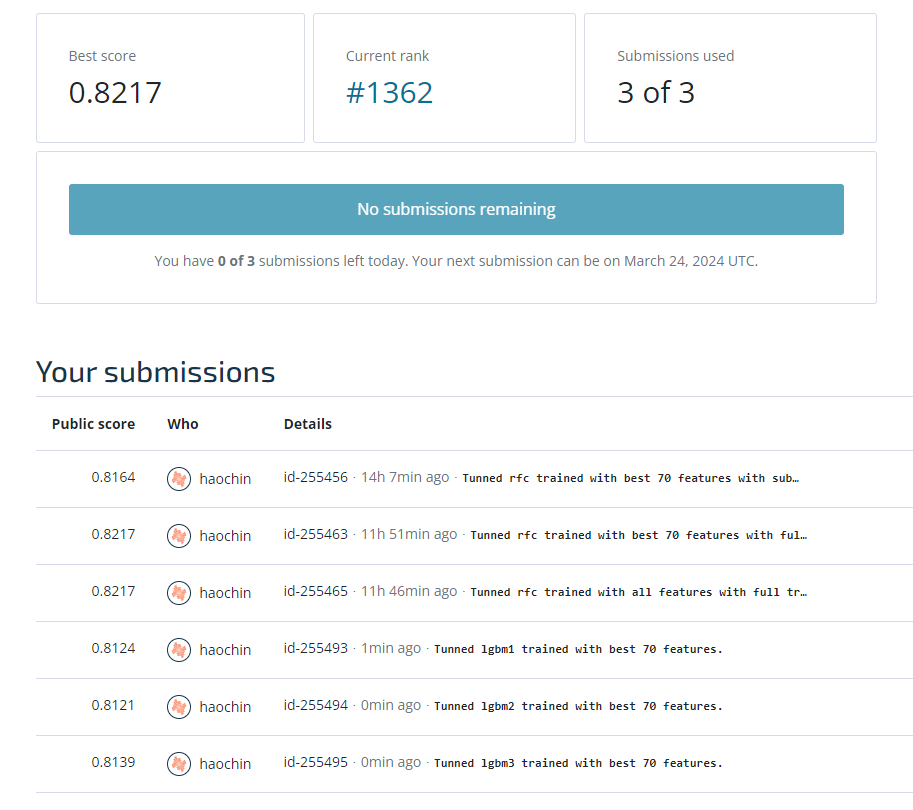

In [8]:
from IPython.display import display

display(Image('./Images/sub_scores.png'))

## Tunned RF (best 70 & all training data)

In [50]:
df_train_set = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')
df_test_set = pd.read_csv('./Data/Original/test_set.csv')

X_train = df_train_set
X_test  = df_test_set
y_train = df_train_label['status_group']

y_train.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape)
print()

X_train_best70, X_test_best70 = preprocess_data(
    X_train=X_train,
    X_test=X_test,
    depth='all',
    vars_final=vars_final  # best 70 features!
)

print('X_train_prep:', X_train_best70.shape)
print('X_test_prep:', X_test_best70.shape)
print()

# Entrenamiento:
rfc_randsearch.fit(X_train_best70, y_train)

# Guardar id:
test_set_id = df_test_set.id

# Predicciones:
pred_ser = pd.Series(rfc_randsearch.predict(X_test_best70), name='status_group')
# Cambiar pred numéricas a etiquetas de vuelta!
pred_ser.replace(
    to_replace=[0, 1, 2],
    value=['functional', 'non functional', 'functional needs repair'],
    inplace=True
)

# Crear df:
df_pred = pd.concat([test_set_id, pred_ser], axis=1)

# Guardar pred a csv:
df_pred.to_csv('submission_rf_best70_fulldata.csv', index=False)

print('Predictions:')
print(pred_ser.value_counts(normalize=True))

df_pred

X_train: (59400, 40) (59400,)
X_test: (14850, 40)

X_train_prep: (59400, 70)
X_test_prep: (14850, 70)

Predictions:
functional                 0.608552
non functional             0.355488
functional needs repair    0.035960
Name: status_group, dtype: float64


id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

Observaciones:
- El mismo modelo de RF con los 70 mejores predictoras pero **entrenado con todo el conjunto de entrenamiento**!
- Submission score: `0.8217`
- Parece que el modelo tiene margen de mejora alimentadándole más datos!
- En verdad podría haber creado una función que prediga el X_test y guarde las predicciones. Cansado estoy... Perdónenme con el copy-pasting :)

## Tunned RF (all features)

In [68]:
df_train_set = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')
df_test_set = pd.read_csv('./Data/Original/test_set.csv')

X_train = df_train_set
X_test  = df_test_set
y_train = df_train_label['status_group']

y_train.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape)
print()

X_train_prep, X_test_prep = preprocess_data(
    X_train=X_train,
    X_test=X_test,
    depth='all',
    vars_final=None,  # All features!
    vars_to_drop=['installer_reduced_KKKT']  # Solo en X_train!
)

print('X_train_prep:', X_train_prep.shape)
print('X_test_prep:', X_test_prep.shape)
print()

# Entrenamiento:
rfc_randsearch.fit(X_train_prep, y_train)

# Guardar id:
test_set_id = df_test_set.id

# Predicciones:
pred_ser = pd.Series(rfc_randsearch.predict(X_test_prep), name='status_group')
# Cambiar pred numéricas a etiquetas de vuelta!
pred_ser.replace(
    to_replace=[0, 1, 2],
    value=['functional', 'non functional', 'functional needs repair'],
    inplace=True,
)

# Crear df:
df_pred = pd.concat([test_set_id, pred_ser], axis=1)

# Guardar pred a csv:
df_pred.to_csv('submission_rf_all_features_no_installereducedKKT.csv', index=False)

print('Predictions:')
print(pred_ser.value_counts(normalize=True))

df_pred

X_train: (59400, 40) (59400,)
X_test: (14850, 40)

X_train_prep: (59400, 120)
X_test_prep: (14850, 120)

Predictions:
functional                 0.606936
non functional             0.356229
functional needs repair    0.036835
Name: status_group, dtype: float64


id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

Observaciones:
- **ValueError**: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing: `installer_reduced_KKKT`.
- Ninguna observación con valor KKKT en la variable `installer_reduced` en X_test. Debería haber reducido más los valores únicos de la variable original `installer`. Llegados a este punto **prefiero eliminarla directamente** que cambiarlo desde el inicio. Es más, no aporta mucho al modelo tampoco!
- El mismo modelo de RF **con todas las predictoras**.
- Submission score: `0.8217`
- El modelo con los 70 mejores predictoras y el que utiliza todas obtuvieron el mismo score de 0.8217. Esto es indicio de que a partir de los 70 mejores predictoras, el resto no aporta mucho valor predictivo al modelo. **Elegimos los 70 mejores para reducir ruido y overfitting**. A partir de ahora se tomará como referencia las 70 mejores predictoras para probar los modelos en adelante. 

## Tunned LightGBM 1 (best 70)

In [121]:
df_train_set = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')
df_test_set = pd.read_csv('./Data/Original/test_set.csv')

X_train = df_train_set
X_test  = df_test_set
y_train = df_train_label['status_group']

y_train.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape)
print()

X_train_best70, X_test_best70 = preprocess_data(
    X_train=X_train,
    X_test=X_test,
    depth='all',
    vars_final=vars_final  # best 70 features!
)

print('X_train_prep:', X_train_best70.shape)
print('X_test_prep:', X_test_best70.shape)
print()

# Entrenamiento:
lgbmc_randsearch1.fit(X_train_best70, y_train)

# Guardar id:
test_set_id = df_test_set.id

# Predicciones:
pred_ser = pd.Series(lgbmc_randsearch1.predict(X_test_best70), name='status_group')
# Cambiar pred numéricas a etiquetas de vuelta!
pred_ser.replace(
    to_replace=[0, 1, 2],
    value=['functional', 'non functional', 'functional needs repair'],
    inplace=True
)

# Crear df:
df_pred = pd.concat([test_set_id, pred_ser], axis=1)

# Guardar pred a csv:
df_pred.to_csv('submission_lgbm1_best70_fulldata.csv', index=False)

print('Predictions:')
print(pred_ser.value_counts(normalize=True))

df_pred

X_train: (59400, 40) (59400,)
X_test: (14850, 40)

X_train_prep: (59400, 70)
X_test_prep: (14850, 70)

Predictions:
functional                 0.619125
non functional             0.348687
functional needs repair    0.032189
Name: status_group, dtype: float64


id    status_group
0      50785  non functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

Observaciones:
- Submission score: `0.8124`

## Tunned LightGBM 2 (best 70)

In [122]:
df_train_set = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')
df_test_set = pd.read_csv('./Data/Original/test_set.csv')

X_train = df_train_set
X_test  = df_test_set
y_train = df_train_label['status_group']

y_train.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape)
print()

X_train_best70, X_test_best70 = preprocess_data(
    X_train=X_train,
    X_test=X_test,
    depth='all',
    vars_final=vars_final  # best 70 features!
)

print('X_train_prep:', X_train_best70.shape)
print('X_test_prep:', X_test_best70.shape)
print()

# Entrenamiento:
lgbmc_randsearch2.fit(X_train_best70, y_train)

# Guardar id:
test_set_id = df_test_set.id

# Predicciones:
pred_ser = pd.Series(lgbmc_randsearch2.predict(X_test_best70), name='status_group')
# Cambiar pred numéricas a etiquetas de vuelta!
pred_ser.replace(
    to_replace=[0, 1, 2],
    value=['functional', 'non functional', 'functional needs repair'],
    inplace=True
)

# Crear df:
df_pred = pd.concat([test_set_id, pred_ser], axis=1)

# Guardar pred a csv:
df_pred.to_csv('submission_lgbm2_best70_fulldata.csv', index=False)

print('Predictions:')
print(pred_ser.value_counts(normalize=True))

df_pred

X_train: (59400, 40) (59400,)
X_test: (14850, 40)

X_train_prep: (59400, 70)
X_test_prep: (14850, 70)

Predictions:
functional                 0.613064
non functional             0.350774
functional needs repair    0.036162
Name: status_group, dtype: float64


id    status_group
0      50785      functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

Observaciones:
- Submission score: `0.8121`

## Tunned LightGBM 3 (best 70)

In [123]:
df_train_set = pd.read_csv('./Data/Original/training_set.csv')
df_train_label = pd.read_csv('./Data/Original/training_labels.csv')
df_test_set = pd.read_csv('./Data/Original/test_set.csv')

X_train = df_train_set
X_test  = df_test_set
y_train = df_train_label['status_group']

y_train.replace(
    to_replace=['functional', 'non functional', 'functional needs repair'],
    value=[0, 1, 2],
    inplace=True
)

print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape)
print()

X_train_best70, X_test_best70 = preprocess_data(
    X_train=X_train,
    X_test=X_test,
    depth='all',
    vars_final=vars_final  # best 70 features!
)

print('X_train_prep:', X_train_best70.shape)
print('X_test_prep:', X_test_best70.shape)
print()

# Entrenamiento:
lgbmc_randsearch3.fit(X_train_best70, y_train)

# Guardar id:
test_set_id = df_test_set.id

# Predicciones:
pred_ser = pd.Series(lgbmc_randsearch3.predict(X_test_best70), name='status_group')
# Cambiar pred numéricas a etiquetas de vuelta!
pred_ser.replace(
    to_replace=[0, 1, 2],
    value=['functional', 'non functional', 'functional needs repair'],
    inplace=True
)

# Crear df:
df_pred = pd.concat([test_set_id, pred_ser], axis=1)

# Guardar pred a csv:
df_pred.to_csv('submission_lgbm3_best70_fulldata.csv', index=False)

print('Predictions:')
print(pred_ser.value_counts(normalize=True))

df_pred

X_train: (59400, 40) (59400,)
X_test: (14850, 40)

X_train_prep: (59400, 70)
X_test_prep: (14850, 70)

Predictions:
functional                 0.612391
non functional             0.350303
functional needs repair    0.037306
Name: status_group, dtype: float64


id    status_group
0      50785      functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]

Observaciones:
- Submission score: `0.8139`